Import all necessary libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
from sklearn.model_selection import train_test_split
from PIL import Image
import math
import random

Data Exploration

In [106]:
csv_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\annotations.csv'
df = pd.read_csv(csv_path)

print("First 5 rows of the dataset:")
print(df.head())

print("\nColumn data types:")
print(df.dtypes)

print("\nMissing values count:")
print(df.isnull().sum())

First 5 rows of the dataset:
                                           seriesuid      coordX      coordY  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222... -128.699421 -175.319272   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.783651 -211.925149   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...   69.639017 -140.944586   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...  -24.013824  192.102405   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...    2.441547  172.464881   

       coordZ  diameter_mm  
0 -298.387506     5.651471  
1 -227.121250     4.224708  
2  876.374496     5.786348  
3 -391.081276     8.143262  
4 -405.493732    18.545150  

Column data types:
seriesuid       object
coordX         float64
coordY         float64
coordZ         float64
diameter_mm    float64
dtype: object

Missing values count:
seriesuid      0
coordX         0
coordY         0
coordZ         0
diameter_mm    0
dtype: int64


In [ ]:
print("\nSummary statistics:")
print(df.describe())

In [ ]:
print("\nUnique series IDs:")
print(df['seriesuid'].nunique())

df['diameter_mm'].hist(bins=20)

Validate Paths

In [107]:
subset_folders = [
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset0',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset1',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset2',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset3',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset4',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset5',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset6',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset7',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset8',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset9',

]

all_mhd_files = []
for folder in subset_folders:
    all_mhd_files.extend([f for f in os.listdir(folder) if f.endswith('.mhd')])

series_in_csv = df['seriesuid'].tolist()
unmatched_series = [s for s in series_in_csv if f"{s}.mhd" not in all_mhd_files]

if unmatched_series:
    print(f"Unmatched seriesuids: {unmatched_series}")
else:
    print("All seriesuids matched with .mhd files.")


Unmatched seriesuids: ['1.3.6.1.4.1.14519.5.2.1.6279.6001.249450003033735700817635168066', '1.3.6.1.4.1.14519.5.2.1.6279.6001.249450003033735700817635168066', '1.3.6.1.4.1.14519.5.2.1.6279.6001.249450003033735700817635168066', '1.3.6.1.4.1.14519.5.2.1.6279.6001.249450003033735700817635168066', '1.3.6.1.4.1.14519.5.2.1.6279.6001.251215764736737018371915284679', '1.3.6.1.4.1.14519.5.2.1.6279.6001.252814707117018427472206147014', '1.3.6.1.4.1.14519.5.2.1.6279.6001.252814707117018427472206147014', '1.3.6.1.4.1.14519.5.2.1.6279.6001.254473943359963613733707320244', '1.3.6.1.4.1.14519.5.2.1.6279.6001.254473943359963613733707320244', '1.3.6.1.4.1.14519.5.2.1.6279.6001.270951128717816232360812849541', '1.3.6.1.4.1.14519.5.2.1.6279.6001.277452631455527999380186898011', '1.3.6.1.4.1.14519.5.2.1.6279.6001.282779922503707013097174625409', '1.3.6.1.4.1.14519.5.2.1.6279.6001.282779922503707013097174625409', '1.3.6.1.4.1.14519.5.2.1.6279.6001.286217539434358186648717203667', '1.3.6.1.4.1.14519.5.2.1.

Analyze Image Metadata - Example for 1 Image

In [108]:
sample_file = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset0\1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd'
image = sitk.ReadImage(sample_file)

print("Image spacing:", image.GetSpacing())
print("Image origin:", image.GetOrigin())
print("Image size:", image.GetSize())

Image spacing: (0.7617189884185791, 0.7617189884185791, 2.5)
Image origin: (-198.100006, -195.0, -335.209991)
Image size: (512, 512, 121)


Physical to Voxel Coordinate Conversion 

In [260]:
import os
import SimpleITK as sitk
import pandas as pd

# Function to convert physical coordinates to voxel coordinates
def physical_to_voxel(coord, origin, spacing):
    return [int((coord[i] - origin[i]) / spacing[i]) for i in range(3)]

# List of subset folders containing image files
subset_folders = [  
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset0',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset1',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset2',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset3',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset4',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset5',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset6',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset7',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset8',
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset9',
]

# Path to the annotations file
annotations_file = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\annotations.csv'

# Load the annotations
annotations = pd.read_csv(annotations_file)

# Assuming columns for coordinates are named 'coordX', 'coordY', 'coordZ'
coords = annotations[['coordX', 'coordY', 'coordZ', 'diameter_mm']].values

# List to store results for saving into a CSV file
output_data = []

# Iterate through each folder in subset_folders
for folder in subset_folders:
    for image_filename in os.listdir(folder):
        if image_filename.endswith('.mhd'):  # Adjust for your file extension
            image_path = os.path.join(folder, image_filename)
            try:
                # Read the image
                image = sitk.ReadImage(image_path)

                # Extract metadata
                origin = image.GetOrigin()
                spacing = image.GetSpacing()

                # Convert each coordinate in the annotation file to voxel space
                voxel_coords_for_image = []

                for coord in coords:
                    # Convert physical coordinates to voxel space
                    voxel_coord = physical_to_voxel(coord[:3], origin, spacing)  # Only use coordX, coordY, coordZ

                    # Convert diameter from mm to voxel size
                    diameter_voxel = int(coord[3] / spacing[0])  # Assume isotropic spacing for simplicity (using spacing[0])

                    # Append results to the list
                    voxel_coords_for_image.append({
                        'Image': image_filename,
                        'Voxel_X': voxel_coord[0],
                        'Voxel_Y': voxel_coord[1],
                        'Voxel_Z': voxel_coord[2],
                        'Diameter_voxel': diameter_voxel
                    })

                # Append voxel coordinates to the output data
                output_data.extend(voxel_coords_for_image)

            except Exception as e:
                # Print the error and skip the file
                print(f"Skipping {image_filename} due to error: {e}")

# Save results to a CSV file
output_df = pd.DataFrame(output_data)
output_csv_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\annotations_with_voxel_coords.csv'
output_df.to_csv(output_csv_path, index=False)

print(f"Voxel coordinates saved to {output_csv_path}")


Skipping 1.3.6.1.4.1.14519.5.2.1.6279.6001.120842785645314664964010792308.mhd due to error: Exception thrown in SimpleITK ImageFileReader_Execute: D:\a\SimpleITK\SimpleITK\Code\IO\src\sitkImageReaderBase.cxx:99:
sitk::ERROR: Unable to determine ImageIO reader for "C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset6\1.3.6.1.4.1.14519.5.2.1.6279.6001.120842785645314664964010792308.mhd"
Skipping 1.3.6.1.4.1.14519.5.2.1.6279.6001.136830368929967292376608088362.mhd due to error: Exception thrown in SimpleITK ImageFileReader_Execute: D:\a\SimpleITK\SimpleITK\Code\IO\src\sitkImageReaderBase.cxx:99:
sitk::ERROR: Unable to determine ImageIO reader for "C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset6\1.3.6.1.4.1.14519.5.2.1.6279.6001.136830368929967292376608088362.mhd"
Skipping 1.3.6.1.4.1.14519.5.2.1.6279.6001.164790817284381538042494285101.mhd due to error: Exception thrown in SimpleITK ImageFileReader_Execute: D:\a\Si

Check Nodule Diameter Distribution

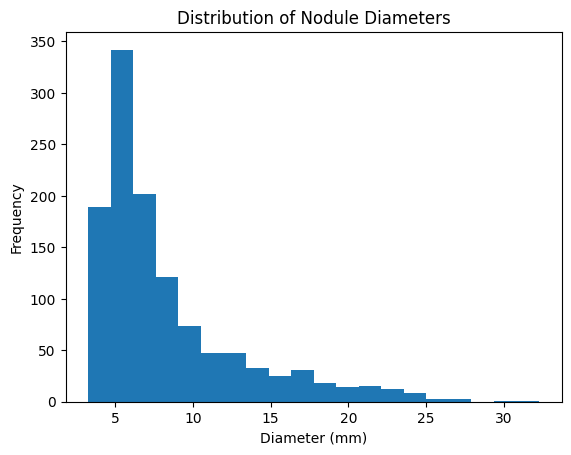

In [110]:
plt.hist(df['diameter_mm'], bins=20)
plt.title("Distribution of Nodule Diameters")
plt.xlabel("Diameter (mm)")
plt.ylabel("Frequency")
plt.show()

Validate Data Split

In [111]:
seriesuids = df['seriesuid'].unique()
train_series, temp_series = train_test_split(seriesuids, train_size=0.7, random_state=42)
val_series, test_series = train_test_split(temp_series, train_size=0.5, random_state=42)

print(f"Training set size: {len(train_series)}")
print(f"Validation set size: {len(val_series)}")
print(f"Testing set size: {len(test_series)}")

Training set size: 420
Validation set size: 90
Testing set size: 91


In [228]:
seriesuids = df['Image'].unique()
train_series, temp_series = train_test_split(seriesuids, train_size=0.7, random_state=42)
val_series, test_series = train_test_split(temp_series, train_size=0.5, random_state=42)

print(f"Training set size: {len(train_series)}")
print(f"Validation set size: {len(val_series)}")
print(f"Testing set size: {len(test_series)}")

Training set size: 555
Validation set size: 119
Testing set size: 120


Convert physical coordinates to voxel coordinates based on image origin and spacing 

In [242]:
def physical_to_voxel(coord, origin, spacing):
    """Convert physical coordinates to voxel coordinates."""
    return [int((coord[i] - origin[i]) / spacing[i]) for i in range(3)]


Load mhd image file and return its numpy array representation 

In [243]:
def load_mhd_image(mhd_file):
    """Load the .mhd image using SimpleITK."""
    try:
        image = sitk.ReadImage(mhd_file)
        image_array = sitk.GetArrayFromImage(image)
        return image_array
    except Exception as e:
        print(f"Error loading image {mhd_file}: {e}")
        return None

Normalize image and save it as .png file

In [244]:
def save_image_as_png(image_array, output_path, slice_index):
    """Save the numpy array as a PNG image, with proper normalization."""
    min_val = np.min(image_array)
    max_val = np.max(image_array)

    # Normalize to 0-255
    normalized_image = ((image_array - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    # Save the specified slice as PNG
    image_pil = Image.fromarray(normalized_image[slice_index])
    image_pil.save(output_path)

Validate coordinates to make sure they are within the bounds of the image dimensions

In [245]:
def validate_coordinates(coords, shape):
    """Validate if the coordinates are within the image bounds."""
    for i, coord in enumerate(coords):
        if coord < 0 or coord >= shape[i]:
            return False
    return True

Create polygon mask

In [246]:
def create_polygon_mask(image_array, x_voxel, y_voxel, z_voxel, diameter_voxel):
    """Create a polygonal mask around the nodule based on a random segmentation of the circle."""
    mask = np.zeros_like(image_array[z_voxel], dtype=np.uint8)

    # Create random number of points to form a polygon
    num_points = random.randint(8, 20)  # Number of points in the polygon
    radius_voxel = diameter_voxel // 2
    polygon_points = []

    for i in range(num_points):
        # Generate points in a circular pattern around the center (x_voxel, y_voxel)
        angle = (2 * math.pi * i) / num_points
        x = int(x_voxel + radius_voxel * math.cos(angle))
        y = int(y_voxel + radius_voxel * math.sin(angle))
        polygon_points.append((x, y))

    # Draw the polygon (simple method using fill)
    for x, y in polygon_points:
        if 0 <= x < mask.shape[0] and 0 <= y < mask.shape[1]:
            mask[x, y] = 255

    return mask, polygon_points

Normalize polyglon points to a range of [0,1]

In [247]:
def normalize_coordinates(polygon_points, image_width, image_height):
    """Normalize the polygon coordinates to be between 0 and 1."""
    normalized_points = []
    for x, y in polygon_points:
        norm_x = x / image_width
        norm_y = y / image_height
        normalized_points.append((norm_x, norm_y))
    return normalized_points

Process annotations and convert to YOLO format, save images and labels

In [257]:

def convert_annotations_to_yolo_format(csv_path, subset_folders, output_folders):
    """
    Converts annotations in a CSV file to YOLO polygon annotation format and saves them as .txt files.

    Args:
        csv_path (str): Path to the annotations CSV file.
        subset_folders (list): List of folder paths (e.g., subset2, subset3, subset4) containing .mhd files.
        output_folders (dict): Dictionary containing paths for 'train', 'val', 'test' for images and labels.
    """
    # Read annotations CSV
    df = pd.read_csv(csv_path)

    # Ensure required columns exist
    required_columns = ['seriesuid', 'coordX', 'coordY', 'coordZ', 'diameter_mm']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Split into train, val, and test sets
    seriesuids = df['seriesuid'].unique()
    train_series, temp_series = train_test_split(seriesuids, train_size=0.7, random_state=42)
    val_series, test_series = train_test_split(temp_series, train_size=0.5, random_state=42)  # 50% of temp for validation and 50% for test

    # Prepare the directories for images and labels
    for folder in output_folders.values():
        os.makedirs(folder['images'], exist_ok=True)
        os.makedirs(folder['labels'], exist_ok=True)

    # Iterate through each annotation in the dataframe
    for index, row in df.iterrows():
        seriesuid = row['seriesuid']
        coordX = row['coordX']
        coordY = row['coordY']
        coordZ = row['coordZ']
        diameter_mm = row['diameter_mm']

        # Locate the correct subset (train, val, test) based on seriesuid
        if seriesuid in train_series:
            output_folder = output_folders['train']
        elif seriesuid in val_series:
            output_folder = output_folders['val']
        elif seriesuid in test_series:
            output_folder = output_folders['test']
        else:
            print(f"SeriesUID {seriesuid} not found in any set. Skipping.")
            continue

        # Find the .mhd file for this seriesuid in one of the subsets
        mhd_file = None
        for subset_folder in subset_folders:
            potential_file = os.path.join(subset_folder, f"{seriesuid}.mhd")
            if os.path.exists(potential_file):
                mhd_file = potential_file
                break

        if mhd_file is None:
            print(f"File {seriesuid}.mhd not found in any subset. Skipping.")
            continue

        image_array = load_mhd_image(mhd_file)
    
        if image_array is None:  # Skip if the file couldn't be loaded
            print(f"Skipping {seriesuid} due to loading issues.")
            continue

        # Load the SimpleITK image to get origin and spacing
        image = sitk.ReadImage(mhd_file)
        origin = image.GetOrigin()
        spacing = image.GetSpacing()

        # Convert physical coordinates to voxel coordinates
        x_voxel, y_voxel, z_voxel = physical_to_voxel([coordX, coordY, coordZ], origin, spacing)
        diameter_voxel = int(diameter_mm / spacing[0])  # Adjust for voxel size

        # Validate coordinates
        if not validate_coordinates([x_voxel, y_voxel, z_voxel], image_array.shape):
            print(f"Skipping nodule with invalid coordinates for {seriesuid}.")
            continue

        # Define output paths
        display_output_path = os.path.join(output_folder['images'], f"{seriesuid}_{z_voxel}.png")
        label_output_path = os.path.join(output_folder['labels'], f"{seriesuid}_{z_voxel}.txt")

        # Skip if the image or label already exists
        if os.path.exists(display_output_path) or os.path.exists(label_output_path):
            print(f"Image or label for SeriesUID {seriesuid}_{z_voxel} already exists. Skipping.")
            continue

        # Convert slice to PNG
        save_image_as_png(image_array, display_output_path, z_voxel)

        # Create a polygon mask around the nodule
        mask, polygon_points = create_polygon_mask(image_array, x_voxel, y_voxel, z_voxel, diameter_voxel)

        # Normalize the polygon coordinates
        normalized_points = normalize_coordinates(polygon_points, image_array.shape[1], image_array.shape[2])

        # Save the polygon annotation as a YOLO-style text file
        with open(label_output_path, 'w') as label_file:
            label_file.write("0 ")  # Class index (assuming it's a single class, hence class 0)
            for point in normalized_points:
                label_file.write(f"{point[0]} {point[1]} ")
            label_file.write("\n")

        print(f"Processed SeriesUID: {seriesuid}_{z_voxel}")

    print("Annotation and polygon creation complete!")

In [263]:

def convert_annotations_to_yolo_format(csv_path, subset_folders, output_folders):
    """
    Converts annotations in a CSV file to YOLO polygon annotation format and saves them as .txt files.

    Args:
        csv_path (str): Path to the annotations CSV file.
        subset_folders (list): List of folder paths (e.g., subset2, subset3, subset4) containing .mhd files.
        output_folders (dict): Dictionary containing paths for 'train', 'val', 'test' for images and labels.
    """
    # Read annotations CSV
    df = pd.read_csv(csv_path)

    # Ensure required columns exist
    required_columns = ['Image', 'Voxel_X', ',Voxel_Y', 'Voxel_Z']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Split into train, val, and test sets
    seriesuids = df['Image'].unique()
    train_series, temp_series = train_test_split(seriesuids, train_size=0.7, random_state=42)
    val_series, test_series = train_test_split(temp_series, train_size=0.5, random_state=42)  # 50% of temp for validation and 50% for test

    # Prepare the directories for images and labels
    for folder in output_folders.values():
        os.makedirs(folder['images'], exist_ok=True)
        os.makedirs(folder['labels'], exist_ok=True)

    # Iterate through each annotation in the dataframe
    for index, row in df.iterrows():
        seriesuid = row['Image']
        x_voxel = row['Voxel_X']
        y_voxel = row['Voxel_Y']
        z_voxel = row['Voxel_Z']
        diameter_voxel = row['Diameter_voxel']
        # Locate the correct subset (train, val, test) based on seriesuid
        if seriesuid in train_series:
            output_folder = output_folders['train']
        elif seriesuid in val_series:
            output_folder = output_folders['val']
        elif seriesuid in test_series:
            output_folder = output_folders['test']
        else:
            print(f"SeriesUID {seriesuid} not found in any set. Skipping.")
            continue

        # Find the .mhd file for this seriesuid in one of the subsets
        mhd_file = None
        for subset_folder in subset_folders:
            potential_file = os.path.join(subset_folder, f"{seriesuid}.mhd")
            if os.path.exists(potential_file):
                mhd_file = potential_file
                break

        if mhd_file is None:
            print(f"File {seriesuid}.mhd not found in any subset. Skipping.")
            continue

        image_array = load_mhd_image(mhd_file)
    
        if image_array is None:  # Skip if the file couldn't be loaded
            print(f"Skipping {seriesuid} due to loading issues.")
            continue

        # Load the SimpleITK image to get origin and spacing
        image = sitk.ReadImage(mhd_file)
        origin = image.GetOrigin()
        spacing = image.GetSpacing()

        # Define output paths
        display_output_path = os.path.join(output_folder['images'], f"{seriesuid}_{z_voxel}.png")
        label_output_path = os.path.join(output_folder['labels'], f"{seriesuid}_{z_voxel}.txt")

        # Skip if the image or label already exists
        if os.path.exists(display_output_path) or os.path.exists(label_output_path):
            print(f"Image or label for SeriesUID {seriesuid}_{z_voxel} already exists. Skipping.")
            continue

        # Convert slice to PNG
        save_image_as_png(image_array, display_output_path, z_voxel)

        # Create a polygon mask around the nodule
        mask, polygon_points = create_polygon_mask(image_array, x_voxel, y_voxel, z_voxel, diameter_voxel)

        # Normalize the polygon coordinates
        normalized_points = normalize_coordinates(polygon_points, image_array.shape[1], image_array.shape[2])

        # Save the polygon annotation as a YOLO-style text file
        with open(label_output_path, 'w') as label_file:
            label_file.write("0 ")  # Class index (assuming it's a single class, hence class 0)
            for point in normalized_points:
                label_file.write(f"{point[0]} {point[1]} ")
            label_file.write("\n")

        print(f"Processed SeriesUID: {seriesuid}_{z_voxel}")

    print("Annotation and polygon creation complete!")

Define paths

In [124]:
# Define paths
csv_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\annotations.csv'  # Path to your CSV file
subset_folders = [
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset0',  # Folder for subset0
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset1',  # Folder for subset1
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset2',  # Folder for subset2
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset3',  # Folder for subset3
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset4',  # Folder for subset4
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset5',  # Folder for subset5
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset6',  # Folder for subset6
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset7',  # Folder for subset7
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset8',  # Folder for subset8
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset9',  # Folder for subset9
]

# Read the CSV file
df = pd.read_csv(csv_path)

# Get unique seriesuids from the dataset
seriesuids = df['seriesuid'].unique()

# Split the seriesuids into training, validation, and testing sets
train_series, temp_series = train_test_split(seriesuids, train_size=0.7, random_state=42)
val_series, test_series = train_test_split(temp_series, train_size=0.5, random_state=42)

# Ensure correct sizes (70% train, 15% validation, 15% test)
assert abs(len(train_series) / len(seriesuids) - 0.7) < 0.01, "Training set size is not 70% of total data"
assert abs(len(val_series) / len(seriesuids) - 0.15) < 0.01, "Validation set size is not 15% of total data"
assert abs(len(test_series) / len(seriesuids) - 0.15) < 0.01, "Testing set size is not 15% of total data"

# Print out the sizes of each dataset
print(f"Training set size: {len(train_series)}")
print(f"Validation set size: {len(val_series)}")
print(f"Testing set size: {len(test_series)}")

# Define output paths for each dataset
output_folders = {
    'train': {'images': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\images', 
              'labels': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\labels'},
    'val': {'images': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\images', 
            'labels': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels'},
    'test': {'images': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\images', 
             'labels': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\labels' }
}


Training set size: 420
Validation set size: 90
Testing set size: 91


In [266]:
# Define paths
csv_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\annotations_with_voxel_coords.csv'  # Path to your CSV file
subset_folders = [
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset0',  # Folder for subset0
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset1',  # Folder for subset1
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset2',  # Folder for subset2
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset3',  # Folder for subset3
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset4',  # Folder for subset4
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset5',  # Folder for subset5
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset6',  # Folder for subset6
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset7',  # Folder for subset7
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset8',  # Folder for subset8
    r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\subset9',  # Folder for subset9
]

# Read the CSV file
df = pd.read_csv(csv_path)

# Get unique seriesuids from the dataset
seriesuids = df['Image'].unique()

# Split the seriesuids into training, validation, and testing sets
train_series, temp_series = train_test_split(seriesuids, train_size=0.7, random_state=42)
val_series, test_series = train_test_split(temp_series, train_size=0.5, random_state=42)

# Ensure correct sizes (70% train, 15% validation, 15% test)
assert abs(len(train_series) / len(seriesuids) - 0.7) < 0.01, "Training set size is not 70% of total data"
assert abs(len(val_series) / len(seriesuids) - 0.15) < 0.01, "Validation set size is not 15% of total data"
assert abs(len(test_series) / len(seriesuids) - 0.15) < 0.01, "Testing set size is not 15% of total data"

# Print out the sizes of each dataset
print(f"Training set size: {len(train_series)}")
print(f"Validation set size: {len(val_series)}")
print(f"Testing set size: {len(test_series)}")

# Define output paths for each dataset
output_folders = {
    'train': {'images': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\images', 
              'labels': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\labels'},
    'val': {'images': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\images', 
            'labels': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels'},
    'test': {'images': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\images', 
             'labels': r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\labels' }
}


Training set size: 389
Validation set size: 84
Testing set size: 84


Train YOLO11n-seg model (100 epochs)

In [129]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.yaml")  # build a new model from YAML
model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data=r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml", epochs=100, imgsz=640)

Transferred 499/561 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.39 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolo11n-seg.yaml, data=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train87, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\labels.cache... 389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 389/389 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]


Plotting labels to runs\segment\train87\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train87
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.97G      3.454      7.944      22.09      1.371          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]

                   all         91         91   3.66e-05      0.011   1.87e-05   1.49e-05   3.66e-05      0.011   1.86e-05   5.57e-06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.69G       2.68      4.162      11.25      1.103          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]

                   all         91         91   3.66e-05      0.011   1.87e-05   1.49e-05   3.66e-05      0.011   1.86e-05   5.57e-06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.71G      2.629      3.392      9.287       1.12          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]

                   all         91         91    0.00011      0.033   5.71e-05    1.9e-05   7.33e-05      0.022   3.76e-05   7.47e-06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.71G      2.668       3.23      7.958      1.088          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]

                   all         91         91      0.472      0.011     0.0151      0.012      0.472      0.011     0.0151     0.0121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100       3.7G      2.494      2.814      5.954      1.074          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]

                   all         91         91      0.404     0.0769      0.094     0.0346      0.423     0.0807     0.0842     0.0202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.71G       2.46      3.322      5.469      1.065          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]

                   all         91         91       0.28      0.121     0.0955      0.033      0.317     0.0989      0.102     0.0304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100       3.7G       2.43      2.863      5.004      1.069          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


                   all         91         91      0.224      0.165      0.109     0.0415      0.254      0.187      0.135     0.0474

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.98G      2.623      3.169      4.872      1.078          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         91         91      0.215      0.234      0.109     0.0363      0.184      0.253       0.13     0.0308

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.69G      2.456      2.883      3.916       1.04          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]

                   all         91         91      0.122      0.231     0.0744     0.0288      0.102      0.198      0.061     0.0214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.98G      2.427      2.916      3.435       1.02          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]

                   all         91         91      0.275      0.121     0.0907     0.0389      0.349     0.0879     0.0809     0.0261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.71G      2.496      2.745      3.209      1.033          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]

                   all         91         91      0.287      0.231      0.192     0.0592      0.191      0.165     0.0873     0.0257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.71G      2.456      2.743      2.898       1.03         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.407      0.209       0.21     0.0818      0.324      0.132      0.117     0.0331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100       3.7G      2.414        2.8      2.619      1.079          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         91         91      0.246      0.176      0.121     0.0336      0.169      0.132     0.0783     0.0209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100       3.7G      2.383       2.48      2.575      1.055          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.48it/s]

                   all         91         91      0.439      0.231      0.252      0.085      0.248      0.154     0.0982     0.0309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100       3.7G      2.303      2.486      2.291      1.028          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         91         91      0.331      0.352      0.269     0.0924       0.26      0.319      0.169     0.0554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100       3.7G      2.402      2.557      2.281      1.078          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         91         91      0.374      0.275      0.201     0.0823      0.285      0.253      0.184     0.0771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100       3.7G      2.277        2.6      2.239      1.008          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         91         91      0.412      0.269      0.234     0.0846      0.336       0.22      0.167      0.051



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       3.7G      2.306      2.759      2.166      1.014          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         91         91      0.325      0.231      0.193     0.0656      0.198      0.209      0.132     0.0357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.71G      2.212      2.448      2.114      1.018          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.405      0.319      0.262     0.0965      0.249      0.269      0.143     0.0283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.71G      2.291       2.62       2.07     0.9722          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         91         91      0.345       0.33      0.257      0.105      0.329      0.253      0.235     0.0646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100       3.7G      2.209      2.583      1.985      1.028          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         91         91      0.405      0.363      0.297     0.0985      0.381      0.231       0.18     0.0348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100       3.7G      2.235      2.625      1.965      1.009          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]

                   all         91         91      0.396       0.44      0.302      0.101      0.272      0.242      0.159     0.0456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100       3.7G      2.053      2.473      1.722      0.995          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.419      0.396      0.311      0.123      0.366      0.341       0.25     0.0746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.71G      2.154      2.496      1.943      1.027          6        640: 100%|██████████| 25/25 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         91         91      0.372       0.37      0.264     0.0975      0.287       0.31      0.201     0.0502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.7G      2.171      2.572      1.854      1.007          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         91         91      0.505       0.33      0.341      0.131      0.363        0.3      0.282     0.0879



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100       3.7G      2.187      2.629       1.78     0.9959          8        640: 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         91         91      0.528      0.253      0.279      0.113      0.462       0.22      0.241     0.0798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100       3.7G       2.16       2.63       1.78     0.9679          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         91         91      0.468      0.308      0.274      0.107      0.467      0.308      0.256     0.0719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100       3.7G      2.105      2.341      1.761      1.008          4        640: 100%|██████████| 25/25 [00:05<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         91         91      0.368      0.333      0.277      0.109      0.352      0.286      0.224     0.0853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.69G      2.237      2.444      1.772      1.002          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         91         91      0.474      0.317      0.276      0.104       0.37      0.341      0.275     0.0856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100       3.7G      2.034      2.452      1.628     0.9558          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         91         91      0.607       0.34       0.35      0.139      0.529      0.308      0.306     0.0987



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.71G      2.043      2.454      1.674     0.9843          7        640: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         91         91      0.448      0.363      0.344      0.124       0.36      0.297      0.264     0.0857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100       3.7G      2.097      2.476      1.724      1.002          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         91         91      0.464      0.374      0.316      0.109      0.407      0.275      0.197      0.054



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.69G      2.227      2.561      1.699     0.9674          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91      0.442      0.297      0.276      0.104      0.258      0.264      0.172     0.0342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.7G      2.163      2.441      1.762      0.987         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.70it/s]

                   all         91         91      0.409      0.484      0.382      0.148      0.396      0.407      0.323      0.096



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.71G      2.094      2.373      1.627     0.9568          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.482      0.352      0.333      0.141      0.427      0.308       0.28       0.09



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100       3.7G      2.115      2.312      1.671      0.955          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

                   all         91         91      0.398      0.413      0.308      0.105      0.344      0.288      0.192     0.0474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.69G      2.037      2.362      1.592     0.9787          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]

                   all         91         91      0.548      0.341      0.327      0.116      0.509      0.275      0.232     0.0854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.71G      1.987      2.242       1.55     0.9805          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         91         91      0.464       0.33      0.317      0.127      0.392      0.264      0.236      0.077



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100       3.7G      2.053      2.431      1.606      0.979          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91       0.36      0.319       0.24     0.0869      0.398      0.231      0.183     0.0521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.71G      2.053      2.475      1.546     0.9721          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         91         91      0.451      0.462      0.365      0.157      0.331      0.341      0.248     0.0804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.69G      2.079      2.371      1.588     0.9851          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         91         91       0.43      0.365      0.311      0.125      0.449      0.341      0.295     0.0968



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100       3.7G      2.208      2.404      1.672     0.9876          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]

                   all         91         91      0.534      0.385      0.368      0.138      0.424      0.319      0.266     0.0719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.71G      2.029      2.186      1.466     0.9584          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         91         91      0.465      0.374      0.336       0.14       0.42       0.33      0.274     0.0828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.97G      2.011      2.335      1.417     0.9559          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.496      0.451      0.401      0.133       0.34      0.308      0.243     0.0691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.69G      2.093      2.377      1.519     0.9579          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]

                   all         91         91      0.552      0.473      0.413      0.155      0.516      0.457      0.383     0.0962



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.71G      1.897      2.033      1.388     0.9494          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]

                   all         91         91      0.488      0.451      0.427      0.156      0.424      0.374      0.303      0.089



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.71G      1.966      2.325      1.502     0.9573          2        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.558      0.374      0.382      0.136      0.485      0.319      0.283     0.0837



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100       3.7G      2.005      2.284      1.383     0.9322          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.524       0.44      0.373      0.132      0.472      0.264      0.267     0.0762



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.69G      1.828      2.141       1.41     0.9192          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         91         91      0.523       0.44      0.422      0.166      0.426      0.374      0.336      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100       3.7G      1.803       2.26      1.381     0.9453          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]

                   all         91         91      0.505      0.269      0.326      0.136      0.443      0.236       0.29      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100       3.7G      1.898      2.131        1.3     0.9262          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]

                   all         91         91      0.588      0.363      0.366      0.126      0.511      0.297      0.298     0.0755



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.7G       1.93      2.209      1.399     0.9109          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]

                   all         91         91      0.493      0.395      0.378      0.147      0.355      0.363      0.305     0.0887



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.69G      1.962      2.214      1.377       0.94          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.453      0.427      0.354      0.126      0.362      0.341      0.261     0.0714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.71G      1.953       2.27      1.406     0.9464          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.492      0.495      0.444      0.152      0.499      0.307      0.312     0.0803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.98G      1.843      2.211      1.228     0.9177          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91      0.626      0.495      0.474      0.181      0.492      0.418      0.357       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.71G      1.757      2.152      1.207     0.9013         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.573      0.418      0.407       0.16      0.416      0.297      0.264     0.0819



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.69G      1.969      2.189      1.381     0.9299         11        640: 100%|██████████| 25/25 [00:03<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]

                   all         91         91      0.475      0.484      0.405      0.143      0.456      0.352      0.277      0.079



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100       3.7G      1.899      2.153      1.322     0.9244          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.70it/s]

                   all         91         91      0.461      0.462      0.417      0.169      0.445      0.341      0.314        0.1



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.71G      1.813      2.118      1.224     0.9374          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]

                   all         91         91      0.577      0.419      0.429      0.139      0.456      0.341       0.28     0.0616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100       3.7G      1.759      1.991      1.201     0.9512          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         91         91      0.534      0.478       0.42      0.164      0.443      0.396      0.319     0.0998



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.69G      1.811      2.019      1.173     0.9238          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]

                   all         91         91      0.589      0.393      0.409      0.168      0.498       0.33      0.333      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.71G      1.825      2.075      1.258     0.9171          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91      0.647      0.463      0.453      0.182      0.555      0.397      0.385      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.7G      1.784      2.129      1.217     0.9188         13        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         91         91      0.494      0.462      0.387       0.16      0.483       0.39      0.342      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.71G       1.76      2.018       1.17     0.8945          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.461       0.44      0.389       0.17      0.403      0.326      0.297      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.69G      1.696      1.994      1.148     0.9135          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.477      0.473      0.407      0.169      0.378      0.418      0.341      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.71G      1.711      1.929      1.231     0.9399          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.485      0.484      0.437      0.177      0.437      0.435      0.406      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.71G      1.735      2.005      1.136      0.904          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.466      0.505      0.452      0.178      0.363      0.396      0.333     0.0992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.71G      1.868      1.985      1.195     0.9404          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         91         91      0.498       0.56       0.45      0.189      0.534      0.504      0.427      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.69G      1.772      2.023      1.188      0.894          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91        0.5      0.538      0.433      0.168      0.371      0.395      0.284     0.0918



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.71G      1.738       1.93      1.095     0.9142          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.509       0.44      0.418      0.185      0.474      0.341      0.356      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.7G      1.713      2.099      1.157     0.8972          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]

                   all         91         91      0.545      0.473      0.433      0.172      0.349      0.363      0.303      0.095



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.71G      1.822      2.185      1.177     0.9013          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.498      0.484      0.396       0.16       0.45       0.44      0.354     0.0938



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.69G      1.685      1.862      1.094     0.9167          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.498       0.44      0.386      0.171      0.512      0.374      0.369      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100       3.7G      1.653      1.922      1.145     0.8903          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]

                   all         91         91      0.433      0.444      0.367      0.159      0.371      0.382      0.302      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100       3.7G      1.575      1.794     0.9736     0.8946          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         91         91      0.531      0.418      0.413      0.183      0.539      0.418       0.38      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.97G      1.608      1.909      1.048     0.9014          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]

                   all         91         91      0.624      0.451      0.461      0.188      0.518      0.374      0.348      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100       3.7G      1.622      1.884       1.05     0.8961          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]

                   all         91         91      0.541      0.453      0.435      0.181      0.498      0.396      0.346      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.71G      1.756      2.094      1.093     0.8914          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]

                   all         91         91      0.559      0.505      0.456      0.183      0.515      0.397      0.371      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100       3.7G      1.749      1.838      1.143     0.8928          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.515      0.473      0.416      0.169      0.496      0.411      0.352      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.71G      1.659      1.812      1.047     0.8945          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.528      0.418       0.39      0.158      0.455      0.348      0.299      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.69G      1.656      1.762      1.098     0.8927          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         91         91      0.473      0.483      0.416      0.164      0.413      0.385      0.303     0.0982



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100       3.7G      1.688       2.01      1.082      0.885          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.521       0.49      0.416      0.185      0.497      0.467      0.364      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100       3.7G      1.584      1.803     0.9662     0.8698          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]

                   all         91         91        0.5      0.429      0.385      0.177      0.474      0.407       0.37      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.71G      1.588      1.879      1.059     0.8744          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.473      0.462      0.422      0.179      0.463      0.426      0.356      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.69G      1.528      1.828      1.042     0.8666          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.505      0.462      0.445      0.183      0.463      0.418      0.364      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100       3.7G      1.632        1.7      1.058     0.8573          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91      0.529      0.493      0.428      0.168      0.463      0.417      0.354       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.71G      1.659      1.815       1.05     0.8874          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.534      0.516       0.43      0.183      0.465       0.43      0.359      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100       3.7G      1.607      1.757     0.9851     0.8839          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.572      0.471       0.44      0.185       0.51      0.407      0.347      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100       3.7G      1.692      1.848      1.074     0.9126         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.482       0.44      0.391      0.176      0.488       0.33      0.316     0.0957



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.71G      1.454      1.808     0.9368     0.8763          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.491      0.456      0.425      0.187      0.509      0.462      0.436       0.14


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100       3.7G      1.523      1.668     0.9717     0.8732          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.516       0.44      0.418      0.182      0.484      0.429      0.396      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.71G      1.543      1.729      1.009      0.913          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.609      0.407      0.423      0.187      0.527      0.352      0.324      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.96G      1.518       1.69     0.8962     0.8758          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.461      0.536      0.442      0.187      0.421      0.455      0.359      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.97G      1.536      1.742     0.9664     0.8816          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         91         91      0.454       0.52      0.451      0.197      0.426      0.473      0.393      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.97G      1.548      1.716     0.9528     0.9002          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.484      0.536      0.468      0.194      0.512      0.418      0.406      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.71G      1.409      1.578     0.9005     0.8821          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91       0.44      0.553      0.439      0.186      0.484      0.433      0.403      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100       3.7G      1.386       1.64     0.8666     0.8795          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.495      0.528      0.452      0.192      0.461      0.479      0.376      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.71G       1.46      1.755     0.8807     0.8921          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91       0.53       0.56      0.473      0.189      0.468      0.429      0.349      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.71G      1.506      1.762     0.8669     0.9017          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.534      0.517      0.475      0.193        0.5      0.439      0.357      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100       3.7G      1.536      1.824     0.9102     0.8776          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.545      0.527      0.472      0.199      0.481       0.44      0.359      0.111



100 epochs completed in 0.131 hours.
Optimizer stripped from runs\segment\train87\weights\last.pt, 6.0MB
Optimizer stripped from runs\segment\train87\weights\best.pt, 6.0MB

Validating runs\segment\train87\weights\best.pt...
WARNING  validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]


                   all         91         91      0.498       0.56      0.451      0.189      0.533      0.505      0.429      0.152
Speed: 0.8ms preprocess, 1.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\segment\train87


Train YOLO11n-seg model (100 epochs) - voxel

In [267]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.yaml")  # build a new model from YAML
model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data=r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset3.yaml", epochs=100, imgsz=640)

Transferred 499/561 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.40 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolo11n-seg.yaml, data=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset3.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train98, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\labels.cache... 389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 389/389 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]


Plotting labels to runs\segment\train98\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train98
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.21G      3.516      9.167      21.51       1.35          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]

                   all         91         91   0.000147      0.044   8.12e-05    4.4e-05   7.33e-05      0.022   3.88e-05   7.72e-06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.18G      2.714      4.209      11.24      1.112          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]

                   all         91         91   0.000147      0.044   7.86e-05   3.13e-05   0.000147      0.044   7.86e-05   1.92e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.91G       2.66      3.512      9.207      1.104          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         91         91   0.000403      0.121    0.00023   7.88e-05    0.00033     0.0989   0.000186   4.18e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.91G      2.708      3.228      8.033      1.098          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         91         91      0.206      0.033     0.0399     0.0168      0.206      0.033     0.0359     0.0122

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.91G      2.544      2.978      5.702      1.094          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


                   all         91         91     0.0996     0.0879     0.0279    0.00828     0.0953     0.0879     0.0176    0.00573

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.91G      2.586      3.108      5.493      1.063          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]


                   all         91         91      0.199     0.0989     0.0767     0.0405      0.215       0.11     0.0827     0.0315

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.91G      2.562      2.924       4.92       1.08          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


                   all         91         91      0.267     0.0989     0.0843      0.034      0.154      0.132     0.0654     0.0196

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.18G      2.677      3.158      4.595      1.071          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]

                   all         91         91   0.000658     0.0879    0.00246     0.0009   0.000411     0.0549    0.00107   0.000293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.91G      2.469      2.821      3.757      1.054          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]

                   all         91         91     0.0553     0.0549     0.0227    0.00797     0.0692     0.0659     0.0339    0.00597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.18G      2.577      3.033      3.461      1.061          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]

                   all         91         91      0.557     0.0879      0.143     0.0555      0.436     0.0682     0.0895     0.0227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.91G      2.434      2.833      3.096      1.051          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.64it/s]

                   all         91         91      0.404      0.286      0.223     0.0842      0.285      0.176      0.132     0.0434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.91G      2.314      2.808      2.759       1.01         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91       0.32      0.253      0.184     0.0632      0.266      0.198      0.138     0.0313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.91G      2.472      2.882      2.582       1.06          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.93it/s]

                   all         91         91      0.315      0.187      0.157     0.0444      0.266      0.154     0.0972     0.0213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.18G      2.383      2.458      2.421      1.053          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]

                   all         91         91      0.385      0.275      0.244     0.0836      0.391      0.275      0.233      0.067



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.91G      2.461       2.69       2.31      1.049          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]

                   all         91         91      0.259       0.33      0.206     0.0803      0.264      0.374      0.225     0.0612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.91G      2.376      2.684      2.183      1.043          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.369      0.297      0.265      0.111       0.32      0.253      0.183     0.0766



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.91G      2.362      2.592      2.208      1.034          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]


                   all         91         91      0.304      0.297      0.225     0.0667      0.259      0.297      0.151     0.0355

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.91G      2.337      2.749      2.251      1.008          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         91         91      0.257      0.286      0.169     0.0551      0.212      0.187     0.0863     0.0257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.91G      2.234       2.51      2.203      1.029          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91        0.3       0.22      0.192     0.0767       0.25      0.187      0.155     0.0575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.91G       2.41      2.778      2.244     0.9929          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91       0.35       0.33      0.239     0.0808      0.331      0.308      0.213     0.0588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.18G      2.269      2.526      1.982       1.03          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]

                   all         91         91      0.392      0.407      0.284     0.0979      0.322      0.308      0.193     0.0621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.91G      2.331      2.806      1.997      1.026          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]

                   all         91         91      0.418      0.286      0.289      0.107       0.32       0.22      0.195     0.0581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.91G      2.097      2.547      1.691       1.01          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.503      0.319      0.307       0.11      0.518       0.33      0.327     0.0923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.91G      2.239      2.598      1.984      1.052          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]

                   all         91         91      0.492      0.176      0.204     0.0796      0.403      0.143      0.153     0.0494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.91G      2.198      2.613      1.874      1.023          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.431      0.264      0.255      0.116      0.441      0.217      0.209     0.0776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.18G      2.178      2.651      1.733     0.9893          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         91         91      0.372      0.264      0.241      0.076      0.262      0.187      0.119     0.0342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.91G      2.214      2.568      1.824     0.9751          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.385      0.385      0.312      0.112      0.268      0.293      0.224     0.0582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.91G      2.138      2.479      1.753      1.021          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         91         91      0.267      0.308      0.237     0.0838      0.238      0.275       0.18     0.0588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.91G       2.25      2.433      1.842      1.005          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]

                   all         91         91      0.433      0.374      0.318     0.0984      0.287      0.253      0.158     0.0409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.91G      2.067      2.526      1.634     0.9656          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]

                   all         91         91      0.398      0.385      0.318      0.111      0.283      0.341      0.238     0.0612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.91G      2.043      2.348      1.639     0.9838          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.61it/s]

                   all         91         91      0.475      0.385      0.347      0.119      0.425      0.341      0.287     0.0792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.91G      2.143      2.587       1.72      1.001          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]

                   all         91         91      0.481      0.385      0.338      0.129      0.434      0.352      0.302     0.0834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.91G      2.244      2.583       1.71     0.9717          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.419      0.396      0.282      0.101      0.308      0.297      0.201     0.0455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.91G       2.18      2.516      1.834     0.9921         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         91         91      0.585      0.352      0.362      0.132      0.419      0.253      0.261      0.076



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.91G      2.062      2.495       1.67     0.9637          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]

                   all         91         91      0.397      0.396      0.353      0.144      0.477      0.253       0.24     0.0785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.91G      2.089      2.363      1.721     0.9578          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.449      0.385      0.342      0.107      0.362      0.275      0.224     0.0626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.91G       2.02      2.333      1.627     0.9652          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]

                   all         91         91      0.432      0.396      0.328      0.112      0.453      0.286       0.22     0.0743



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.91G      2.002      2.373      1.585     0.9835          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         91         91      0.426      0.384      0.312      0.119      0.234      0.374       0.21     0.0608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.04G      2.053      2.402      1.586      0.978          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91      0.414      0.418      0.327      0.106      0.439      0.297      0.256     0.0727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.91G      2.073      2.588      1.617     0.9765          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         91         91      0.507      0.418      0.393      0.145      0.524      0.363      0.336     0.0893



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.91G      2.105      2.487      1.594     0.9924          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         91         91      0.444      0.418       0.35      0.129      0.421      0.374      0.314     0.0911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.91G      2.203      2.457      1.581     0.9944          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.475      0.363      0.291     0.0985      0.451      0.264      0.184     0.0493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.91G      2.006       2.34      1.408      0.958          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         91         91      0.553      0.354      0.346      0.139      0.549      0.321      0.313     0.0869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.18G      2.061      2.318      1.416     0.9666          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         91         91      0.381      0.363      0.293      0.105      0.281      0.305      0.184     0.0669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.91G      2.001       2.31      1.467     0.9505          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]

                   all         91         91      0.495      0.387      0.365      0.132      0.379      0.297      0.256     0.0876



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.91G      1.911       2.05      1.365     0.9536          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         91         91      0.535      0.374      0.358      0.123      0.412      0.253      0.217     0.0719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.91G      1.962      2.269      1.425      0.955          2        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.453      0.385      0.368      0.143      0.436      0.315      0.284     0.0954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.04G      2.035      2.364      1.421      0.939          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]

                   all         91         91      0.501      0.462      0.444       0.16      0.372      0.308      0.298     0.0817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.91G      1.841      2.167      1.409     0.9172          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]

                   all         91         91      0.579      0.407      0.439      0.169      0.575      0.374      0.384      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.91G      1.836      2.232      1.397     0.9531          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.443      0.418      0.357       0.13      0.394      0.374      0.315     0.0917



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.18G       1.88      2.277      1.278     0.9309          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all         91         91      0.425      0.472      0.362      0.132      0.338      0.352      0.255     0.0719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.91G      1.931      2.245      1.375     0.9127          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.429      0.429      0.354      0.125      0.355       0.33      0.289     0.0642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.91G      1.986      2.245      1.389     0.9363          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.488      0.505      0.433      0.171      0.455      0.407      0.357     0.0922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.91G      1.984      2.327      1.445     0.9506          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]

                   all         91         91      0.423      0.419      0.365       0.12      0.304      0.286      0.228     0.0629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.18G      1.891      2.279      1.344     0.9289          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]

                   all         91         91      0.596      0.385      0.457      0.173      0.514       0.33      0.352       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.91G      1.843      2.261      1.301     0.9193         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]

                   all         91         91      0.517      0.374      0.391      0.149      0.438      0.352      0.332     0.0912



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.91G      1.896      2.259      1.309     0.9345         11        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]

                   all         91         91      0.503      0.423      0.384      0.141      0.402       0.34      0.259     0.0705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.91G      1.967      2.181      1.368     0.9333          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         91         91       0.52      0.505      0.403      0.159       0.42      0.396       0.29       0.08



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.18G       1.85      2.228       1.25     0.9356          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]

                   all         91         91      0.593       0.44      0.454      0.186      0.558      0.407      0.383      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.91G      1.791      2.054      1.258     0.9344          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91       0.54      0.451      0.419      0.174      0.391      0.363      0.304       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.91G      1.851      2.035      1.191     0.9372          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.53it/s]

                   all         91         91      0.475      0.538       0.43      0.167      0.409      0.451      0.358     0.0972



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.91G      1.875      2.058      1.226     0.9218          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         91         91       0.62      0.495      0.466      0.168      0.521      0.418      0.398      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.18G      1.832      2.131      1.246     0.9259         13        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]

                   all         91         91      0.501      0.473      0.403      0.144      0.446      0.407      0.337     0.0954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.91G      1.779      2.047       1.18     0.8941          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]

                   all         91         91      0.493      0.513       0.45      0.171      0.443       0.44      0.362      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.91G      1.726      2.061      1.211     0.9226          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91       0.46      0.462      0.429      0.149      0.618      0.319      0.354      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.91G      1.791      1.966      1.235     0.9364          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.567      0.446      0.454      0.172      0.488      0.352       0.34      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.04G      1.741      2.085      1.158     0.9092          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]

                   all         91         91      0.501      0.484      0.423      0.153      0.566      0.286      0.317     0.0907



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.91G      1.819      2.092      1.205     0.9368          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.685      0.429      0.474      0.192      0.564      0.352      0.357      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.91G       1.69      2.083      1.155     0.8829          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]

                   all         91         91      0.526      0.473      0.437       0.17      0.454      0.308      0.303      0.094



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.91G      1.742      1.991      1.124     0.9215          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.483      0.516      0.459      0.188      0.606      0.297      0.331      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.91G      1.791      2.177      1.135     0.9147          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]

                   all         91         91      0.536      0.473      0.456      0.176      0.494      0.352      0.329     0.0965



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.91G      1.918      2.207      1.199     0.8992          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.10it/s]

                   all         91         91      0.553      0.418      0.399      0.145      0.463      0.352       0.32     0.0819



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.91G      1.645       1.86      1.098     0.9101          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]

                   all         91         91      0.538      0.486      0.471      0.179      0.484      0.418      0.402      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.91G       1.74      1.979      1.117     0.8999          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         91         91      0.496      0.508      0.407      0.167      0.478      0.341       0.32     0.0984



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.91G      1.622      1.758      1.012     0.9059          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         91         91      0.551      0.525       0.48      0.193      0.499      0.407      0.374      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.18G      1.687      1.984      1.074     0.9131          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.53it/s]

                   all         91         91      0.547      0.484      0.466       0.18      0.464      0.352      0.364      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.91G      1.646      1.911      1.092     0.9025          9        640: 100%|██████████| 25/25 [00:05<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         91         91      0.583      0.516      0.449      0.175      0.569      0.341      0.364      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.91G       1.75      2.147      1.137     0.8929          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         91         91      0.611      0.538      0.493      0.181      0.458      0.396      0.333     0.0939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.91G      1.778      1.899      1.169     0.8872          4        640: 100%|██████████| 25/25 [00:05<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         91         91      0.577      0.484      0.471      0.169      0.423      0.385      0.341     0.0916



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.91G       1.63      1.933      1.046     0.8928          4        640: 100%|██████████| 25/25 [00:05<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         91         91      0.506      0.462       0.46      0.172       0.43      0.385      0.333      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.91G      1.653      1.846      1.083     0.8879          3        640: 100%|██████████| 25/25 [00:05<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         91         91      0.505      0.484      0.427      0.178      0.558      0.407      0.377      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.91G      1.707      2.083      1.101     0.8837          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         91         91       0.48      0.582      0.464      0.184      0.568      0.396      0.381      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.91G       1.61      1.773     0.9452      0.879          7        640: 100%|██████████| 25/25 [00:05<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all         91         91      0.506       0.56      0.448      0.187      0.548      0.374      0.356      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.91G      1.592      1.873      1.058     0.8697          7        640: 100%|██████████| 25/25 [00:05<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         91         91      0.527      0.495      0.439      0.182      0.448      0.374      0.328      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.91G      1.521      1.765      1.033     0.8633          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         91         91      0.547      0.484      0.433      0.183      0.463      0.341       0.28     0.0903



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.04G      1.663      1.912      1.044     0.8538          8        640: 100%|██████████| 25/25 [00:05<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         91         91      0.488      0.516      0.453      0.184      0.444       0.33      0.292     0.0983



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.91G      1.619      1.878      1.033     0.8808          8        640: 100%|██████████| 25/25 [00:05<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         91         91      0.488      0.582      0.496       0.19      0.464      0.362      0.307      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.91G      1.611      1.742     0.9859     0.8923          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         91         91       0.66      0.449      0.479      0.194      0.563      0.382      0.345       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.91G      1.649       1.93       1.04     0.9028         10        640: 100%|██████████| 25/25 [00:05<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         91         91      0.575      0.461      0.463      0.177      0.449      0.341      0.283     0.0923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.91G      1.528      1.912     0.9846     0.8868          7        640: 100%|██████████| 25/25 [00:05<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         91         91      0.583      0.492       0.47      0.174      0.577      0.352      0.323     0.0921


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.18G      1.517      1.682     0.9513     0.8729          5        640: 100%|██████████| 25/25 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         91         91      0.599      0.538      0.507      0.192      0.511      0.363      0.337      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.18G      1.539      1.695     0.9676     0.9122          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         91         91      0.541      0.531      0.499        0.2      0.578      0.407      0.408      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.18G      1.512      1.784     0.9131     0.8845          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         91         91      0.623      0.495      0.501      0.194      0.581      0.412      0.372      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.18G       1.54      1.778     0.9737     0.8782          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         91         91      0.629      0.473      0.491      0.188      0.569      0.392      0.358      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.18G      1.543       1.75     0.9136     0.9007          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         91         91      0.526      0.582      0.489      0.186      0.558      0.407      0.389      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.91G       1.46      1.728     0.9075      0.893          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         91         91      0.574      0.519      0.476      0.187      0.523      0.407      0.395      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.18G      1.398      1.686     0.8933      0.885          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         91         91      0.566      0.505      0.472      0.194       0.55      0.407      0.394      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.18G      1.448       1.72     0.8739     0.8935          3        640: 100%|██████████| 25/25 [00:05<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         91         91      0.547      0.495      0.439      0.188        0.5      0.385      0.355      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.18G      1.441       1.74     0.8907      0.885          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         91         91      0.544      0.524       0.46      0.186      0.533      0.402       0.36      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.91G      1.511      1.761     0.9236      0.869          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all         91         91      0.565      0.516      0.478      0.196      0.576      0.385      0.363      0.114



100 epochs completed in 0.152 hours.
Optimizer stripped from runs\segment\train98\weights\last.pt, 6.0MB
Optimizer stripped from runs\segment\train98\weights\best.pt, 6.0MB

Validating runs\segment\train98\weights\best.pt...
WARNING  validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]


                   all         91         91      0.555      0.527      0.499      0.201       0.58      0.407      0.414      0.128
Speed: 0.6ms preprocess, 2.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\segment\train98


Validate and print metrics for YOLO11n-seg (100 epochs) training

In [130]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train87\weights\best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.46it/s]


                   all         91         91      0.487      0.549      0.433      0.189      0.487      0.473      0.393      0.136
Speed: 1.5ms preprocess, 6.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\segment\val45


array([    0.13553])

Validate and print metrics for YOLO11n-seg (100 epochs) training - With voxel coordinates

In [268]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train98\weights\best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]


                   all         91         91      0.529      0.505      0.469       0.19      0.599      0.407      0.413      0.126
Speed: 1.1ms preprocess, 5.3ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs\segment\val49


array([    0.12579])

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train87\weights\best.pt")  # load a custom model

# Predict with the model
results = model(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png")  # predict on an image


image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 41.4ms
Speed: 10.0ms preprocess, 41.4ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Function to compute IoU between two bounding boxes
def compute_iou(pred_box, gt_box):
    # Ensure that the gt_box has exactly 4 values: x_center, y_center, width, height
    if len(gt_box) != 4:
        raise ValueError(f"Ground truth box must have 4 values, but got {len(gt_box)}: {gt_box}")

    pred_x_center, pred_y_center, pred_width, pred_height = pred_box
    gt_x_center, gt_y_center, gt_width, gt_height = gt_box

    # Calculate the coordinates of the bounding boxes
    pred_xmin = pred_x_center - (pred_width / 2)
    pred_ymin = pred_y_center - (pred_height / 2)
    pred_xmax = pred_x_center + (pred_width / 2)
    pred_ymax = pred_y_center + (pred_height / 2)

    gt_xmin = gt_x_center - (gt_width / 2)
    gt_ymin = gt_y_center - (gt_height / 2)
    gt_xmax = gt_x_center + (gt_width / 2)
    gt_ymax = gt_y_center + (gt_height / 2)

    # Calculate intersection
    inter_xmin = max(pred_xmin, gt_xmin)
    inter_ymin = max(pred_ymin, gt_ymin)
    inter_xmax = min(pred_xmax, gt_xmax)
    inter_ymax = min(pred_ymax, gt_ymax)

    # If no intersection, return IoU as 0
    if inter_xmax <= inter_xmin or inter_ymax <= inter_ymin:
        return 0.0

    # Calculate the area of intersection
    inter_area = (inter_xmax - inter_xmin) * (inter_ymax - inter_ymin)

    # Calculate the area of both bounding boxes
    pred_area = (pred_xmax - pred_xmin) * (pred_ymax - pred_ymin)
    gt_area = (gt_xmax - gt_xmin) * (gt_ymax - gt_ymin)

    # Calculate the area of the union
    union_area = pred_area + gt_area - inter_area

    # Compute IoU
    iou = inter_area / union_area
    return iou

# Function to load model and evaluate predictions
def evaluate_predictions(image_dir, label_dir, model_path):
    model = YOLO(model_path)  # Load the trained YOLO model

    # Iterate through all images in the image directory
    for image_name in os.listdir(image_dir):
        if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(image_dir, image_name)
            label_name = image_name.replace('.png', '.txt')  # Assumes label file has the same name
            label_path = os.path.join(label_dir, label_name)

            # Load the ground truth labels
            ground_truth_labels = read_yolo_labels(label_path)

            # Access the predictions from the results
            results = model(image_path)  # Assuming this returns a list of results

            # Access the first result if there are multiple
            result = results[0]

            # Access the class predictions (if 'cls' exists in the results)
            class_ids = result.boxes.cls.cpu().numpy()  # 'cls' contains class IDs

            # Perform predictions on the image
            results = model(image_path)

            # Access the first result if the results is a list of Results objects
            if isinstance(results, list):
                results = results[0]

            # Access the boxes attribute (bounding box predictions)
            boxes = results.boxes

            # Convert to pandas DataFrame (adding class and coordinates)
            pred_df = pd.DataFrame(boxes.xywh.cpu().numpy(), columns=["x_center", "y_center", "width", "height"])
            pred_df["class"] = class_ids  # Add the class predictions to the DataFrame

            # Print out the predictions
            print(f"Prediction for {image_name}:")
            print(pred_df)

            # Format the predictions as "class x_center y_center width height"
            formatted_predictions = pred_df[["class", "x_center", "y_center", "width", "height"]].values

            # Print out the formatted predictions
            print(f"Formatted predictions for {image_name}:")
            for pred in formatted_predictions:
                print(f"Class {int(pred[0])} | x_center {pred[1]} | y_center {pred[2]} | width {pred[3]} | height {pred[4]}")

            # Compare predictions with ground truth
            for idx, pred in pred_df.iterrows():
                pred_class = int(pred['class'])
                pred_box = [pred['x_center'], pred['y_center'], pred['width'], pred['height']]  # Predicted bbox

                for gt in ground_truth_labels:
                    gt_class = gt[0]
                    gt_box = gt[1:]  # Ground truth bbox (normalized coordinates)

                    # Check if class IDs match
                    if pred_class == gt_class:
                        print(f"Matching class found: Class {pred_class}")

                    # Ensure the gt_box has exactly 4 values
                    if len(gt_box) != 4:
                        print(f"Skipping GT box with incorrect number of values: {gt_box}")
                        continue

                    # Calculate Intersection over Union (IoU)
                    iou = compute_iou(pred_box, gt_box)
                    if iou > 0.5:  # You can adjust the threshold
                        print(f"High IoU {iou} between predicted and ground truth boxes.")
                    else:
                        print(f"Low IoU {iou} for Class {pred_class}")

            # Optionally, save or visualize results
            results.save()  # Saves the predictions on the image
            results.show()  # Displays the image with predictions

# Example usage:
image_dir = r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\images"
label_dir = r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\labels"
model_path = r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train87\weights\best.pt"

evaluate_predictions(image_dir, label_dir, model_path)



image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 46.9ms
Speed: 4.0ms preprocess, 46.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 57.0ms
Speed: 0.0ms preprocess, 57.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Prediction for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png:
     x_center    y_center      width     height  class
0  142.582336  291.235748  16.850876  16.444214    0.0
Formatted predictions for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png:
Class 0 | x_center 142.58233642578125 | y_center 291.2357482910156 | width 16.8

Hyperparameter tuning on YOLO11n-seg model (50 epochs) - training

In [131]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.yaml")  # build a new model from YAML
model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data=r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml", epochs=50, imgsz=640)

Transferred 499/561 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.39 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolo11n-seg.yaml, data=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train88, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\labels.cache... 389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 389/389 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]


Plotting labels to runs\segment\train88\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train88
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50       4.1G       3.46      7.867      22.47      1.348          5        640: 100%|██████████| 25/25 [00:06<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         91         91   3.66e-05      0.011   1.86e-05   7.44e-06          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.97G      2.694      4.041      11.27      1.123          6        640: 100%|██████████| 25/25 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.31it/s]

                   all         91         91    0.00022     0.0659   0.000132   4.81e-05    0.00022     0.0659    0.00012   3.55e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.71G      2.786      3.505      9.689       1.14          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.63it/s]

                   all         91         91   3.66e-05      0.011   1.93e-05   5.74e-06   3.66e-05      0.011   1.93e-05   1.93e-06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.71G      2.636      3.248      8.347      1.097          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         91         91      0.209     0.0549     0.0429     0.0121      0.126      0.033      0.022    0.00663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.71G      2.478      3.065      6.107      1.089          8        640: 100%|██████████| 25/25 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         91         91      0.194      0.022    0.00839    0.00444      0.169      0.033     0.0107    0.00275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.71G       2.59      3.251      6.136      1.071          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         91         91   0.000558      0.165    0.00128   0.000485    0.00067      0.198    0.00224   0.000658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.71G      2.449      2.911       5.28      1.059          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         91         91      0.103     0.0549     0.0499     0.0174     0.0593      0.033     0.0342    0.00768



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.98G      2.696      3.135      5.038      1.074          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         91         91      0.186      0.176      0.109     0.0403      0.147      0.143     0.0772     0.0202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50       3.7G      2.559       2.74      4.091      1.079          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         91         91      0.205      0.264      0.135     0.0548      0.167      0.253      0.112     0.0285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.98G      2.522      2.909      3.611      1.051          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         91         91      0.386      0.187      0.163     0.0509      0.327      0.154      0.115     0.0304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.71G      2.381      2.675      3.209      1.025          3        640: 100%|██████████| 25/25 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.558      0.121     0.0969     0.0388       0.51       0.11     0.0853     0.0221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.71G      2.398      2.669      2.925      1.038         10        640: 100%|██████████| 25/25 [00:04<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.304       0.26      0.178     0.0741      0.291      0.253      0.168     0.0391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.71G      2.465      2.862      2.789      1.077          9        640: 100%|██████████| 25/25 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         91         91      0.324      0.209      0.171     0.0581      0.311      0.176       0.12     0.0319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.7G      2.301      2.477      2.629      1.026          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         91         91      0.302      0.275        0.2     0.0726      0.217       0.22      0.128     0.0402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50       3.7G      2.305      2.498      2.387      1.033          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.483      0.297      0.279     0.0843      0.214       0.22      0.131     0.0371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50       3.7G      2.309      2.498      2.379      1.044          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.347      0.292      0.234     0.0696      0.251      0.275      0.154     0.0484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50       3.7G      2.352      2.594      2.355      1.028          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.241       0.33      0.185      0.071      0.234      0.253      0.157       0.05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50       3.7G      2.369      2.698      2.306      1.013          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         91         91      0.325      0.231      0.195     0.0785      0.318      0.231      0.179     0.0561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.71G        2.3      2.429      2.216      1.033          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.302      0.396      0.267      0.108      0.242      0.308      0.176     0.0475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.71G      2.349      2.779      2.217     0.9815          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         91         91      0.349       0.33      0.255     0.0833      0.282      0.308       0.19     0.0592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50       3.7G      2.252      2.561      2.052      1.028          8        640: 100%|██████████| 25/25 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91       0.34      0.379      0.301      0.106      0.214      0.264      0.164     0.0444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50       3.7G      2.154      2.652      2.054     0.9968          3        640: 100%|██████████| 25/25 [00:04<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         91         91       0.51      0.308      0.297      0.107      0.244      0.209      0.171     0.0575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50       3.7G      2.041      2.404      1.759     0.9955          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.577      0.374      0.352      0.138       0.42      0.398      0.317     0.0867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.71G       2.09      2.526      1.901      1.014          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         91         91      0.597      0.325      0.341      0.126       0.45      0.297      0.291      0.075



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50       3.7G      2.207      2.511      1.868      1.013          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.516      0.363      0.358      0.142      0.371      0.352      0.298      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50       3.7G      2.139      2.565      1.775     0.9776          8        640: 100%|██████████| 25/25 [00:04<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         91         91      0.429      0.355      0.288      0.109      0.368      0.297       0.21     0.0594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50       3.7G      2.169      2.468      1.925     0.9666          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         91         91      0.606      0.374      0.409      0.155      0.473      0.352      0.313      0.095



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.71G      2.036      2.247      1.733      1.005          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         91         91      0.399      0.407      0.359      0.145       0.31      0.374      0.288      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.69G      2.122      2.424       1.66     0.9846          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.563      0.439      0.419      0.158      0.376      0.396      0.291      0.083



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.7G      2.016       2.31      1.598     0.9501          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         91         91      0.503        0.5       0.42      0.159      0.374      0.385      0.288     0.0984



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.71G      2.008      2.232      1.615     0.9733          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.545      0.484      0.423      0.159      0.454      0.396      0.324      0.094



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.7G      2.032      2.399      1.631      0.982          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.527      0.538      0.483      0.185      0.422      0.407      0.363      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.69G      2.164      2.441      1.641     0.9676          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all         91         91      0.491      0.473      0.386      0.143      0.433      0.341      0.283     0.0732



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50       3.7G      2.089      2.415      1.763      0.982         10        640: 100%|██████████| 25/25 [00:04<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.573      0.538      0.489      0.171      0.459       0.42       0.34      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.72G      2.001      2.307      1.607      0.939          8        640: 100%|██████████| 25/25 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         91         91      0.611      0.484      0.486      0.178      0.427      0.363      0.302       0.09



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50       3.7G      2.056      2.293      1.648      0.943          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.623      0.436      0.467      0.171      0.398      0.352      0.305     0.0883



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.69G      1.955      2.289      1.547      0.956          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.488      0.527       0.45      0.177      0.462      0.415      0.326      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.71G      1.881      2.157      1.501     0.9516          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         91         91      0.618      0.552      0.532      0.182      0.391      0.363      0.288     0.0801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.84G      1.914      2.316        1.5     0.9471          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         91         91      0.577      0.516      0.477      0.176      0.419      0.365      0.332      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.71G      1.969      2.365      1.472     0.9514          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all         91         91      0.619      0.538       0.48      0.175      0.455      0.352      0.307      0.085


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50       3.7G      1.824      2.125        1.4      0.952          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.516      0.549      0.443      0.163      0.463      0.418      0.326      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.98G       1.76      2.026      1.351     0.9596          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.515      0.516      0.446      0.174      0.438       0.44      0.364      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.71G      1.766      2.015      1.398     0.9375          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.522      0.491      0.448      0.177      0.408      0.418      0.316     0.0906



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.71G      1.781      2.168      1.344     0.9705          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         91         91      0.521      0.495       0.42      0.155      0.428      0.407      0.289     0.0827



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.69G      1.828      2.044      1.337     0.9317          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         91         91      0.515      0.418      0.367       0.15      0.437      0.374      0.303     0.0774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50       3.7G      1.738      2.116      1.202     0.9367          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         91         91      0.554      0.418      0.412      0.174      0.479      0.363      0.335        0.1



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.97G      1.768      2.019      1.172     0.9299          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         91         91       0.68      0.495      0.498      0.195      0.557      0.407      0.379      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.71G        1.7      1.929      1.231     0.9221          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.611      0.505      0.493      0.208      0.498      0.407      0.357      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.69G      1.712      1.949      1.191     0.9381          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         91         91      0.622      0.484      0.487      0.201      0.524      0.407      0.368      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.71G      1.703      1.989      1.192     0.9312          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.591      0.505      0.483        0.2      0.487      0.418      0.372      0.119



50 epochs completed in 0.113 hours.
Optimizer stripped from runs\segment\train88\weights\last.pt, 6.0MB
Optimizer stripped from runs\segment\train88\weights\best.pt, 6.0MB

Validating runs\segment\train88\weights\best.pt...
WARNING  validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]


                   all         91         91      0.645        0.5      0.496      0.208      0.532      0.412      0.374       0.12
Speed: 0.9ms preprocess, 2.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\segment\train88


Hyperparameter tuning on YOLO11n-seg model (50 epochs) - training with voxel coordinates

In [50]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.yaml")  # build a new model from YAML
model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data=r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset3.yaml", epochs=50, imgsz=640)

Transferred 499/561 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.40 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolo11n-seg.yaml, data=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset3.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train103, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\labels.cache... 389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 389/389 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]


Plotting labels to runs\segment\train103\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train103
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.03G      3.432      8.487      21.37      1.393          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         91         91          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.18G      2.605      4.097      10.73      1.109          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]

                   all         91         91   0.000147      0.044   7.79e-05   1.53e-05   0.000147      0.044   7.82e-05   1.73e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.92G      2.681      3.355      9.431      1.101          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]

                   all         91         91   0.000696      0.209   0.000454    0.00019   0.000769      0.231   0.000503   0.000217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.92G      2.674      3.068      8.194      1.094          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]

                   all         91         91      0.393     0.0501     0.0566     0.0204      0.533     0.0505     0.0896     0.0223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.92G      2.555      2.898      5.702      1.085          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]

                   all         91         91      0.554     0.0821      0.116      0.034      0.462     0.0661     0.0861     0.0298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.92G      2.513      3.182      5.488      1.064          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]

                   all         91         91      0.189      0.187      0.097     0.0383      0.215       0.22      0.104     0.0251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.92G      2.497      3.028      5.102      1.062          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]

                   all         91         91      0.257      0.165       0.11     0.0344      0.281       0.15      0.112     0.0342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.19G      2.512      3.067      4.721      1.067          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.37it/s]


                   all         91         91      0.313      0.175      0.148     0.0519      0.135      0.242     0.0962     0.0271

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.91G      2.469      2.759      3.832      1.061          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.41it/s]

                   all         91         91       0.26      0.154      0.102     0.0406      0.288      0.165     0.0978     0.0361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50       3.2G      2.501      2.976      3.578      1.061          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]

                   all         91         91       0.28      0.176      0.135     0.0378      0.245      0.165      0.105     0.0335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.93G      2.325      2.658      3.257       1.01          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]

                   all         91         91      0.311      0.253      0.208     0.0655      0.239      0.176      0.116     0.0424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.92G      2.263       2.79       2.85      1.003         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.481     0.0715      0.131     0.0579      0.481     0.0715      0.104     0.0344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.92G      2.434      2.841      2.844       1.06          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91       0.47     0.0297     0.0823     0.0324      0.294     0.0187     0.0672     0.0189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.19G      2.373      2.411      2.601      1.041          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.313      0.231       0.21     0.0773      0.268      0.181      0.137     0.0487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.92G      2.273      2.627      2.404      1.024          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.276      0.308      0.223     0.0838      0.351      0.196      0.173     0.0429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.92G       2.29      2.642      2.372       1.05          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91      0.326      0.275      0.253     0.0803      0.255      0.187      0.162     0.0521



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.91G      2.239      2.661      2.293      1.011          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         91         91      0.589      0.231      0.205     0.0929      0.598      0.231      0.188     0.0705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.91G      2.281      2.754      2.332      1.007          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]

                   all         91         91      0.438      0.308      0.242     0.0856      0.366      0.231       0.17       0.06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.92G      2.207      2.465      2.328      1.028          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         91         91      0.388      0.374      0.343      0.114      0.264      0.275      0.202     0.0515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.92G      2.286      2.591       2.22     0.9739          6        640: 100%|██████████| 25/25 [00:05<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         91         91      0.446      0.363      0.325      0.115      0.349      0.286      0.243     0.0737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.18G      2.137      2.494      1.966      1.025          8        640: 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         91         91      0.343      0.319      0.269     0.0948      0.318      0.264      0.211     0.0587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.92G      2.176      2.678      2.046      1.002          3        640: 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         91         91      0.332      0.253      0.216     0.0713       0.27      0.176      0.139     0.0425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.92G      2.001      2.412      1.767     0.9817          6        640: 100%|██████████| 25/25 [00:05<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         91         91      0.459      0.326      0.319      0.116       0.42      0.297      0.268     0.0794



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.92G      2.077      2.496      1.922      1.013          6        640: 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         91         91      0.555      0.384      0.347       0.13      0.472      0.308      0.286     0.0795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.91G      2.185      2.528      1.781      1.007          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         91         91      0.442      0.363      0.351      0.131      0.376      0.308      0.278     0.0714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.19G      2.211      2.621      1.772     0.9944          8        640: 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         91         91      0.499      0.297      0.294      0.106      0.393      0.275       0.22     0.0526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.91G      2.096      2.513      1.786      0.946          5        640: 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         91         91      0.438      0.473      0.404      0.118      0.373      0.396      0.311     0.0856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.92G      1.968      2.233      1.676     0.9902          4        640: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         91         91      0.511      0.429      0.413       0.16      0.394      0.396      0.347      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.9G      2.009      2.286      1.737     0.9664          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         91         91      0.554      0.429      0.414      0.159       0.38       0.33      0.273     0.0905



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.92G      2.029      2.357      1.625     0.9597          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         91         91      0.466      0.352      0.326       0.13      0.372      0.308      0.258     0.0837



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.92G      1.915      2.117       1.57      0.955          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all         91         91      0.491      0.484      0.444      0.137      0.387      0.385      0.328     0.0824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.91G      2.013      2.424      1.631     0.9699          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all         91         91      0.505      0.429      0.434      0.161      0.487      0.363      0.329      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.9G      2.066      2.363       1.59     0.9498          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         91         91       0.41      0.352      0.281      0.114      0.435      0.374      0.296     0.0768



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.91G      2.024       2.42      1.658     0.9595         10        640: 100%|██████████| 25/25 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         91         91      0.546       0.41      0.401      0.139      0.467      0.347      0.297     0.0874



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.06G      1.979      2.351      1.555     0.9453          8        640: 100%|██████████| 25/25 [00:03<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91      0.541      0.429      0.398      0.149      0.537      0.396      0.353     0.0928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.19G      1.944      2.215      1.515      0.926          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.535      0.417      0.382      0.139      0.433      0.352      0.286      0.093



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.9G      1.928       2.21      1.509     0.9618          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         91         91      0.551      0.485      0.427      0.158      0.477      0.421      0.333     0.0936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.92G      1.854      2.201      1.456     0.9535          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]

                   all         91         91      0.506      0.451      0.428      0.172      0.447      0.396      0.335     0.0982



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.05G      1.897      2.295      1.481     0.9324          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.633      0.407      0.408      0.155      0.582      0.374      0.353      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.92G      1.907      2.247      1.455     0.9468          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.591      0.495       0.46      0.176      0.561      0.407      0.369      0.104


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.18G      1.825      2.073      1.395     0.9419          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         91         91      0.612      0.451      0.413      0.168       0.56      0.406       0.36      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.19G      1.766      2.006        1.3     0.9525          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.542      0.473      0.417       0.17      0.477      0.418       0.34      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.92G        1.7      1.986      1.285     0.9341          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.589      0.505      0.494      0.196      0.524      0.451      0.396       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.92G      1.757      2.101      1.219     0.9684          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         91         91      0.445      0.527      0.429      0.166       0.54      0.363       0.33     0.0976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.9G      1.797      2.019      1.264     0.9276          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]

                   all         91         91      0.467       0.44      0.408      0.165      0.438      0.418      0.351      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.92G      1.725      1.984      1.208     0.9366          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.499       0.46      0.425      0.184      0.473      0.451      0.378      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.19G      1.756      2.043      1.177     0.9226          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]

                   all         91         91      0.467      0.473      0.407      0.175      0.432       0.44      0.351      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.92G       1.73      1.959      1.215     0.9342          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.538      0.473       0.43       0.17      0.508      0.407      0.364     0.0943



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.9G       1.65      1.897      1.143     0.9229          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         91         91      0.564      0.462      0.425      0.173      0.526       0.44      0.376     0.0995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.93G      1.617      1.954      1.141     0.9187          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.544      0.473      0.455      0.183      0.507       0.44      0.392       0.11



50 epochs completed in 0.075 hours.
Optimizer stripped from runs\segment\train103\weights\last.pt, 6.0MB
Optimizer stripped from runs\segment\train103\weights\best.pt, 6.0MB

Validating runs\segment\train103\weights\best.pt...
WARNING  validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]


                   all         91         91      0.576      0.492      0.483      0.194      0.517      0.471      0.397      0.119
Speed: 0.5ms preprocess, 1.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\segment\train103


Hyperparameter tuning on YOLO11n-seg model (50 epochs) - validating and outputting metrics

In [51]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train88\weights\best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\val\labels... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<00:00, 1955.53it/s]

val: New cache created: C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\val\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]


                   all         91         91      0.606      0.495      0.486      0.205      0.519      0.403      0.364      0.112
Speed: 1.1ms preprocess, 6.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\segment\val52


array([    0.11173])

Hyperparameter tuning on YOLO11n-seg model (50 epochs) - validating and outputting metrics (voxel coordinates)

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train101\weights\best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]


                   all         91         91      0.503      0.473      0.439       0.18      0.371      0.363      0.325      0.101
Speed: 1.0ms preprocess, 6.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\segment\val50


array([    0.10067])

Hyperparameter tuning on YOLO11n-seg model (150 epochs) - training

In [144]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.yaml")  # build a new model from YAML
model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data=r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml", epochs=150, imgsz=640, optimize=True)

Transferred 499/561 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.39 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolo11n-seg.yaml, data=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train95, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\labels.cache... 389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 389/389 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]


Plotting labels to runs\segment\train95\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train95
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      3.37G      3.452      7.361      22.48      1.366          5        640: 100%|██████████| 25/25 [00:06<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         91         91          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.94G       2.71      4.191      11.63      1.129          6        640: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]

                   all         91         91          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.94G      2.755      3.464      9.442      1.121          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]


                   all         91         91   7.33e-05      0.022   4.64e-05   1.77e-05   7.33e-05      0.022   4.64e-05   9.29e-06

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.94G      2.654      3.105       7.75      1.092          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]

                   all         91         91      0.302      0.044     0.0415     0.0134      0.302      0.044     0.0348    0.00825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.94G      2.518      2.927      5.732       1.09          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]


                   all         91         91      0.261       0.11     0.0932      0.031      0.182     0.0769     0.0687     0.0261

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.94G      2.477      3.069      5.388      1.056          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]

                   all         91         91      0.196      0.132     0.0875     0.0298       0.12      0.259      0.102     0.0362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.94G      2.511      3.074      4.859      1.077          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


                   all         91         91      0.252      0.231      0.127     0.0406      0.273      0.242      0.135     0.0343

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.21G       2.57      3.187      4.493      1.063          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.89it/s]


                   all         91         91      0.229       0.22      0.139     0.0582       0.24      0.231      0.149     0.0418

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.94G      2.472      2.834      3.772      1.089          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]

                   all         91         91      0.226      0.264      0.144     0.0548      0.202      0.286      0.137     0.0314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150      3.21G      2.466       2.96       3.23      1.035          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]

                   all         91         91      0.485      0.286      0.238     0.0747      0.366       0.22      0.175     0.0399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.94G      2.428      2.815      3.044      1.023          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]

                   all         91         91      0.191      0.143     0.0973     0.0289      0.114     0.0989     0.0416     0.0109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.94G      2.429      2.783      2.865      1.037         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]

                   all         91         91      0.202      0.231      0.136     0.0509      0.164      0.187     0.0925     0.0208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.94G      2.473      2.908      2.585      1.062          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all         91         91      0.147      0.165     0.0944     0.0438      0.165      0.165     0.0872     0.0261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.94G      2.356       2.48      2.529      1.068          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]

                   all         91         91      0.314      0.275      0.211     0.0796      0.289      0.253      0.176     0.0458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.94G      2.307      2.623      2.307      1.028          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.354      0.253      0.218     0.0772      0.295      0.286      0.197     0.0549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.94G      2.313      2.557      2.299      1.058          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]

                   all         91         91      0.521       0.33      0.304      0.101      0.478      0.319      0.256     0.0848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.94G       2.39      2.643      2.231      1.048          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.287      0.297      0.172     0.0622      0.311      0.297      0.167     0.0405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.94G      2.444      2.682      2.158      1.023          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.228      0.308      0.173     0.0553      0.177      0.253      0.118     0.0388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.94G      2.247      2.458       2.18      1.018          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]

                   all         91         91      0.533      0.231      0.233     0.0813      0.238      0.198      0.136     0.0411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.94G      2.331      2.507      2.012     0.9787          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]

                   all         91         91      0.466      0.198       0.23     0.0949      0.487      0.143      0.163     0.0462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.94G      2.231      2.549      1.923      1.019          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.70it/s]

                   all         91         91      0.299      0.308      0.192     0.0735      0.291      0.154      0.131     0.0309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.94G      2.231      2.886      2.072      1.014          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]

                   all         91         91      0.277      0.209      0.169     0.0619      0.304       0.11        0.1     0.0258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.94G      2.056      2.434      1.789      1.001          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         91         91      0.316      0.352       0.26      0.105      0.261      0.297      0.203     0.0703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.94G      2.143      2.623      1.943      1.021          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.356      0.275      0.251     0.0942      0.237       0.33      0.212     0.0589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.94G      2.196      2.573      1.819      1.022          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91      0.529      0.319      0.309      0.122      0.334      0.281      0.222     0.0673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.94G      2.173      2.529      1.711     0.9832          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91      0.485      0.264      0.257      0.107      0.469       0.22      0.203     0.0771



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.94G      2.172      2.626      1.768     0.9714          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.482      0.319      0.286      0.112      0.435      0.286      0.252     0.0672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.94G      2.124      2.482      1.775      1.033          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.436      0.154      0.185     0.0882      0.609      0.143      0.164     0.0654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.94G      2.239       2.48      1.797      1.026          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]

                   all         91         91      0.391       0.36      0.332      0.128      0.392      0.341      0.288      0.077



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.94G      2.124      2.473      1.613     0.9745          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all         91         91      0.397      0.377      0.307      0.112      0.356      0.374      0.267     0.0833



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.94G      2.126      2.333       1.63     0.9966          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]

                   all         91         91      0.406      0.383      0.293      0.117      0.335      0.275      0.244     0.0738



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.94G      2.111      2.548      1.681     0.9863          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91       0.47      0.341       0.33      0.112      0.351      0.253      0.202     0.0644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.94G      2.251      2.625      1.673     0.9677          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.432      0.374      0.301      0.114       0.42      0.352      0.283     0.0658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.94G      2.176      2.482       1.69     0.9967         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         91         91       0.48      0.341      0.326      0.123      0.459      0.242      0.252     0.0621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.94G      2.187      2.444      1.602      0.977          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.406      0.275      0.264       0.11      0.394       0.22      0.207     0.0607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.94G      2.185      2.355      1.626      0.968          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]

                   all         91         91      0.535      0.367      0.375      0.114      0.439      0.297      0.264     0.0813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.94G      2.069      2.256      1.598     0.9817          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]

                   all         91         91      0.453      0.242      0.261      0.091      0.421      0.216      0.204     0.0586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.94G      2.104      2.372      1.641      1.001          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]

                   all         91         91      0.505       0.37      0.364      0.128      0.338      0.242       0.23     0.0723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.94G       2.06      2.394      1.572     0.9747          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.427      0.451      0.368       0.13      0.424      0.363      0.294      0.085



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.94G       2.12      2.582      1.612     0.9793          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.555      0.341       0.37      0.158      0.519      0.308      0.298     0.0892



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.94G      2.161      2.561      1.592      1.001          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]

                   all         91         91      0.588      0.396      0.372       0.14      0.501      0.286      0.285     0.0898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.94G      2.183      2.513      1.688     0.9883          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.438      0.363      0.322     0.0946      0.373      0.242      0.185     0.0446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.94G      1.964      2.264      1.453     0.9645          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         91         91      0.461      0.358      0.324      0.102      0.401      0.286      0.241     0.0644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.21G      2.051      2.244      1.435       0.96          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]

                   all         91         91      0.265      0.341      0.194     0.0608      0.232      0.264      0.146     0.0306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.94G      2.004      2.302      1.504     0.9487          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.542      0.374       0.37       0.12      0.463      0.319      0.298     0.0851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.94G      1.918      2.085      1.415     0.9488          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         91         91      0.461      0.429      0.374      0.139      0.412      0.341      0.326      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.94G      1.876      2.272      1.437     0.9489          2        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.615      0.385      0.387      0.143        0.5      0.308       0.29       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.94G      2.066      2.382       1.47     0.9407          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]

                   all         91         91      0.583      0.352      0.417      0.166      0.436      0.242      0.248      0.081



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.94G      1.876      2.268      1.496     0.9283          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.66it/s]

                   all         91         91      0.373       0.44       0.36      0.145      0.329       0.41      0.298     0.0862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.94G      1.933      2.343       1.48     0.9674          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.419      0.462      0.369      0.138      0.518      0.341      0.342     0.0929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150      3.21G      2.048      2.303      1.409     0.9549          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91       0.44      0.415       0.31     0.0934      0.268      0.275      0.151     0.0411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.94G      1.991      2.314      1.455     0.9161          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         91         91      0.413      0.429      0.321      0.136      0.458      0.396      0.312       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.94G      1.982      2.242      1.436     0.9446          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91       0.46      0.412      0.354      0.125      0.332      0.374      0.269     0.0646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.94G      2.029      2.313      1.478     0.9615          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]

                   all         91         91      0.599      0.429      0.449       0.16      0.503      0.312      0.319     0.0909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150      3.21G      1.909      2.271      1.323      0.929          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         91         91      0.489       0.44      0.418       0.16      0.423      0.385      0.344     0.0961



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.94G      1.842      2.193      1.273     0.9164         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]

                   all         91         91      0.461      0.407      0.426      0.175      0.551      0.253      0.301      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.94G      2.004      2.221      1.437       0.94         11        640: 100%|██████████| 25/25 [00:03<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all         91         91      0.423      0.468      0.394      0.142      0.414      0.388       0.31     0.0889



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.94G       1.99      2.187      1.451     0.9339          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.546      0.422      0.446      0.172      0.488      0.396      0.368      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.94G      1.909      2.234       1.27     0.9578          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]

                   all         91         91      0.494      0.429      0.394      0.148      0.443      0.385      0.336      0.082



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.94G      1.805      2.038      1.219     0.9528          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]

                   all         91         91      0.507      0.429      0.394      0.149      0.421      0.341      0.306     0.0952



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.94G      1.893      2.029      1.263      0.938          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.468      0.494      0.373      0.152      0.324      0.418      0.284     0.0902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.94G      1.966      2.191      1.333     0.9343          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         91         91       0.43      0.381      0.365      0.148      0.496      0.297      0.305      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.94G      1.924      2.123      1.311     0.9348         13        640: 100%|██████████| 25/25 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.476      0.319      0.333      0.126      0.279      0.242      0.217     0.0647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.94G      1.865      2.112      1.204     0.9126          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]

                   all         91         91      0.427       0.33      0.346      0.145      0.454      0.256      0.266     0.0935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.94G      1.714      2.029      1.266     0.9102          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.627      0.363      0.404      0.153      0.495      0.286      0.304     0.0966



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.94G      1.803      1.983      1.306      0.944          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.485       0.44      0.395      0.161       0.43      0.396      0.332      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.94G      1.788      2.096      1.274     0.9083          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.489      0.516      0.479      0.169      0.424      0.363      0.336     0.0976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.94G      1.879      2.065      1.267     0.9545          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.545      0.462      0.422       0.15      0.395      0.385      0.329     0.0996



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.94G      1.849        2.1      1.342     0.9095          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.466      0.484      0.396      0.132      0.317      0.385      0.236     0.0686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.94G      1.776       1.93      1.216     0.9325          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.463      0.319      0.323      0.133      0.326      0.264      0.269     0.0883



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.94G        1.8      2.163      1.189     0.9182          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         91         91      0.489      0.451      0.411      0.167       0.52      0.341       0.35      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.94G      1.878      2.306      1.295      0.908          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.456      0.429      0.382      0.137      0.419      0.363      0.311     0.0756



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.94G      1.774      1.962      1.256     0.9309          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all         91         91      0.472      0.363      0.333      0.123      0.372      0.275      0.241     0.0814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.94G      1.835      2.143      1.263      0.929          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.447      0.426      0.368      0.155       0.39      0.385      0.305      0.092



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.94G      1.691      1.891      1.114     0.9161          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.471      0.407      0.399      0.172      0.416      0.368      0.381      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      3.21G      1.707      2.112      1.167     0.9199          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]

                   all         91         91      0.426      0.363      0.341      0.141      0.468      0.264      0.273      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.94G      1.657      2.011      1.116     0.9052          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91      0.521      0.514       0.42      0.172      0.431      0.425       0.35     0.0952



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.94G      1.827        2.2      1.163     0.8937          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]

                   all         91         91       0.53      0.451      0.407      0.158      0.438      0.326      0.299     0.0844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.94G      1.827      2.077      1.221     0.9024          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all         91         91      0.446      0.473      0.379      0.152      0.349      0.374      0.325     0.0885



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.94G       1.71      1.949      1.177     0.8926          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

                   all         91         91      0.495       0.44      0.391      0.143      0.348      0.308      0.266     0.0765



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.94G      1.803          2      1.246     0.9101          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.457      0.426      0.398       0.14      0.448      0.308      0.295     0.0822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.94G      1.803      2.122       1.27     0.8965          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         91         91      0.543      0.418       0.42      0.171      0.564       0.44      0.434      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.94G      1.753      1.911      1.111     0.8912          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.576      0.451      0.443      0.176      0.458      0.341      0.327      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.94G      1.781      2.076      1.185     0.8917          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.61it/s]

                   all         91         91      0.505      0.505      0.439       0.18      0.447       0.44      0.365      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.94G      1.722      2.049      1.225     0.8821          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.578      0.429       0.44      0.173      0.493      0.319      0.333      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.94G      1.822      2.155      1.264     0.8713          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91       0.63      0.412      0.417      0.158      0.488      0.352      0.325      0.097



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.94G      1.789      1.941      1.183     0.8945          8        640: 100%|██████████| 25/25 [00:03<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         91         91      0.567      0.476      0.462      0.183      0.591      0.396      0.401      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.94G      1.747      1.989      1.102     0.9004          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         91         91      0.516      0.481      0.412      0.159      0.485      0.319      0.324     0.0988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.94G      1.796      2.031      1.196     0.9214         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]

                   all         91         91      0.442      0.374      0.364      0.141      0.573      0.286      0.297     0.0852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.94G      1.708      2.032      1.092     0.9075          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.565      0.385      0.386      0.151      0.509      0.363      0.324     0.0927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.94G      1.582       1.87      1.086     0.8601         12        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         91         91      0.539      0.514      0.442      0.175      0.468      0.445      0.389      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.94G      1.633      1.905      1.105     0.8825          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         91         91      0.485      0.496      0.412      0.154      0.375      0.363        0.3     0.0899



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/150      3.21G      1.673      1.927      1.109     0.9146          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]

                   all         91         91      0.538      0.484      0.444      0.176      0.605      0.352      0.383      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.94G      1.719      1.983      1.125     0.8813          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         91         91       0.55      0.473      0.395      0.139      0.422      0.363      0.298      0.097



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.94G      1.749      1.985       1.14     0.8872          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.555      0.369      0.355      0.144      0.404      0.372      0.309     0.0993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.94G      1.795      1.886      1.127     0.9057          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.522      0.484      0.387      0.151      0.431      0.418      0.318     0.0872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/150      3.21G      1.724      1.789      1.141     0.9095          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]

                   all         91         91      0.486      0.538        0.4       0.16       0.38      0.396      0.284     0.0806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.94G      1.784      1.845      1.145     0.8884          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.587      0.484      0.471       0.18      0.467      0.394      0.353      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.94G      1.667      1.951      1.082     0.8935          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.551      0.527      0.472       0.19      0.468      0.385      0.378      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.94G      1.643      1.771      1.012     0.8867          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.519      0.505      0.419      0.172       0.41       0.44      0.359      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.94G      1.679       1.98      1.089     0.8961          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]

                   all         91         91      0.509      0.451       0.38       0.14      0.362      0.319      0.251      0.073



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.94G      1.617      1.833     0.9663     0.8672          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]

                   all         91         91      0.573      0.484      0.431      0.178       0.49      0.418      0.374      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.94G      1.631      1.713     0.9877     0.8724          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.672      0.407      0.437      0.157      0.488      0.374      0.371      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.94G      1.611      1.839      1.008     0.8914          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         91         91      0.621      0.473      0.473       0.18      0.503      0.374      0.353      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.94G      1.702      1.925      1.068     0.8964         11        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.685      0.505      0.532      0.195      0.599      0.374      0.399      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.94G      1.629      1.906      1.077     0.8737          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         91         91      0.546      0.538      0.463      0.172       0.41      0.407      0.353       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.94G      1.655      1.789      1.046     0.8784          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.607      0.484      0.492      0.168        0.5      0.407      0.382      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/150      3.21G      1.671      1.835      1.012     0.8758          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.654       0.54      0.514      0.195      0.464      0.429      0.408      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.94G      1.622      1.739      1.035     0.8962          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.572      0.582      0.527      0.194      0.447      0.462       0.41      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.94G       1.63      1.864     0.9936     0.8862          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         91         91      0.544      0.505      0.464      0.173      0.388      0.446      0.362      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/150      3.21G      1.578      1.778     0.9499     0.8658          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.547      0.505      0.435      0.159      0.555      0.352      0.345     0.0865



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.94G      1.526      1.565      0.952     0.8758          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         91         91      0.502       0.52       0.42      0.161      0.446       0.44       0.35     0.0996



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.94G      1.543      1.826     0.9257     0.8576          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         91         91      0.524      0.495      0.424      0.174      0.449      0.429      0.351       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.94G      1.615      1.848      1.007     0.8845         11        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]

                   all         91         91      0.503      0.549      0.436      0.175       0.51      0.429      0.364      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.94G      1.551       1.72     0.9408     0.8822         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.516      0.527      0.447      0.182       0.55      0.396      0.373       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.94G      1.527      1.723     0.9144     0.8753          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]

                   all         91         91       0.55      0.538      0.457      0.174      0.405      0.404      0.343      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.94G      1.539      1.678      1.053     0.8488          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]

                   all         91         91      0.555      0.505      0.445      0.183      0.497      0.352      0.327      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/150      3.21G      1.563       1.62     0.9989     0.8605          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.535      0.532      0.458       0.17      0.351      0.418       0.31      0.094



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.94G      1.441      1.665     0.9174     0.8489          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.563      0.495       0.44      0.167      0.416      0.363      0.323      0.097



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.94G       1.54      1.809     0.9893     0.8379          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.538      0.505      0.479      0.175      0.439      0.407      0.362      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/150      3.21G      1.457      1.735      0.906     0.8465          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.472      0.505       0.44      0.159      0.369      0.396      0.322     0.0921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.94G      1.555      1.759     0.9547     0.8769          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         91         91      0.505      0.549      0.443       0.17      0.382      0.421      0.327      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/150      3.21G      1.481      1.635     0.9582     0.8681          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.67it/s]

                   all         91         91       0.57      0.495      0.453      0.178      0.393       0.44       0.35      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.94G      1.501      1.572     0.8542     0.8572          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91      0.608       0.56      0.483      0.193      0.504      0.451      0.401      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.94G      1.443      1.625     0.9629     0.8399          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]

                   all         91         91      0.563       0.56       0.48      0.188       0.41      0.462       0.39      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.94G      1.531      1.676     0.9266     0.8635          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         91         91      0.521      0.582      0.491      0.192      0.451      0.473      0.396       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.94G      1.536      1.704      0.881     0.8536          8        640: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         91         91      0.553      0.593        0.5      0.185      0.476       0.44      0.384      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.94G      1.399      1.629     0.8592     0.8754          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         91         91      0.611      0.538      0.483      0.189      0.459      0.407      0.348     0.0988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.94G      1.608      1.757     0.9364     0.8612          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         91         91      0.527      0.604      0.474      0.187      0.387      0.492      0.349      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/150      3.21G      1.502      1.623     0.8396     0.8844          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         91         91       0.59      0.527      0.481      0.183      0.418      0.429      0.349     0.0996



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.94G      1.422      1.575      0.833     0.8265          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         91         91      0.583      0.554      0.496        0.2      0.439      0.473      0.383      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.94G      1.529      1.763     0.8948     0.8633          3        640: 100%|██████████| 25/25 [00:04<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all         91         91      0.556      0.563      0.476      0.193      0.447      0.453      0.379      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.94G      1.402      1.526     0.8583     0.8527          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         91         91      0.576      0.527      0.488      0.194      0.498      0.451      0.391      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/150      3.21G      1.418       1.62     0.8884      0.834          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         91         91       0.57      0.582      0.491      0.193      0.485      0.407      0.366      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/150      3.21G      1.429      1.537     0.8572     0.8584          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         91         91      0.625      0.538      0.518      0.202      0.511       0.44       0.38      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.94G       1.46      1.594     0.8864     0.8462          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         91         91      0.638      0.527      0.492      0.207       0.53       0.44      0.378      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.94G      1.448      1.442     0.8486     0.8551          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all         91         91      0.626      0.533      0.477      0.199       0.44      0.418      0.348      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.94G      1.387      1.527     0.8664     0.8654          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         91         91      0.593      0.571      0.482      0.192      0.502      0.398      0.345      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.94G       1.43      1.635     0.8666     0.8355          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         91         91       0.61      0.516      0.489      0.201      0.516      0.385      0.352      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.94G      1.378      1.654      0.895     0.8289          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         91         91      0.597       0.52        0.5      0.209      0.495      0.374      0.354      0.129


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.94G      1.395       1.59     0.9064     0.8586          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]

                   all         91         91      0.579      0.516      0.488        0.2      0.447      0.385      0.356      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.94G      1.352      1.455     0.8509     0.8531          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]

                   all         91         91      0.595      0.527      0.494      0.203      0.485      0.418      0.385      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.94G      1.386      1.479     0.8241     0.8878          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.594      0.516       0.49      0.206      0.495      0.388      0.383      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.94G      1.284       1.47     0.7615     0.8359          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.596      0.535      0.483      0.199      0.516      0.396      0.375      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/150      3.21G      1.273      1.464     0.7595     0.8314          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all         91         91      0.568      0.527      0.467       0.19      0.506      0.385      0.377      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/150      3.21G      1.307       1.51     0.8044     0.8538          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         91         91      0.585      0.559      0.477      0.196      0.526      0.396      0.368      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/150      3.21G      1.354      1.541     0.8121      0.855          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         91         91      0.627      0.527      0.484      0.201      0.499      0.385      0.366      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.94G      1.299      1.407     0.7764      0.839          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.622      0.538      0.494      0.198      0.484      0.396      0.356       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.94G       1.25       1.36     0.7523     0.8354          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         91         91      0.623      0.549      0.493      0.199      0.481      0.398      0.363      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.94G       1.35      1.486     0.8102     0.8626          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         91         91      0.631      0.549      0.492      0.201      0.463      0.407       0.36      0.111



150 epochs completed in 0.204 hours.
Optimizer stripped from runs\segment\train95\weights\last.pt, 6.0MB
Optimizer stripped from runs\segment\train95\weights\best.pt, 6.0MB

Validating runs\segment\train95\weights\best.pt...
WARNING  validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]


                   all         91         91      0.593      0.516      0.489      0.206      0.493      0.385      0.384      0.138
Speed: 0.5ms preprocess, 3.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\segment\train95


Hyperparameter tuning on YOLO11n-seg model (150 epochs) - training (voxel)

In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.yaml")  # build a new model from YAML
model = YOLO("yolo11n-seg.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data=r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset3.yaml", epochs=150, imgsz=640, optimize=True)

Transferred 499/561 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.40 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolo11n-seg.yaml, data=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset3.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train102, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_strid

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\labels.cache... 389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 389/389 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]


Plotting labels to runs\segment\train102\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train102
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.89G      3.456      7.802      22.22      1.355          5        640: 100%|██████████| 25/25 [00:05<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all         91         91          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      3.14G      2.791      3.956      11.57      1.128          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]

                   all         91         91          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.88G      2.726      3.566      9.544      1.084          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]

                   all         91         91   0.000769      0.231   0.000521   0.000228   0.000586      0.176   0.000395   0.000133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.88G      2.713      3.154      8.029      1.097          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         91         91   0.000259     0.0769    0.00317    0.00185   0.000222     0.0659    0.00314   0.000621

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.88G      2.447       2.99      5.589      1.064          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all         91         91      0.506      0.022     0.0214     0.0104      0.522      0.022     0.0198    0.00605

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.89G      2.545       3.19      5.292      1.068          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]

                   all         91         91       0.32     0.0659     0.0774     0.0309      0.251     0.0626     0.0741     0.0284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.88G      2.527      2.898      4.939      1.081          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]

                   all         91         91      0.251     0.0879     0.0555     0.0236      0.181     0.0769     0.0544     0.0221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.16G      2.663      3.181      4.627      1.085          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.175      0.156     0.0814     0.0211      0.177     0.0879     0.0535    0.00986



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.87G      2.459      2.843      3.759       1.06          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         91         91      0.213      0.286      0.147     0.0519      0.128      0.198     0.0867      0.019



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150      3.16G      2.505      3.031      3.388      1.055          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         91         91      0.158      0.209     0.0949     0.0355      0.125      0.165     0.0754      0.024



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.89G      2.373      2.788      2.921      1.028          3        640: 100%|██████████| 25/25 [00:04<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         91         91       0.28      0.154      0.114      0.046      0.195      0.121     0.0838      0.029



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.89G      2.463      2.772      2.768      1.052         10        640: 100%|██████████| 25/25 [00:04<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all         91         91       0.27      0.176      0.139     0.0459      0.156      0.176     0.0863     0.0221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.88G      2.425      2.876        2.6      1.076          9        640: 100%|██████████| 25/25 [00:04<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         91         91      0.357      0.198      0.186     0.0546      0.199      0.121     0.0831     0.0213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.15G      2.397       2.52      2.454      1.056          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         91         91      0.223      0.187      0.128     0.0525      0.189      0.154     0.0957     0.0379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.88G      2.415       2.68      2.396      1.038          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all         91         91      0.341      0.176      0.222     0.0927      0.355      0.176      0.187     0.0709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.88G      2.367      2.696      2.366      1.056          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         91         91      0.251      0.231      0.161     0.0615      0.222      0.209      0.138     0.0337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.87G      2.323      2.593      2.183      1.022          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         91         91       0.33      0.209      0.187     0.0644       0.31      0.165      0.146     0.0382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.88G      2.332      2.729       2.19      1.005          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.284      0.205      0.135     0.0508       0.17      0.187     0.0958     0.0253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.15G       2.25      2.541      2.175      1.042          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         91         91      0.561      0.165      0.196     0.0816      0.366      0.143      0.134     0.0357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.88G      2.397       2.68      2.091     0.9885          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         91         91      0.249      0.198      0.168     0.0642      0.209      0.198      0.159     0.0495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.14G      2.185      2.634      1.957      1.014          8        640: 100%|██████████| 25/25 [00:04<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         91         91      0.346      0.374      0.282     0.0921      0.259      0.231      0.167     0.0437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.88G      2.164      2.838      2.035      1.012          3        640: 100%|██████████| 25/25 [00:03<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91      0.477      0.341      0.259     0.0847      0.285      0.253      0.164     0.0456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.15G       2.17      2.744      1.829      1.012          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]

                   all         91         91      0.429      0.363      0.319      0.115      0.293      0.264      0.177     0.0375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.88G      2.149      2.732      1.911      1.022          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.296      0.396      0.251     0.0964      0.314      0.286       0.21     0.0467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.87G      2.196      2.575      1.914      1.015          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         91         91      0.263      0.363      0.273      0.121      0.272      0.286      0.234     0.0706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.15G      2.215      2.676      1.841     0.9919          8        640: 100%|██████████| 25/25 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91       0.33      0.244       0.19     0.0804      0.323      0.242      0.175     0.0476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.15G      2.216      2.668      1.755     0.9647          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         91         91      0.426      0.363      0.323      0.124      0.425      0.382      0.308     0.0827



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.88G      2.142      2.441      1.686      1.025          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         91         91      0.335      0.319      0.263      0.103      0.355      0.231        0.2      0.067



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.86G      2.308      2.456      1.746      1.017          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         91         91      0.411      0.396      0.315      0.116      0.445      0.335      0.331      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.88G      2.206      2.613      1.709     0.9885          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         91         91      0.408      0.308       0.27      0.105      0.312      0.242      0.203     0.0717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.88G      2.243       2.47      1.716      1.015          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         91         91      0.577      0.297      0.307     0.0979      0.483      0.242      0.212     0.0731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.88G       2.22      2.592      1.746      1.012          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         91         91      0.512      0.462       0.37      0.149       0.44      0.389      0.297     0.0902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.86G      2.173      2.533       1.68     0.9643          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         91         91      0.474      0.385      0.315      0.105      0.292      0.241      0.168     0.0365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.88G      2.184       2.49      1.791     0.9948         10        640: 100%|██████████| 25/25 [00:04<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.392      0.488      0.329      0.118      0.367      0.418       0.25     0.0649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.02G      2.209       2.62      1.682     0.9832          8        640: 100%|██████████| 25/25 [00:04<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         91         91      0.257       0.22      0.149     0.0499      0.196      0.198      0.102     0.0213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.15G      2.207      2.521      1.719     0.9788          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         91         91       0.42      0.407      0.336       0.11      0.338      0.253      0.195     0.0422



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.86G      2.156      2.499       1.72     0.9827          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         91         91      0.329      0.405      0.265       0.09      0.263      0.319      0.187     0.0502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.88G      2.052      2.504      1.578     0.9996          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         91         91      0.348      0.275      0.215     0.0738        0.3      0.198      0.139     0.0321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.01G      2.119      2.517      1.649     0.9789          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all         91         91      0.381      0.319      0.257      0.103      0.311      0.275        0.2     0.0652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.89G      2.054      2.658      1.618     0.9722          6        640: 100%|██████████| 25/25 [00:03<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         91         91      0.442      0.407      0.329      0.135      0.386      0.341      0.234     0.0625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.87G      2.077      2.521      1.583      0.989          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

                   all         91         91      0.329      0.297      0.229      0.106      0.298      0.264      0.188     0.0625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.88G      2.198      2.487      1.747      1.003          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.425      0.319      0.271     0.0978      0.216      0.253      0.127     0.0291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.88G      2.075      2.365      1.481     0.9701          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.398      0.396      0.332      0.127      0.295      0.374      0.257     0.0834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.15G      2.105      2.396      1.438       0.96          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         91         91      0.493      0.418      0.365      0.135      0.373      0.319      0.267     0.0837



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.87G      2.042      2.351      1.495     0.9476          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         91         91      0.419      0.385      0.353      0.137      0.321      0.297      0.248     0.0782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.16G      1.909      2.182      1.425     0.9543          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         91         91      0.463      0.352      0.361      0.151      0.431      0.187      0.209     0.0743



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.88G       2.02      2.396      1.481     0.9866          2        640: 100%|██████████| 25/25 [00:04<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         91         91      0.453      0.495      0.415      0.181      0.455      0.341      0.329      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.01G      2.066      2.486      1.416     0.9546          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         91         91      0.423      0.429      0.357      0.141      0.446      0.253      0.263     0.0654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.87G      1.907      2.217      1.419     0.9351          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         91         91      0.501      0.462      0.386      0.167      0.428      0.374      0.321     0.0945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.88G      1.964      2.415      1.414     0.9701          6        640: 100%|██████████| 25/25 [00:04<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         91         91      0.343      0.341      0.293      0.106      0.386      0.275      0.222       0.05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150      3.15G      1.945      2.239      1.373     0.9376          8        640: 100%|██████████| 25/25 [00:04<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         91         91      0.469      0.418      0.374      0.137      0.458      0.297      0.263     0.0728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.87G      2.009      2.288      1.415     0.9355          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.528      0.352      0.316      0.118      0.309      0.324      0.235     0.0619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.86G       1.97       2.44      1.434     0.9462          8        640: 100%|██████████| 25/25 [00:04<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         91         91      0.472      0.418      0.397      0.152      0.424      0.374       0.34      0.093



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.88G      2.074      2.418      1.494     0.9584          6        640: 100%|██████████| 25/25 [00:03<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.477      0.429      0.392      0.147      0.332      0.361      0.262     0.0723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150      3.15G        1.9      2.358      1.355     0.9192          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.543      0.374      0.344      0.153      0.333      0.308      0.268     0.0909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.88G      1.856      2.257      1.318     0.9161         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         91         91       0.52      0.451      0.419      0.182      0.453      0.409      0.353      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.87G      2.034      2.345      1.397     0.9473         11        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         91         91      0.546      0.374      0.401      0.164       0.56       0.28      0.309     0.0945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.88G      2.042      2.273      1.439     0.9441          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.486      0.479      0.418      0.164      0.467      0.374      0.344     0.0967



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150      3.15G      1.888      2.189      1.293     0.9437          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.636      0.374      0.379      0.139      0.412       0.33      0.284     0.0854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.88G      1.816        2.1      1.337     0.9683          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.483       0.44      0.425      0.176      0.493      0.396      0.329     0.0965



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.86G      1.827      2.115      1.318     0.9386          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         91         91      0.449      0.462      0.389      0.142      0.408      0.356      0.262     0.0847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.88G      1.928      2.193      1.353     0.9234          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.668       0.44      0.477      0.188      0.634      0.418      0.404      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150      3.15G      1.854      2.181      1.412     0.9235         13        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.485      0.385      0.301      0.124       0.44      0.297      0.219     0.0667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.88G      1.841      2.126      1.295     0.8989          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.529      0.473      0.433      0.163      0.488      0.385       0.35      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.87G       1.79      2.071      1.283     0.9284          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.515      0.385      0.366      0.137      0.441       0.33      0.312     0.0892



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.88G      1.829      2.166      1.372     0.9557          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.501      0.473      0.408      0.144      0.386      0.339      0.272     0.0858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150      3.01G      1.781      2.122      1.211     0.9126          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]

                   all         91         91       0.54      0.495      0.444      0.159      0.506       0.44      0.398      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.88G      1.797      2.048      1.226     0.9299          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]

                   all         91         91      0.542      0.484      0.435      0.177       0.51      0.363      0.369       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.86G      1.848      2.199      1.278     0.9109          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.493      0.428      0.374      0.154      0.456      0.352        0.3      0.094



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.89G      1.844       2.05      1.205     0.9414          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         91         91      0.485      0.444      0.386      0.154      0.412      0.275      0.276     0.0875



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.88G      1.875      2.231       1.24     0.9238          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.584       0.44      0.426      0.148      0.534       0.33      0.338     0.0834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.88G      1.948      2.334      1.251     0.9105          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         91         91      0.628      0.352        0.4       0.16      0.524      0.264      0.283     0.0882



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.87G      1.798      2.036      1.206     0.9391          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.457      0.463      0.393      0.163      0.381      0.363      0.304      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.88G      1.837       2.26      1.205     0.9187          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.461      0.338      0.282      0.115      0.413      0.275      0.239      0.081



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.88G      1.732      1.937      1.107     0.9165          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         91         91      0.488      0.462       0.42      0.195      0.416      0.396       0.35      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      3.15G      1.696      2.084      1.113     0.9231          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91       0.57      0.385      0.424      0.189      0.524      0.314      0.315      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.87G      1.729      1.963       1.16     0.9174          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91      0.622       0.47      0.441      0.167      0.471      0.333      0.293      0.091



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.88G      1.877      2.238      1.281      0.908          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91      0.502      0.455      0.397      0.152      0.477       0.33      0.315      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.88G      1.874      2.026      1.253     0.9114          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91       0.52      0.394      0.384      0.148       0.45      0.297      0.242     0.0645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.88G      1.756      1.943      1.193     0.9041          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.619      0.451      0.445      0.182      0.582      0.413      0.397      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/150         3G      1.818      2.017      1.173     0.9143          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.591      0.495      0.475      0.171      0.429      0.363      0.334      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.88G      1.863      2.145      1.252     0.9105          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.525      0.527      0.458      0.191       0.58      0.455      0.449      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.88G      1.748      1.971      1.145     0.9046          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         91         91      0.543      0.469      0.445      0.176       0.47      0.374      0.359      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.88G      1.753      2.065      1.178     0.8962          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.473      0.591      0.476      0.189      0.446      0.341      0.328     0.0985



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.87G      1.626      1.985      1.109      0.877          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.577      0.484      0.467      0.189      0.486      0.308      0.351      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/150      3.01G      1.791      2.051      1.199      0.874          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         91         91      0.489      0.462      0.404      0.172      0.422      0.392      0.324      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.88G       1.82      2.018      1.194      0.905          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.487      0.571      0.456      0.179      0.451      0.371      0.329     0.0999



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.88G      1.728      1.877      1.113     0.9098          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.524      0.484      0.456      0.173      0.553      0.352       0.35      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.87G       1.75      1.993      1.173     0.9187         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         91         91      0.565      0.571      0.505      0.189      0.465      0.451      0.351     0.0983



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.88G      1.748      2.194      1.075     0.9238          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         91         91        0.6      0.462      0.435      0.179      0.523      0.396      0.375      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.88G      1.614      1.973      1.053     0.8694         12        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         91         91      0.615      0.473      0.443      0.184      0.588      0.424      0.381      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.87G      1.684       1.88      1.058     0.8886          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         91         91      0.604       0.44      0.421      0.158      0.579      0.396      0.375      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/150      3.14G      1.684      1.871      1.045     0.9231          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.599      0.527      0.515      0.198      0.578      0.495      0.462      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.88G      1.699      1.917      1.116     0.8805          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.536      0.509      0.447      0.149       0.42      0.396      0.297     0.0878



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.88G      1.728      2.094      1.114     0.8886          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.506      0.516      0.458      0.159      0.394      0.407       0.32     0.0987



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.88G      1.768      1.919       1.05     0.8996          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.531      0.418      0.377      0.157      0.441      0.396       0.31     0.0987



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/150         3G      1.677        1.8      1.147     0.9085          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.502      0.495      0.412      0.168      0.535      0.363      0.318     0.0905



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/150      3.15G      1.635      1.915       1.12     0.8713          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.705      0.447       0.51       0.21      0.597      0.374      0.379      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.89G      1.584      1.882      1.022     0.8889          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]

                   all         91         91      0.595      0.582      0.496      0.218      0.515      0.502      0.406      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.88G      1.618      1.722      0.986     0.8819          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91      0.589      0.418      0.412       0.18      0.485      0.321      0.326      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.87G      1.654      1.982       1.05     0.8945          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         91         91      0.599      0.473      0.452      0.158      0.488      0.385      0.356     0.0944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.87G      1.625      1.778      1.008     0.8682          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         91         91      0.498      0.495      0.431      0.168      0.526      0.363      0.389      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.88G      1.604      1.687      1.025     0.8855          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91       0.51      0.594      0.474      0.198      0.554      0.363       0.38      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.88G      1.647      1.944     0.9979     0.9028          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.556      0.516      0.451      0.189      0.546      0.374      0.337      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.87G      1.598      1.861      1.025     0.8884         11        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.586      0.538      0.522        0.2       0.52      0.363      0.346      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.88G      1.615      1.956      1.051     0.8866          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.476      0.582      0.478      0.196      0.453       0.33      0.302       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/150      3.15G      1.637       1.84      1.017     0.8829          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.683      0.451      0.509      0.196      0.576      0.373      0.374      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/150      3.15G      1.648      1.879     0.9864     0.8793          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.651      0.409       0.46      0.197      0.552      0.366      0.365      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.87G      1.604       1.76      1.011     0.8969          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]

                   all         91         91      0.615      0.516      0.519      0.197      0.452      0.385      0.369      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/150      3.01G      1.611      1.793      1.042     0.8821          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.533      0.505      0.444      0.166      0.449      0.396      0.338      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/150      3.15G      1.528      1.663     0.9353     0.8596          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         91         91      0.492       0.56      0.431       0.17      0.475      0.451      0.371        0.1



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.88G      1.577      1.604     0.9991     0.8879          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.611      0.535      0.459      0.174      0.419      0.363      0.313     0.0996



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.87G      1.483      1.754     0.9243     0.8516          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.625      0.527      0.517      0.205      0.524      0.407      0.362      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/150      3.02G      1.598      1.766     0.9659      0.881         11        640: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         91         91      0.513      0.556      0.493      0.211      0.517      0.363      0.364      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/150      3.15G      1.528      1.749     0.9116     0.8863         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.474      0.582      0.477      0.201      0.587      0.374      0.394      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/150      3.15G      1.408      1.695      0.877     0.8656          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.603      0.534      0.493      0.194      0.572      0.341      0.345      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.87G      1.577      1.687      1.018     0.8591          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]

                   all         91         91      0.603      0.538      0.499        0.2      0.548      0.418      0.381      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/150      3.15G      1.444      1.527     0.9566     0.8618          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91      0.645      0.519      0.505      0.183      0.468      0.341      0.315      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.89G      1.469      1.669     0.9426      0.859          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.521      0.505       0.47      0.196      0.496      0.374      0.368      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.88G      1.542      1.895     0.9857     0.8454          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         91         91      0.666      0.495      0.502      0.195      0.557      0.407      0.368      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/150      3.14G       1.48       1.83     0.8733     0.8524          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         91         91       0.64      0.484       0.46      0.175      0.462      0.363      0.303      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.88G      1.467      1.772      0.911     0.8742          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.689      0.538      0.532      0.199      0.612      0.451      0.426       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/150      3.15G      1.405      1.626     0.8541     0.8627          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         91         91      0.632      0.546      0.515      0.211       0.54      0.451      0.401       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.88G      1.435      1.483     0.7983     0.8551          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.547       0.56      0.497      0.211      0.482      0.473      0.406      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.87G      1.397      1.687     0.8914     0.8415          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.537      0.548      0.483      0.202      0.387      0.396      0.331      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/150      3.15G      1.475       1.65     0.9041     0.8685          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.572      0.571      0.486      0.199      0.463      0.429      0.375      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.88G      1.456      1.598     0.8562     0.8511          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91      0.594      0.527      0.496        0.2      0.477      0.401      0.379      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.88G      1.353      1.682     0.8447     0.8816          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.661      0.495      0.515      0.208      0.471      0.418      0.357      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.87G      1.466      1.686     0.9016     0.8568          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.663      0.473      0.495      0.206      0.632      0.418      0.421       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/150      3.15G      1.502      1.573     0.8346     0.8936          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91      0.654      0.462      0.488      0.206      0.588      0.396      0.393      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/150      3.15G      1.345       1.54     0.7822     0.8239          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.77it/s]

                   all         91         91      0.599      0.592       0.54       0.22      0.505      0.407      0.373      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.88G      1.459       1.64     0.8735     0.8565          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         91         91      0.575       0.56      0.508      0.218       0.47       0.44      0.368      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.87G      1.427      1.527     0.8636     0.8573          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.637      0.538      0.527      0.216      0.508      0.429       0.41      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/150      3.16G      1.402      1.584     0.8306     0.8368          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         91         91      0.602      0.533      0.514      0.206      0.572      0.396      0.415      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/150      3.15G      1.413      1.642     0.8326     0.8588          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]

                   all         91         91      0.651      0.571      0.539      0.222      0.518      0.462      0.409      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/150      3.15G      1.442      1.579     0.9271     0.8565          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.633       0.56      0.538      0.219      0.479      0.475      0.412      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/150      3.14G       1.41       1.48     0.8395     0.8569          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91        0.6      0.571      0.524      0.226       0.52      0.495      0.417      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.88G      1.371      1.433     0.8285     0.8637          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.633      0.604      0.561      0.217      0.495      0.473      0.413       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.88G      1.373      1.575     0.8468     0.8327          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.73it/s]

                   all         91         91      0.604      0.604      0.557      0.231      0.466      0.473      0.411      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.88G      1.369      1.585       0.85     0.8326          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.635      0.572      0.544      0.222      0.526      0.473      0.436      0.153


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/150      3.14G      1.375      1.591     0.8149     0.8611          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]

                   all         91         91      0.592      0.549      0.525      0.213      0.493      0.429      0.422      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.88G      1.362      1.659     0.8235     0.8632          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.586      0.571      0.546      0.213      0.472       0.44      0.411      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.88G       1.34      1.419     0.8147     0.8857          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]

                   all         91         91      0.575      0.549      0.532      0.219      0.464      0.466      0.413      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.88G      1.268      1.485     0.7548     0.8386          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91      0.582      0.582      0.526      0.218      0.423       0.44      0.383      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/150      3.14G      1.297      1.533     0.7716      0.842          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.549      0.576      0.523       0.21      0.424      0.451      0.375      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/150      3.15G      1.258      1.442     0.7569       0.85          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         91         91      0.636      0.516      0.528      0.216      0.528      0.429      0.404      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/150      3.15G      1.346      1.518     0.7892     0.8483          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.581      0.571      0.532       0.22      0.524      0.429      0.405      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.88G      1.275      1.401     0.7246     0.8419          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91       0.57      0.527      0.496      0.213      0.475      0.418       0.38      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/150      3.14G      1.232      1.403     0.7452     0.8341          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.612      0.549      0.528      0.216      0.503      0.429      0.384      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.88G      1.298      1.485     0.7851     0.8607          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91       0.63       0.56      0.544      0.216      0.486      0.429      0.391      0.141



150 epochs completed in 0.201 hours.
Optimizer stripped from runs\segment\train102\weights\last.pt, 6.0MB
Optimizer stripped from runs\segment\train102\weights\best.pt, 6.0MB

Validating runs\segment\train102\weights\best.pt...
WARNING  validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]


                   all         91         91      0.603      0.604      0.556      0.232      0.467      0.473       0.41      0.158
Speed: 0.5ms preprocess, 1.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\segment\train102


Hyperparameter tuning on YOLO11n-seg model (150 epochs) - validating and printing metrics

In [145]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train95\weights\best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]


                   all         91         91      0.607      0.527      0.493       0.21      0.469      0.368      0.354      0.119
Speed: 2.7ms preprocess, 4.8ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs\segment\val47


array([    0.11876])

Hyperparameter tuning on YOLO11n-seg model (150 epochs) - validating and printing metrics (voxel)

In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train102\weights\best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]


                   all         91         91      0.605      0.604      0.559      0.231      0.464      0.473       0.42      0.144
Speed: 1.2ms preprocess, 5.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\segment\val51


array([    0.14382])

YOLOv8

Hyperparameter tuning on YOLO8n-seg model (50 epochs) - training

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (choose the appropriate model variant)
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolov8n-seg.pt")  # You can choose yolov8n-seg.yaml for segmentation task

# Start training
model.train(
    data=r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml",  # Configuration file containing train, val, test directories
    epochs=50,  # Set the number of epochs
    batch=16,   # Set batch size
    imgsz=640   # Image size (resize to 640px)
)


New https://pypi.org/project/ultralytics/8.3.39 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolov8n-seg.pt, data=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train84, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, so

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\labels.cache... 389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 389/389 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]


Plotting labels to runs\segment\train84\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train84
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.98G      3.389      4.192      18.36      1.342          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.98it/s]

                   all         91         91    0.00033     0.0989   0.000183   5.33e-05    0.00033     0.0989   0.000182   5.77e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.82G      2.588      3.017      9.582       1.08          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]

                   all         91         91   0.000403      0.121   0.000227    6.9e-05   0.000513      0.154   0.000312   8.85e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.83G      2.693      3.004        8.5      1.096          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]

                   all         91         91    0.00136      0.407    0.00256   0.000977    0.00136      0.407    0.00236   0.000985



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.84G      2.634      3.023      7.186      1.116          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]

                   all         91         91       0.19       0.11     0.0773     0.0323     0.0904     0.0769     0.0487     0.0198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.83G      2.418      2.836      5.265      1.102          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]

                   all         91         91      0.318      0.231      0.162     0.0499      0.291      0.209      0.145     0.0432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.84G      2.468      3.102      5.113      1.071          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]

                   all         91         91      0.074      0.231     0.0366     0.0118     0.0735      0.187     0.0355    0.00969



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.83G       2.49       2.82      4.655      1.073          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         91         91      0.146      0.264      0.133     0.0485      0.114      0.165     0.0988     0.0358

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.84G      2.596      2.934      4.434      1.073          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]

                   all         91         91      0.211       0.22      0.112     0.0456       0.18      0.187     0.0868     0.0321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.82G      2.415      2.635      3.464      1.066          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]

                   all         91         91      0.245      0.261      0.149     0.0567      0.193      0.209      0.108     0.0373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.84G      2.424      2.808      3.254      1.031          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]

                   all         91         91      0.207      0.242      0.144     0.0425      0.127      0.209      0.105     0.0269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.84G       2.34       2.61      2.832      1.006          3        640: 100%|██████████| 25/25 [00:03<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.417      0.286      0.235     0.0925        0.3      0.242       0.15     0.0536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.84G      2.313      2.606      2.563      1.019         10        640: 100%|██████████| 25/25 [00:03<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         91         91      0.409      0.319      0.292      0.105      0.364      0.264      0.257     0.0802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.83G      2.388      2.776      2.462      1.049          9        640: 100%|██████████| 25/25 [00:03<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]

                   all         91         91      0.417      0.228      0.234     0.0906      0.371      0.176      0.186     0.0584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.83G      2.327      2.387      2.331      1.027          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]

                   all         91         91      0.448      0.462      0.352      0.156      0.365      0.396      0.282      0.093



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.82G      2.224      2.576      2.184      1.017          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]

                   all         91         91       0.42      0.253      0.256     0.0909      0.466      0.198      0.213     0.0635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.83G      2.231      2.485      2.036      1.038          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]

                   all         91         91      0.416      0.253      0.286      0.107      0.437      0.213       0.25     0.0922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.82G      2.327      2.552      2.105       1.02          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

                   all         91         91       0.39      0.418      0.346      0.146      0.372      0.286      0.255     0.0876



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.83G      2.258      2.566      2.082     0.9974          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

                   all         91         91      0.399      0.363      0.312       0.12      0.375      0.341      0.262     0.0856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.83G      2.146      2.324      2.047      1.005          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

                   all         91         91      0.508      0.375      0.378      0.148      0.435      0.308      0.282     0.0778



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.83G       2.29      2.546      1.958     0.9728          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]

                   all         91         91      0.483      0.374      0.375      0.135      0.372      0.319      0.269     0.0796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.82G      2.097      2.363      1.771      1.002          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]

                   all         91         91      0.527      0.352       0.35      0.141      0.537      0.352      0.356      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.83G      2.072      2.608      1.891     0.9962          3        640: 100%|██████████| 25/25 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]

                   all         91         91      0.589      0.407      0.431      0.163      0.447      0.352        0.3     0.0839



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.83G      1.964       2.34      1.596     0.9804          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         91         91      0.555      0.429       0.45      0.176      0.566       0.33      0.372       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.83G      1.995       2.37      1.679      0.978          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.635      0.429      0.448       0.18       0.57      0.385      0.354      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.82G      2.134      2.366      1.695      1.004          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.638      0.484       0.49      0.181      0.524      0.396      0.384      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.83G      2.082      2.326      1.578       0.97          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]

                   all         91         91      0.524      0.418      0.431      0.179      0.436      0.357      0.329      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.82G      2.043      2.362      1.621     0.9459          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]

                   all         91         91      0.585       0.44      0.418      0.162      0.468      0.352      0.337      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.83G      2.052      2.217      1.552     0.9964          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.494      0.396      0.393      0.164      0.413      0.407      0.346      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.81G      2.054      2.303      1.545     0.9681          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.507      0.473       0.44      0.164      0.469      0.363      0.336      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.69G      1.943      2.256      1.447     0.9394          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]

                   all         91         91       0.62      0.451      0.469      0.166      0.456      0.352      0.355      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.83G      1.934      2.046       1.46     0.9682          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.524       0.44       0.39      0.147      0.469      0.374      0.328      0.094



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.82G       1.93      2.193      1.406     0.9609          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]

                   all         91         91      0.517      0.505      0.476      0.172      0.517      0.388      0.368      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.81G      2.002      2.194      1.447      0.938          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]

                   all         91         91      0.509      0.451      0.453      0.158      0.401      0.363      0.333     0.0988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.83G      1.898      2.216      1.528     0.9577         10        640: 100%|██████████| 25/25 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         91         91      0.659      0.407      0.464      0.162      0.377      0.372      0.303      0.099



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.84G       1.88      2.175      1.434      0.933          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.573      0.451      0.475      0.177      0.555      0.319      0.357       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.82G      1.874      2.018      1.432     0.9095          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.428      0.419      0.357       0.14      0.374      0.363        0.3     0.0881



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.81G      1.773      1.968      1.364     0.9246          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91      0.524      0.451      0.421      0.166       0.38      0.363      0.315      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.83G      1.792       2.01      1.296     0.9438          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.579      0.473      0.473      0.164      0.423      0.275      0.266     0.0775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.83G      1.865      2.209      1.365     0.9201          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]

                   all         91         91      0.559      0.516      0.487      0.179      0.422      0.374      0.325      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.7G      1.866      2.229      1.346     0.9461          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]

                   all         91         91      0.601      0.463      0.489      0.198      0.482      0.385      0.339      0.107


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.82G      1.728      1.988      1.325      0.923          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]

                   all         91         91      0.575      0.473      0.445      0.175      0.528      0.319      0.326      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.84G      1.683      1.822      1.215     0.9265          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]

                   all         91         91       0.56      0.473      0.471      0.177      0.485      0.407      0.345      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.83G      1.704      1.916      1.269     0.9301          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]

                   all         91         91      0.541      0.495      0.479      0.187      0.479      0.418      0.355        0.1



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.83G       1.75      2.074      1.156     0.9599          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         91         91      0.487      0.505       0.46      0.174      0.512      0.341      0.357      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.82G      1.767      1.981      1.182     0.9204          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.32it/s]

                   all         91         91      0.548      0.505      0.458      0.161       0.43      0.381      0.325     0.0897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.83G      1.644      1.884      1.102     0.9133          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]

                   all         91         91      0.497      0.554      0.489      0.199      0.595      0.385      0.403      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.83G      1.676      1.954      1.062     0.9033          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]

                   all         91         91      0.505      0.538      0.496      0.192       0.54       0.33      0.364      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.83G      1.653       1.81      1.097      0.907          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         91         91      0.592      0.473      0.493      0.194      0.573      0.385      0.383      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.82G      1.628      1.742      1.067     0.9152          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.59it/s]

                   all         91         91      0.592      0.484      0.505      0.201      0.603      0.352      0.385      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.84G      1.523      1.752      1.022     0.8971          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all         91         91      0.599      0.495      0.508      0.198      0.461      0.396      0.379      0.122



50 epochs completed in 0.060 hours.
Optimizer stripped from runs\segment\train84\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train84\weights\best.pt, 6.8MB

Validating runs\segment\train84\weights\best.pt...
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]


                   all         91         91      0.594      0.484      0.504        0.2       0.58      0.352      0.379       0.12
Speed: 0.8ms preprocess, 1.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\segment\train84


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000020FBD472B00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0410

Validating model on yolo8n-seg.pt (50 epochs)

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train84\weights\best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.34it/s]


                   all         91         91      0.605      0.495      0.521      0.201      0.575       0.33      0.363      0.115
Speed: 1.4ms preprocess, 3.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\segment\val43


array([    0.11525])

Hyperparameter tuning on YOLO8n-seg model (150 epochs) - training

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (choose the appropriate model variant)
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolov8n-seg.pt")  # You can choose yolov8n-seg.yaml for segmentation task

# Start training
model.train(
    data=r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml",  # Configuration file containing train, val, test directories
    epochs=150,  # Set the number of epochs
    batch=16,   # Set batch size
    imgsz=640   # Image size (resize to 640px)
)


New https://pypi.org/project/ultralytics/8.3.39 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolov8n-seg.pt, data=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train85, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, s

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\labels.cache... 389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 389/389 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]


Plotting labels to runs\segment\train85\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train85
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.73G      3.413      4.211      18.35      1.356          5        640: 100%|██████████| 25/25 [01:25<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]

                   all         91         91    0.00011      0.033   6.03e-05   1.78e-05    0.00022     0.0659   0.000127   3.83e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.69G       2.65      3.077      9.606      1.116          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]

                   all         91         91   0.000147      0.044   7.81e-05   2.35e-05   0.000183     0.0549   0.000103   3.35e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.69G       2.68      3.213       8.44      1.127          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]

                   all         91         91   0.000183     0.0549   9.68e-05   4.38e-05   0.000183     0.0549   9.68e-05   3.61e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/150       2.7G      2.688      3.069      7.449      1.122          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         91         91    0.00116     0.0549   0.000652    0.00024    0.00139     0.0659    0.00051   0.000132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.69G      2.392      2.847      5.206      1.066          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]

                   all         91         91    0.00483      0.121    0.00145   0.000508   0.000772      0.198   0.000857   0.000236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/150       2.7G       2.48      3.052      4.952      1.066          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]

                   all         91         91      0.194      0.154     0.0569     0.0187      0.179     0.0769     0.0322    0.00788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.69G      2.602      2.881      4.659      1.106          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]

                   all         91         91      0.209      0.154      0.085     0.0333      0.164      0.121     0.0676      0.026



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/150       2.7G      2.569      3.005      4.119      1.091          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]

                   all         91         91      0.256      0.275       0.19      0.062      0.388      0.319      0.247     0.0786



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.68G      2.382      2.764        3.4      1.063          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]

                   all         91         91      0.454      0.242      0.191     0.0621      0.454      0.242      0.184     0.0557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/150       2.7G      2.451      2.948      3.186      1.042          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]

                   all         91         91      0.333      0.286      0.239      0.097       0.35      0.231      0.187     0.0611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/150       2.7G      2.453      2.727      2.884      1.043          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]


                   all         91         91      0.325      0.239      0.187     0.0637      0.403      0.198      0.136      0.037

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/150       2.7G       2.46      2.771      2.512      1.064         10        640: 100%|██████████| 25/25 [00:03<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.207      0.198      0.128     0.0338      0.179       0.11     0.0525     0.0123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.69G      2.534      2.785      2.478      1.076          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         91         91      0.272      0.341       0.23     0.0727      0.246      0.264      0.172     0.0551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.69G      2.322       2.39      2.257      1.057          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.57it/s]

                   all         91         91       0.33      0.341      0.254     0.0857       0.22      0.242      0.139     0.0468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.69G      2.302      2.658      2.032       1.03          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.488      0.264      0.254     0.0788      0.361      0.176      0.159     0.0475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.69G      2.375      2.613      2.091      1.058          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.69it/s]

                   all         91         91      0.403      0.304       0.27      0.105      0.386      0.264      0.258     0.0781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.69G      2.293      2.498       2.13      1.008          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         91         91      0.561      0.231      0.224     0.0859      0.566       0.22      0.181     0.0596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.69G      2.313      2.581      2.103       1.02          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.94it/s]

                   all         91         91      0.476      0.352      0.302        0.1      0.342      0.253      0.188      0.062



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.69G      2.186      2.385      1.965      1.024          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.439      0.231      0.231     0.0777       0.32      0.135      0.121     0.0424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/150       2.7G      2.264      2.609      1.989     0.9807          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]

                   all         91         91      0.552      0.176      0.218     0.0846      0.511      0.165      0.193     0.0639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.68G      2.162      2.484      1.905       1.02          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         91         91      0.507      0.253      0.257     0.0982      0.388      0.242      0.255     0.0799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.69G      2.166       2.58      1.902     0.9993          3        640: 100%|██████████| 25/25 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         91         91      0.449      0.308      0.299     0.0884      0.284      0.187      0.126     0.0292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.69G      2.113      2.393      1.687      1.014          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.428      0.319      0.285      0.104      0.363      0.275      0.248     0.0676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/150       2.7G      2.147      2.531      1.837      1.027          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         91         91      0.414      0.427      0.362      0.125      0.304      0.308       0.25      0.088



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.68G      2.136       2.54      1.866      1.005          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.457      0.352      0.339       0.14      0.417       0.22      0.238     0.0882



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.69G      2.188      2.571      1.752     0.9943          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.337      0.286        0.2     0.0628      0.202      0.211     0.0823     0.0283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.69G      2.232      2.559       1.81     0.9718          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         91         91      0.499      0.341      0.356      0.129      0.412      0.286      0.261     0.0797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.69G      2.065      2.332       1.65      1.011          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.413      0.275       0.25        0.1      0.488      0.264      0.237     0.0819



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.68G       2.13      2.417      1.688     0.9929          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.484      0.407      0.361      0.154      0.448      0.385      0.332      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.69G      2.094      2.464      1.617     0.9629          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         91         91      0.504      0.429      0.369      0.151      0.433       0.33      0.293     0.0954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/150       2.7G      2.075      2.228      1.599     0.9806          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.499      0.363      0.325       0.11      0.443      0.275      0.237     0.0657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.69G      2.147      2.641      1.574      1.003          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         91         91      0.455      0.403      0.313      0.115       0.33       0.22        0.2     0.0758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.68G      2.216      2.525      1.605     0.9671          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]

                   all         91         91      0.494      0.352       0.32        0.1      0.354       0.33      0.224     0.0597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.69G       2.24      2.457      1.738     0.9924         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]

                   all         91         91      0.445      0.405      0.307      0.108      0.432      0.363      0.278      0.076



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/150       2.7G       2.13      2.366       1.54     0.9806          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]

                   all         91         91      0.373      0.353      0.313      0.111      0.422      0.297      0.257     0.0744



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.69G      2.177      2.383      1.638     0.9753          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]

                   all         91         91      0.527      0.473      0.436      0.139      0.459       0.33      0.254     0.0754



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.68G       2.02      2.261      1.494      0.979          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]

                   all         91         91      0.593      0.352      0.367      0.142      0.496      0.275      0.259     0.0748



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/150       2.7G      1.925      2.206      1.487     0.9607          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.446      0.396      0.333      0.123      0.313      0.242      0.201     0.0652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.69G      2.003      2.357      1.469     0.9699          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91       0.54      0.363      0.362      0.117      0.452      0.286      0.245     0.0786



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/150       2.7G      2.024      2.446      1.481     0.9776          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.555      0.418        0.4      0.146      0.495      0.374        0.3     0.0733



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.68G       2.08      2.431       1.55     0.9906          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91      0.582      0.451      0.417      0.142      0.511      0.367      0.327     0.0981



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.69G      2.211      2.414      1.643      1.008          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         91         91      0.458      0.436      0.357      0.127      0.398      0.377      0.282     0.0678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/150       2.7G      1.966      2.142      1.351     0.9583          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.499      0.418      0.406      0.161      0.358      0.368      0.292     0.0961



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.69G      2.004      2.226      1.383     0.9489          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.529      0.462      0.406      0.144       0.45      0.352      0.271     0.0713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.68G      1.977      2.273      1.352     0.9412          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         91         91      0.477      0.341      0.321      0.124      0.428      0.264       0.24     0.0765



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/150       2.7G      1.849      2.082      1.401     0.9467          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91       0.51       0.33      0.302      0.123       0.43      0.275      0.242     0.0703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.69G      1.868      2.151      1.445     0.9352          2        640: 100%|██████████| 25/25 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]

                   all         91         91      0.642      0.319      0.394      0.167      0.563      0.275      0.293     0.0965



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.69G      2.032      2.345      1.505     0.9382          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]

                   all         91         91      0.467      0.242      0.239        0.1      0.404      0.209      0.166     0.0502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.68G      1.881      2.182      1.535     0.9162          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91      0.579      0.385      0.377       0.15      0.464      0.308      0.272     0.0768



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.69G      1.888       2.33      1.394     0.9494          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]

                   all         91         91      0.528      0.385      0.363      0.134      0.408      0.297      0.299     0.0971



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.69G      1.945      2.184      1.399     0.9364          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         91         91      0.423      0.436      0.345      0.129      0.361      0.363      0.281     0.0866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.69G      1.995      2.171      1.427      0.923          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]

                   all         91         91      0.539      0.347      0.331      0.132      0.375      0.416       0.35     0.0829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.68G      2.006      2.206      1.404     0.9493          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]

                   all         91         91      0.518      0.451      0.422      0.162      0.493      0.374      0.369      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.69G      1.983      2.329       1.37     0.9488          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]

                   all         91         91      0.554       0.44      0.437      0.168      0.511      0.402      0.376      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.69G       1.82      2.157      1.255     0.9112          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]

                   all         91         91      0.529      0.385      0.411      0.159      0.466      0.341       0.31     0.0986



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.69G       1.76      2.105      1.226     0.9041         10        640: 100%|██████████| 25/25 [00:03<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         91         91      0.462      0.473      0.423      0.181      0.396      0.407      0.333      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.68G      1.953      2.144      1.378     0.9391         11        640: 100%|██████████| 25/25 [00:03<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]

                   all         91         91      0.512      0.429      0.403      0.157      0.398      0.374      0.332     0.0948



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.69G      1.917      2.131      1.352     0.9194          3        640: 100%|██████████| 25/25 [00:03<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

                   all         91         91       0.47      0.462      0.384      0.135      0.423      0.444       0.34     0.0835



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/150       2.7G      1.812      2.128       1.19     0.9335          4        640: 100%|██████████| 25/25 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]

                   all         91         91      0.563      0.396      0.372      0.127      0.501      0.352      0.285      0.076



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.69G      1.824      2.067      1.243     0.9628          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]

                   all         91         91      0.518      0.413      0.355      0.142      0.591      0.286      0.286     0.0931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.68G      1.831      2.083      1.235     0.9443          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

                   all         91         91      0.475      0.462      0.398      0.158      0.565      0.341      0.325     0.0926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.69G       1.95      2.262      1.321     0.9222          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]

                   all         91         91      0.492      0.473      0.429      0.189       0.44      0.371      0.332      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.69G        1.9      2.069      1.312     0.9372         13        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.615      0.319       0.37      0.145      0.486      0.253      0.262     0.0852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/150       2.7G      1.752      1.923      1.178      0.885          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]

                   all         91         91      0.627      0.495      0.456      0.173      0.407      0.341      0.295     0.0922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.68G      1.695      1.995        1.2     0.9113          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]

                   all         91         91      0.452      0.516      0.413      0.167      0.418      0.385      0.332        0.1



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.69G      1.773      1.995      1.274     0.9373          9        640: 100%|██████████| 25/25 [00:03<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         91         91       0.51      0.473      0.412      0.152      0.482      0.385       0.32     0.0901



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/150       2.7G      1.703      1.906      1.096     0.8965          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.44it/s]

                   all         91         91       0.54      0.495      0.432      0.148      0.419      0.385      0.308     0.0826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.69G      1.822       1.98      1.162     0.9418          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

                   all         91         91      0.494      0.418      0.422      0.167      0.415      0.385      0.381      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.68G      1.809      2.017      1.204     0.8986          9        640: 100%|██████████| 25/25 [00:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]

                   all         91         91      0.585      0.462      0.452      0.174      0.424       0.33      0.308     0.0929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/150       2.7G      1.759      1.841      1.078     0.9308          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

                   all         91         91      0.559      0.462      0.443      0.163      0.492      0.286      0.289     0.0824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.69G      1.766      1.905      1.116     0.9039          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         91         91      0.539      0.501      0.451      0.165      0.466      0.374      0.348      0.089



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/150       2.7G      1.842      2.092        1.2     0.9099          8        640: 100%|██████████| 25/25 [00:04<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         91         91       0.55      0.402      0.364      0.127      0.464      0.314      0.267     0.0663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.68G      1.729      1.844      1.146      0.929          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.514      0.462      0.405      0.156      0.502      0.363      0.308     0.0905



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.69G      1.709      1.999      1.152     0.8994          3        640: 100%|██████████| 25/25 [00:04<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         91         91      0.549      0.418      0.419      0.173      0.523      0.385      0.377      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.69G      1.653      1.769      1.024      0.912          7        640: 100%|██████████| 25/25 [00:04<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.537      0.535      0.438      0.165      0.431      0.429      0.338      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.69G       1.65      1.933      1.075     0.9123          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         91         91      0.577      0.451      0.436       0.18      0.516      0.396      0.368      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.69G       1.67      1.916      1.077     0.9066          9        640: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.546      0.505      0.478      0.171      0.417      0.374      0.319     0.0972



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.69G      1.904      2.073      1.139     0.9179          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.599      0.462      0.464      0.186      0.432      0.352      0.337      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.69G      1.729      1.853       1.18     0.8892          4        640: 100%|██████████| 25/25 [00:04<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         91         91       0.55       0.55      0.492      0.197      0.566      0.385      0.372     0.0971



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/150       2.7G      1.666      1.891      1.114     0.8868          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         91         91      0.629      0.473       0.49       0.18      0.601       0.44      0.423      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.68G      1.715      1.774      1.162     0.9111          3        640: 100%|██████████| 25/25 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]

                   all         91         91      0.561      0.473      0.434      0.167      0.403      0.401      0.304     0.0959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.69G      1.752      1.932      1.185     0.8961          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]

                   all         91         91      0.577      0.465      0.405      0.158      0.509       0.44      0.364      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.69G      1.737      1.824      1.083     0.8971          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         91         91       0.59      0.474      0.412      0.157      0.405      0.341      0.258     0.0878



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/150       2.7G      1.718      1.909      1.104     0.8946          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]

                   all         91         91      0.555      0.527      0.445      0.176      0.426      0.407      0.323      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.68G      1.564      1.854      1.072     0.8688          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]

                   all         91         91      0.615      0.491      0.473      0.177      0.447      0.356       0.34      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.69G      1.662      1.834      1.169     0.8569          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.532      0.505      0.424      0.174       0.39      0.443      0.348     0.0973



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/150       2.7G      1.726      1.856      1.125     0.8915          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]

                   all         91         91      0.573       0.56      0.472      0.187      0.426      0.418      0.303     0.0898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.69G      1.633      1.818      1.018     0.8857          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         91         91      0.548      0.582      0.472       0.18      0.394      0.418      0.317     0.0956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.69G      1.674      1.836      1.022     0.9027         10        640: 100%|██████████| 25/25 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]

                   all         91         91      0.527      0.564      0.466      0.188      0.525      0.385      0.366      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/150       2.7G      1.601      1.891     0.9973     0.9027          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         91         91      0.517      0.516      0.433      0.172      0.414      0.385      0.316      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.69G      1.543      1.724      1.028     0.8538         12        640: 100%|██████████| 25/25 [00:03<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]

                   all         91         91      0.553      0.473      0.438      0.176      0.526      0.374      0.345      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.69G      1.581      1.717       1.06     0.8754          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]

                   all         91         91      0.575      0.451      0.435       0.17      0.485      0.297      0.296      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.69G      1.638      1.828     0.9978     0.9092          9        640: 100%|██████████| 25/25 [00:03<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         91         91      0.588      0.505       0.48      0.189      0.524      0.429      0.401       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.69G      1.625      1.803     0.9721      0.866          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]

                   all         91         91      0.613      0.435      0.429      0.156      0.505      0.358      0.338     0.0913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/150       2.7G      1.649      1.706      1.074     0.8701          7        640: 100%|██████████| 25/25 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         91         91      0.474      0.545      0.443      0.167      0.552      0.366      0.397       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.69G      1.684       1.74     0.9985     0.8935          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         91         91      0.532      0.499      0.417      0.148      0.529      0.275       0.29      0.076



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.68G      1.611      1.841      1.035     0.9029          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         91         91      0.556      0.536      0.448      0.168      0.389      0.418      0.342     0.0985



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.69G      1.646      1.743      1.012     0.8652          9        640: 100%|██████████| 25/25 [00:04<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.689      0.535      0.517      0.193      0.489      0.379      0.348      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/150       2.7G      1.574      1.848     0.9839     0.8794          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.581      0.548      0.509      0.217      0.444      0.451      0.394      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.69G      1.571      1.685     0.9415     0.8795          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.617      0.495      0.463      0.196       0.55      0.418      0.404       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.68G      1.633      1.868       1.01     0.8914          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         91         91      0.508      0.505      0.451      0.179      0.395      0.401      0.355      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.69G        1.5      1.592     0.9238     0.8601          3        640: 100%|██████████| 25/25 [00:04<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.583      0.549      0.483      0.201      0.515      0.505      0.455      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/150       2.7G       1.53      1.555     0.9359     0.8687          3        640: 100%|██████████| 25/25 [00:04<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.617      0.549      0.514      0.206       0.45      0.441      0.423      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.69G      1.569      1.709     0.9124     0.8925          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91       0.56      0.582      0.462      0.184      0.444      0.462      0.353      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.68G      1.564       1.74     0.9772     0.8873         11        640: 100%|██████████| 25/25 [00:04<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.553      0.593       0.48      0.187      0.415      0.451      0.378      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.69G      1.507      1.748      0.991      0.878          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.634      0.593      0.522      0.191      0.383      0.396      0.341      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.69G      1.532      1.649      0.937     0.8777          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         91         91      0.631      0.583      0.514      0.202       0.52      0.475      0.411      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.69G      1.565      1.561     0.9588     0.8716          4        640: 100%|██████████| 25/25 [00:04<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         91         91      0.589      0.505       0.47      0.188       0.44      0.462       0.36      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.69G      1.499      1.622     0.9399     0.8723          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.613      0.516        0.5      0.198      0.623      0.319      0.358      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.69G       1.53      1.588     0.9228     0.8761          4        640: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.591      0.571        0.5      0.208      0.516      0.418        0.4      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.69G      1.417      1.426     0.8664     0.8484          7        640: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         91         91      0.598      0.622      0.498      0.195      0.448      0.374      0.351      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/150       2.7G      1.494      1.473     0.8658     0.8741          4        640: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         91         91      0.623      0.604      0.534      0.228      0.421      0.505      0.407      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.69G      1.419      1.649     0.8754     0.8447          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.603      0.635      0.546       0.22      0.485      0.462      0.428      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/150       2.7G       1.48      1.729     0.8822     0.8717         11        640: 100%|██████████| 25/25 [00:04<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.576      0.626      0.536      0.214      0.519      0.505      0.437      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.69G      1.427      1.516     0.8561     0.8666         10        640: 100%|██████████| 25/25 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         91         91      0.573      0.582      0.545      0.217      0.515      0.462      0.439      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.69G       1.35      1.437     0.7742     0.8522          7        640: 100%|██████████| 25/25 [00:04<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         91         91      0.566      0.571      0.497      0.203      0.443      0.451      0.383      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.68G      1.404      1.456     0.9217     0.8362          3        640: 100%|██████████| 25/25 [00:04<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91       0.53      0.582      0.518      0.217      0.419      0.462      0.368      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.69G      1.397      1.537     0.8937     0.8541          7        640: 100%|██████████| 25/25 [00:04<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.577      0.593      0.543      0.228      0.499      0.396      0.387      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/150       2.7G       1.37       1.54     0.8662     0.8544          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         91         91      0.542      0.604      0.514      0.214      0.413      0.473      0.401      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/150       2.7G      1.425      1.595     0.8731     0.8311          7        640: 100%|██████████| 25/25 [00:04<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         91         91      0.516      0.585      0.475      0.199      0.448       0.49      0.417      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.68G      1.336      1.568      0.791     0.8307          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.567      0.516      0.479      0.199       0.46      0.429      0.405      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.69G      1.411      1.565      0.842     0.8672          7        640: 100%|██████████| 25/25 [00:04<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         91         91      0.604      0.571      0.525       0.21      0.524      0.459      0.423      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/150       2.7G      1.407       1.48     0.8058      0.864          7        640: 100%|██████████| 25/25 [00:04<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         91         91      0.544       0.59      0.496      0.208      0.444      0.495      0.411       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.69G      1.425      1.327     0.7927     0.8531          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         91         91      0.568       0.56      0.497      0.213      0.426      0.462      0.385      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.69G      1.355      1.513     0.8464      0.835          4        640: 100%|██████████| 25/25 [00:04<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         91         91      0.625      0.571      0.533      0.205      0.472      0.441      0.408      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.69G      1.357      1.519     0.7933     0.8519          4        640: 100%|██████████| 25/25 [00:04<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         91         91      0.573      0.571      0.502      0.208       0.46      0.473      0.423      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.69G      1.353       1.53     0.7954     0.8406          8        640: 100%|██████████| 25/25 [00:04<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         91         91      0.564      0.615      0.515      0.218      0.465      0.516       0.44      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/150       2.7G      1.292      1.469     0.7994     0.8734          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         91         91      0.573      0.615      0.519      0.203      0.424      0.473      0.377      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.68G        1.4      1.439     0.8073     0.8452          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         91         91      0.574      0.563      0.493      0.211      0.428      0.484      0.428       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.69G      1.387      1.469     0.7418     0.8766          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         91         91      0.594      0.593      0.533      0.215      0.689      0.319      0.392      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/150       2.7G      1.256      1.489     0.7228     0.8118          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         91         91      0.579      0.573       0.51       0.22      0.474      0.456      0.397      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.69G      1.416       1.52     0.7901     0.8533          3        640: 100%|██████████| 25/25 [00:04<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         91         91      0.588      0.593      0.514      0.207      0.517      0.429      0.404      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.68G      1.343      1.469     0.7993     0.8477          7        640: 100%|██████████| 25/25 [00:04<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         91         91      0.581      0.593      0.525      0.211      0.422      0.434      0.357      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/150       2.7G      1.372      1.486     0.7872     0.8314          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         91         91      0.622       0.56      0.536      0.219      0.554      0.451      0.428      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/150       2.7G      1.332      1.462     0.7748     0.8567          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         91         91      0.573      0.593      0.519      0.208      0.456       0.48      0.402      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.69G      1.373      1.429     0.8106     0.8425          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         91         91      0.538      0.582      0.488      0.201      0.461      0.462      0.387      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.68G      1.355      1.277     0.7819     0.8519          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         91         91      0.623      0.582      0.524      0.215      0.495      0.484      0.416       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.69G      1.299      1.454      0.764     0.8544          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         91         91      0.589       0.56      0.491      0.206      0.487      0.429      0.362      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.69G      1.379      1.455     0.8058     0.8318          6        640: 100%|██████████| 25/25 [00:04<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         91         91       0.63      0.626      0.533      0.214      0.526      0.505      0.422       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.69G      1.255      1.394     0.7784     0.8193          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         91         91      0.613      0.609      0.541      0.221      0.518      0.484      0.426      0.124


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.68G      1.244      1.388     0.7924     0.8447          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         91         91      0.607      0.626      0.556       0.22      0.471      0.484      0.402      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.69G      1.213      1.368     0.7357     0.8387          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         91         91      0.568      0.664      0.559      0.229      0.525      0.413      0.398      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/150       2.7G      1.242      1.285     0.6956     0.8766          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]

                   all         91         91      0.543      0.626       0.54      0.224      0.475      0.429      0.393       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.69G      1.221      1.378        0.7     0.8293          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]

                   all         91         91      0.572      0.615      0.536      0.221      0.432      0.462      0.398      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/150      2.69G      1.189      1.327     0.6956     0.8234          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]

                   all         91         91      0.593      0.626       0.54      0.218      0.437       0.44      0.386      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.69G      1.216      1.311     0.6838     0.8447          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91      0.579      0.615      0.525      0.223       0.46      0.473      0.397      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.69G      1.246      1.386     0.7196     0.8326          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         91         91      0.608      0.593      0.522      0.221       0.51      0.473      0.426      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.69G      1.216      1.298     0.7059      0.831          5        640: 100%|██████████| 25/25 [00:04<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         91         91      0.626      0.593       0.52      0.225      0.513      0.475       0.42      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.69G      1.217       1.37     0.6672     0.8322          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         91         91      0.641      0.582      0.518      0.221      0.495      0.451      0.395      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.69G       1.26      1.381     0.7415     0.8542          4        640: 100%|██████████| 25/25 [00:04<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all         91         91       0.64      0.582      0.522      0.223      0.494      0.451      0.394      0.123



150 epochs completed in 0.219 hours.
Optimizer stripped from runs\segment\train85\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train85\weights\best.pt, 6.8MB

Validating runs\segment\train85\weights\best.pt...
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]


                   all         91         91      0.577      0.571      0.534      0.225        0.5      0.396      0.386      0.136
Speed: 0.7ms preprocess, 2.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\segment\train85


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000020FF8357010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0410

Hyperparameter tuning on YOLO8n-seg model (150 epochs) - validating

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train85\weights\best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.17it/s]


                   all         91         91      0.613      0.604      0.565      0.231      0.482      0.385      0.361      0.125
Speed: 1.1ms preprocess, 4.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\segment\val44


array([    0.12492])

Hyperparameter tuning on YOLO8n-seg model (100 epochs) - training

In [155]:
from ultralytics import YOLO

# Load the YOLOv8 model (choose the appropriate model variant)
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolov8n-seg.pt")  # You can choose yolov8n-seg.yaml for segmentation task

# Start training
model.train(
    data=r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml",  # Configuration file containing train, val, test directories
    epochs=100,  # Set the number of epochs
    batch=16,   # Set batch size
    imgsz=640   # Image size (resize to 640px)
)


New https://pypi.org/project/ultralytics/8.3.40 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolov8n-seg.pt, data=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset2.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train96, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, s

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\train\labels.cache... 389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 389/389 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]


Plotting labels to runs\segment\train96\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train96
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.87G      3.389      4.192      18.36      1.342          5        640: 100%|██████████| 25/25 [00:04<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]


                   all         91         91    0.00033     0.0989   0.000183   5.33e-05    0.00033     0.0989   0.000182   5.77e-05

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.74G      2.566      3.041      9.605      1.077          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]

                   all         91         91   0.000513      0.154   0.000302   6.74e-05   0.000623      0.187   0.000389   0.000112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.86G      2.663      3.063      8.401       1.11          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]

                   all         91         91      0.622      0.033      0.117     0.0502      0.793     0.0423      0.103     0.0234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.74G      2.673      3.055      7.254      1.107          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.14it/s]

                   all         91         91      0.206      0.121     0.0826     0.0242       0.18       0.11     0.0579     0.0196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.74G      2.434        2.8      5.196      1.093          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]


                   all         91         91      0.307      0.198      0.147     0.0438      0.281       0.15      0.119     0.0313

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.86G      2.556      3.023      5.161      1.094          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.53it/s]

                   all         91         91      0.213       0.22      0.118     0.0323      0.185     0.0769     0.0458     0.0116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.74G      2.653       2.91      4.555      1.114          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.08it/s]


                   all         91         91      0.437      0.341      0.285      0.116      0.344      0.264      0.207     0.0771

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.74G      2.624      2.976      4.295      1.077          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.07it/s]

                   all         91         91      0.231      0.198       0.13     0.0545      0.254      0.161       0.11     0.0382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.74G      2.514      2.664      3.424      1.068          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


                   all         91         91      0.331      0.264      0.195     0.0664      0.266       0.22      0.148     0.0383

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.86G      2.439      2.853      3.229       1.03          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.15it/s]

                   all         91         91      0.354      0.275      0.207     0.0765      0.265      0.209      0.146     0.0448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.74G       2.29       2.64       2.83      1.012          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]

                   all         91         91      0.279      0.363      0.216     0.0891       0.27      0.253      0.161     0.0535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.74G       2.32      2.716      2.447      1.018         10        640: 100%|██████████| 25/25 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.43it/s]

                   all         91         91      0.271      0.396      0.217     0.0781        0.2      0.319      0.164     0.0451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.74G      2.361      2.713      2.331      1.058          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.61it/s]

                   all         91         91      0.286      0.308      0.215     0.0703       0.19      0.198      0.104     0.0288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.86G      2.373      2.406      2.251      1.063          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]

                   all         91         91      0.466      0.319      0.295      0.108      0.465      0.264      0.227     0.0674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.74G      2.256      2.505       2.19      1.017          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91      0.365      0.354       0.29      0.108      0.295      0.286      0.202     0.0773



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.74G      2.282      2.557      2.034      1.056          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         91         91      0.436      0.242      0.219     0.0718      0.392      0.198      0.153     0.0618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.74G      2.264      2.448      2.073      1.011          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91      0.427      0.297      0.257     0.0882      0.294      0.286      0.216     0.0596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.86G      2.339      2.594      2.041      1.023          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.278      0.322       0.22     0.0776      0.266      0.198      0.168     0.0641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.74G      2.223      2.313      2.005      1.026          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]

                   all         91         91      0.377      0.374      0.306      0.111      0.244      0.242      0.195     0.0587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.74G       2.25       2.55      1.916     0.9774          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         91         91      0.278      0.319      0.214      0.087       0.22      0.209      0.162     0.0635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.74G      2.161       2.44      1.798      1.004          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.479      0.374      0.356      0.128      0.272      0.363      0.229     0.0728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.86G      2.136      2.613      1.843     0.9908          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.80it/s]

                   all         91         91      0.286      0.242      0.189       0.07      0.241       0.22      0.156     0.0393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.74G      1.938      2.369      1.546     0.9795          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         91         91      0.526      0.429      0.395      0.138      0.461      0.352      0.304     0.0878



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.74G       2.08      2.478      1.772     0.9901          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.438      0.374      0.346      0.132      0.339      0.308       0.25     0.0721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.74G      2.163      2.476       1.74      1.008          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.593      0.505      0.472      0.176      0.484      0.396      0.372      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.86G      2.191      2.517      1.606     0.9882          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]

                   all         91         91      0.529      0.341      0.336      0.134      0.464      0.308      0.301      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.74G       2.19      2.518       1.62     0.9648          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         91         91      0.498      0.284       0.28      0.113      0.436      0.289      0.258     0.0759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.74G      2.065      2.317      1.608     0.9982          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         91         91       0.42      0.406      0.333      0.129      0.362      0.308      0.265     0.0959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.74G      2.155      2.217      1.497     0.9812          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.544      0.288      0.315      0.126      0.338       0.33      0.261      0.089



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.73G      2.059      2.301      1.445     0.9532          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.425        0.3      0.295      0.116      0.316      0.223      0.221     0.0756



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.74G      1.972       2.17      1.502     0.9739          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.516      0.341      0.369      0.122      0.422      0.321      0.287      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.74G      2.042      2.386       1.51     0.9822          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.445      0.462      0.393      0.132      0.422      0.363      0.315      0.094



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.74G       2.13      2.336      1.572     0.9553          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91      0.405       0.44      0.311      0.127       0.53      0.297       0.31     0.0756



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.86G      2.121      2.345      1.586     0.9839         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.516      0.505      0.445      0.158      0.414      0.407      0.351      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.74G      2.034       2.33       1.52     0.9681          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         91         91      0.508      0.363      0.338      0.118      0.475      0.341      0.287     0.0702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.74G      2.053      2.214      1.514     0.9434          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         91         91      0.439      0.396      0.334      0.119      0.331      0.374      0.247     0.0778



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.74G       1.98      2.134      1.495     0.9697          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         91         91      0.542      0.365      0.393      0.151      0.442      0.297      0.273     0.0862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.86G      1.943      2.123      1.449      0.965          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.544      0.549      0.427      0.154      0.418      0.319      0.246     0.0729



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.74G      2.099      2.376       1.43      0.972          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.571      0.429      0.394      0.141       0.44      0.308      0.274     0.0829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.74G      1.931      2.342        1.5     0.9537          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.554      0.418      0.403      0.158      0.484       0.31      0.304     0.0904



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.74G      1.969      2.304       1.42     0.9879          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]

                   all         91         91      0.449      0.429      0.383      0.128      0.359      0.286      0.247     0.0773



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.86G      2.187      2.284      1.532       1.01          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.426      0.457       0.38      0.148      0.302      0.308      0.229     0.0705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.74G       1.94      2.023      1.307     0.9469          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.78it/s]

                   all         91         91      0.562      0.385      0.405      0.161      0.465      0.319      0.293     0.0935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.74G      1.923      2.157      1.384     0.9398          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.505      0.396      0.327      0.126      0.432      0.275      0.247     0.0788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.74G      1.943      2.162      1.345     0.9443          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.558      0.457      0.428      0.169      0.441      0.363      0.296     0.0915



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.86G       1.82      2.028      1.358     0.9383          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.583      0.473      0.448      0.161      0.506      0.407      0.368      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.74G      1.839      2.047      1.304     0.9291          2        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.499      0.516      0.436      0.165      0.505      0.275      0.266     0.0758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.74G      1.959      2.153      1.333     0.9309          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

                   all         91         91      0.463      0.352      0.296      0.119      0.364      0.264      0.193     0.0774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.74G      1.805      2.009      1.328     0.9082          6        640: 100%|██████████| 25/25 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91      0.573       0.44      0.426      0.169       0.42      0.382      0.316     0.0984



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.86G      1.743      2.172      1.333     0.9401          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.611      0.429      0.406      0.161      0.502      0.352      0.313     0.0903



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.74G      1.869      2.095      1.247     0.9258          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.583      0.399      0.386      0.161      0.578      0.297      0.316     0.0955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.74G      1.907      2.024      1.331     0.9076          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91       0.54      0.374       0.41      0.147      0.589       0.33       0.38       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.74G      1.856      2.128      1.308     0.9125          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.604      0.505      0.501      0.186      0.425      0.373      0.338      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.86G      1.933      2.203      1.296     0.9437          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]

                   all         91         91      0.579      0.484      0.491      0.198      0.454      0.384      0.346      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.74G      1.748      2.055      1.115     0.9071          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]

                   all         91         91       0.59      0.522      0.529       0.21       0.53      0.473      0.466      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.74G      1.739      2.008      1.099     0.9005         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         91         91      0.442      0.593      0.502      0.187      0.373      0.491      0.414      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.74G      1.898      2.227      1.221     0.9272         11        640: 100%|██████████| 25/25 [00:03<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         91         91      0.567      0.429      0.469      0.176      0.442      0.319      0.321      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.86G      1.815      2.036      1.229     0.9022          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]

                   all         91         91      0.618      0.445      0.487      0.192      0.624      0.396      0.405      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.74G      1.718      1.938      1.083     0.9136          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.569      0.493      0.511      0.183      0.466      0.403      0.402      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.74G      1.729      1.852      1.123      0.932          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]

                   all         91         91      0.557      0.566      0.537      0.197      0.476      0.462      0.408      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.74G      1.731      1.901      1.084     0.9163          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]

                   all         91         91      0.513      0.527      0.469      0.179      0.435      0.429      0.372      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.86G      1.775      1.995      1.114     0.9057          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         91         91      0.601      0.495      0.474      0.186      0.568      0.376      0.369      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.74G      1.735      1.911      1.089     0.9105         13        640: 100%|██████████| 25/25 [00:03<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         91         91      0.606      0.508      0.454      0.189      0.508       0.33      0.305      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.74G      1.652      1.856      1.043     0.8759          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.95it/s]

                   all         91         91      0.652      0.516      0.515      0.187      0.516      0.352      0.324      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.74G      1.566      1.797      1.023     0.8932          4        640: 100%|██████████| 25/25 [00:03<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         91         91      0.535      0.495      0.449       0.19      0.474       0.44      0.375      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.86G      1.629      1.856      1.076     0.9314          9        640: 100%|██████████| 25/25 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.84it/s]

                   all         91         91      0.575       0.55      0.498      0.201      0.526      0.426      0.382      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.74G      1.619       1.89      1.057     0.8871          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.531      0.516      0.479      0.205      0.592      0.415      0.413      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.74G      1.719      1.816      1.053     0.9177          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         91         91      0.607      0.516      0.461      0.198      0.629       0.44       0.42      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.74G      1.629      1.822      1.065     0.8731          9        640: 100%|██████████| 25/25 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]

                   all         91         91      0.589      0.549       0.48      0.195      0.481      0.429      0.359     0.0999



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.86G       1.64      1.781      1.017     0.9004          6        640: 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91      0.555      0.571      0.473      0.192      0.479      0.495      0.407      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.74G      1.651      1.951      1.031     0.8857          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         91         91      0.675       0.56      0.516      0.195      0.545      0.429      0.421      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.74G      1.646      2.006      1.102     0.8741          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]

                   all         91         91      0.658      0.516      0.482      0.199      0.627      0.407        0.4      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.74G      1.594      1.851      1.018     0.9092          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.649      0.549       0.51       0.21      0.606      0.418      0.419      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.86G      1.617      1.833       1.05     0.8814          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         91         91      0.646      0.549      0.503      0.206      0.566      0.429      0.407      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.74G      1.506      1.589     0.8996     0.8914          7        640: 100%|██████████| 25/25 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all         91         91      0.681      0.593      0.583      0.225      0.506      0.485      0.412      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.74G      1.548      1.758     0.9176      0.895          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.634      0.473      0.492      0.215      0.519      0.484      0.422       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.74G       1.53       1.77     0.9472     0.8797          9        640: 100%|██████████| 25/25 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.643      0.575      0.538      0.225       0.61      0.451      0.445      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.86G      1.642      1.965      1.005     0.8809          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         91         91      0.698      0.516      0.522      0.213      0.586      0.495      0.466      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.74G      1.608      1.659       1.03     0.8714          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         91         91      0.678       0.51      0.544      0.222      0.588       0.44      0.463      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.74G      1.479      1.671     0.9496     0.8715          4        640: 100%|██████████| 25/25 [00:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]

                   all         91         91      0.686      0.529      0.547       0.22      0.678       0.44      0.486      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.74G      1.545      1.504       1.03     0.8843          3        640: 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.545      0.571       0.52      0.217      0.637      0.374       0.43      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.86G      1.537      1.781     0.9731     0.8666          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91      0.571        0.6      0.537      0.215      0.644      0.374      0.396      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.74G      1.514      1.646     0.8925     0.8681          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]

                   all         91         91      0.669      0.462      0.496      0.208      0.657      0.385      0.432       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.74G      1.538      1.736     0.9972     0.8743          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.595      0.613      0.564      0.217      0.619      0.396       0.42      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.74G       1.49       1.64      0.966     0.8613          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         91         91       0.66      0.495      0.499      0.204       0.53      0.473      0.444      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.86G      1.554      1.602     0.9737     0.8442          8        640: 100%|██████████| 25/25 [00:03<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

                   all         91         91      0.647      0.516      0.484      0.198      0.477      0.495      0.415      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.74G      1.545      1.684     0.9259     0.8773          8        640: 100%|██████████| 25/25 [00:03<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]

                   all         91         91      0.661      0.538      0.508      0.211      0.595      0.418      0.414       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.74G      1.465       1.48     0.8787     0.8621          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         91         91      0.602      0.571      0.519      0.203      0.453      0.429      0.366      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.74G       1.58      1.728     0.9173     0.8938         10        640: 100%|██████████| 25/25 [00:03<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

                   all         91         91      0.643      0.615      0.553      0.208      0.576      0.429       0.42      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.86G      1.406      1.681     0.8319     0.8733          7        640: 100%|██████████| 25/25 [00:03<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]

                   all         91         91      0.651      0.595       0.56      0.214      0.606      0.462      0.435      0.134


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.74G      1.356      1.468     0.7966     0.8521          5        640: 100%|██████████| 25/25 [00:03<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]

                   all         91         91      0.685      0.582      0.544      0.215      0.619      0.429      0.445      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.74G      1.389      1.457     0.8484     0.8838          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.76it/s]

                   all         91         91      0.715      0.549      0.535      0.214      0.618      0.451      0.466      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.74G      1.369      1.459     0.7659     0.8619          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         91         91       0.64      0.593      0.534      0.221      0.667      0.451      0.477      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.86G       1.45      1.541     0.8283     0.8698          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.97it/s]

                   all         91         91      0.607       0.56      0.505      0.212      0.612       0.45       0.43      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.74G      1.409      1.507     0.8131     0.8775          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         91         91      0.645      0.538      0.506      0.211      0.612      0.468      0.445      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.74G      1.322      1.379      0.769     0.8717          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         91         91      0.636      0.593      0.556      0.224       0.67      0.505      0.507      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.74G      1.375      1.383     0.7681     0.8728          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.83it/s]

                   all         91         91      0.627      0.593      0.569      0.226      0.673      0.453      0.479      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.86G      1.296      1.438     0.7423     0.8696          3        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         91         91      0.674      0.592      0.567      0.224      0.631       0.44      0.455      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.74G      1.282      1.402     0.7418     0.8587          5        640: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]

                   all         91         91      0.662      0.604      0.565      0.227      0.646      0.462      0.489       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.74G      1.372      1.602     0.7736     0.8526          5        640: 100%|██████████| 25/25 [00:03<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]

                   all         91         91      0.665      0.593      0.575      0.223      0.643      0.462      0.476      0.148



100 epochs completed in 0.167 hours.
Optimizer stripped from runs\segment\train96\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train96\weights\best.pt, 6.8MB

Validating runs\segment\train96\weights\best.pt...
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]


                   all         91         91      0.635      0.593      0.557      0.225       0.67      0.505      0.508      0.161
Speed: 0.7ms preprocess, 1.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\segment\train96


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002105398F010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0410

Hyperparameter tuning on YOLO8n-seg model (100 epochs) - validating

In [156]:
from ultralytics import YOLO

# Load a model
model = YOLO(r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train96\weights\best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\val\labels.cache... 91 images, 0 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]


                   all         91         91      0.635      0.593      0.557      0.226      0.626      0.441       0.46      0.142
Speed: 1.1ms preprocess, 4.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\segment\val48


array([    0.14236])

4 K Cross Validation

In [ ]:
import os
import shutil
import numpy as np
from ultralytics import YOLO
from sklearn.model_selection import KFold

# Paths to dataset and configuration files
data_config_path = r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset4.yaml"
model_path = r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolo11n-seg.pt"
images_folder = r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\images"  # Folder with your images
labels_folder = r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels"  # Folder with your labels

# Load the YOLO model
model = YOLO(model_path)

# Get all image filenames
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.png'))]
image_files.sort()

# Prepare 5-fold cross-validation (adjust as needed for more folds)
kf = KFold(n_splits=4, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, val_idx) in enumerate(kf.split(image_files)):
    print(f"Starting Fold {fold + 1}")
    
    # Create temporary train/val directories
    train_folder = os.path.join(images_folder, f"fold_{fold + 1}_train")
    val_folder = os.path.join(images_folder, f"fold_{fold + 1}_val")
    train_labels_folder = os.path.join(labels_folder, f"fold_{fold + 1}_train")
    val_labels_folder = os.path.join(labels_folder, f"fold_{fold + 1}_val")
    
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)
    os.makedirs(train_labels_folder, exist_ok=True)
    os.makedirs(val_labels_folder, exist_ok=True)
    
    # Copy images and labels to train/val directories
    for file_list, img_dst, lbl_dst in [(train_idx, train_folder, train_labels_folder), (val_idx, val_folder, val_labels_folder)]:
        for idx in file_list:
            # Copy image files
            shutil.copy(os.path.join(images_folder, image_files[idx]), img_dst)
            
            # Copy corresponding label files
            label_file = image_files[idx].replace('.jpg', '.txt').replace('.png', '.txt')
            shutil.copy(os.path.join(labels_folder, label_file), lbl_dst)
    
    # Modify YAML config dynamically for this fold
    fold_data_config = f"dataset_fold_{fold + 1}.yaml"
    with open(data_config_path, 'r') as f:
        data_config = f.read().replace('train: ...', f'train: {train_folder}').replace('val: ...', f'val: {val_folder}')
    with open(fold_data_config, 'w') as f:
        f.write(data_config)
    
    # Train model for this fold
    results = model.train(
        data=fold_data_config,
        epochs=50,  # Adjust epochs as necessary
        batch=16,
        imgsz=640,
        project=f"runs_fold_{fold + 1}"  # Save results in separate folders
    )
    
    # Store fold results
    fold_results.append(results)
    print(f"Finished Fold {fold + 1}")

    # Clean up temporary folders
    for file_list, img_dst, lbl_dst in [(train_idx, train_folder, train_labels_folder), (val_idx, val_folder, val_labels_folder)]:
        for idx in file_list:
            # Move back the images and labels to original directories
            shutil.move(os.path.join(img_dst, image_files[idx]), os.path.join(images_folder, image_files[idx]))
            label_file = image_files[idx].replace('.jpg', '.txt').replace('.png', '.txt')
            shutil.move(os.path.join(lbl_dst, label_file), os.path.join(labels_folder, label_file))
        
        # Remove the temporary folders
        shutil.rmtree(img_dst)
        shutil.rmtree(lbl_dst)



Starting Fold 1
New https://pypi.org/project/ultralytics/8.3.40 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolo11n-seg.pt, data=dataset_fold_1.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs_fold_1, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visua

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels... 1104 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1104/1104 [00:00<00:00, 1891.22it/s]


train: New cache created: C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels.cache... 1104 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1104/1104 [00:00<?, ?it/s]


Plotting labels to runs_fold_1\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs_fold_1\train10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.33G      2.819      3.669      11.64      1.145         25        640: 100%|██████████| 69/69 [00:11<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.77it/s]


                   all       1104       1104   0.000519      0.156   0.000313   8.78e-05   0.000821      0.246   0.000523   0.000177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.54G      2.454      2.911      6.706      1.054         23        640: 100%|██████████| 69/69 [00:10<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.58it/s]


                   all       1104       1104      0.556     0.0147     0.0537     0.0145      0.405    0.00866     0.0373     0.0102

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.27G      2.592      3.065      5.017      1.038         20        640: 100%|██████████| 69/69 [00:09<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.74it/s]


                   all       1104       1104      0.269      0.274      0.189     0.0635      0.273      0.271       0.17     0.0458

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.54G      2.453      2.785      3.417      1.078         24        640: 100%|██████████| 69/69 [00:09<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.20it/s]

                   all       1104       1104       0.22      0.128     0.0934     0.0275      0.123     0.0779     0.0303    0.00693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.25G      2.405       2.79      2.606      1.031         19        640: 100%|██████████| 69/69 [00:09<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.05it/s]


                   all       1104       1104      0.501      0.394      0.395      0.121      0.274      0.278       0.16     0.0447

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.52G      2.387      2.797      2.457      1.047         22        640: 100%|██████████| 69/69 [00:09<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.33it/s]

                   all       1104       1104      0.482      0.369      0.332      0.096        0.4       0.25      0.212     0.0497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.25G      2.304      2.668      2.287      1.031         18        640: 100%|██████████| 69/69 [00:09<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.40it/s]

                   all       1104       1104      0.415      0.385      0.346      0.118      0.319      0.305      0.228     0.0616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.52G      2.187      2.512      1.926      1.001         23        640: 100%|██████████| 69/69 [00:09<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.42it/s]

                   all       1104       1104      0.493      0.376      0.372      0.141      0.416      0.255      0.268     0.0909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.25G      2.227      2.583      1.882      1.034         19        640: 100%|██████████| 69/69 [00:09<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.32it/s]

                   all       1104       1104      0.595      0.446      0.453      0.136      0.403      0.278      0.207      0.053



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.52G       2.21      2.477      1.808     0.9772         28        640: 100%|██████████| 69/69 [00:09<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.44it/s]

                   all       1104       1104      0.492      0.444      0.398      0.144      0.334      0.312      0.238     0.0809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.25G      2.153      2.514      1.716     0.9973         15        640: 100%|██████████| 69/69 [00:09<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.50it/s]

                   all       1104       1104      0.581      0.478      0.513      0.209      0.567      0.292      0.335      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.25G      2.109      2.453      1.692     0.9812         22        640: 100%|██████████| 69/69 [00:09<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.48it/s]

                   all       1104       1104      0.676      0.465      0.488      0.167      0.501      0.434      0.397      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.25G       2.21      2.414      1.654      1.006         21        640: 100%|██████████| 69/69 [00:09<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.46it/s]

                   all       1104       1104      0.632      0.444      0.486      0.175      0.467      0.325      0.294     0.0785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.25G      2.091       2.42      1.657     0.9675         23        640: 100%|██████████| 69/69 [00:09<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.30it/s]

                   all       1104       1104       0.68      0.545      0.567      0.236       0.44      0.416      0.366      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.25G       2.01      2.461      1.515     0.9542         19        640: 100%|██████████| 69/69 [00:09<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.38it/s]

                   all       1104       1104      0.668      0.568      0.606      0.232      0.597      0.424      0.441      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.25G      2.045      2.334      1.504     0.9699         16        640: 100%|██████████| 69/69 [00:09<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.35it/s]

                   all       1104       1104      0.609      0.472      0.501      0.185      0.404      0.314      0.281     0.0725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.52G      1.938      2.356      1.536      0.968         25        640: 100%|██████████| 69/69 [00:09<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.15it/s]

                   all       1104       1104      0.641      0.484      0.506      0.195      0.437      0.315      0.298     0.0959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.25G      2.002      2.336      1.538     0.9575         33        640: 100%|██████████| 69/69 [00:09<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.37it/s]

                   all       1104       1104      0.671      0.511      0.556      0.231      0.475      0.342      0.317      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.25G      2.025      2.386      1.442     0.9713         21        640: 100%|██████████| 69/69 [00:09<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.36it/s]

                   all       1104       1104      0.701      0.431      0.476      0.163      0.482      0.319       0.32      0.086



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.25G      2.046      2.267      1.412     0.9646         17        640: 100%|██████████| 69/69 [00:09<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.32it/s]

                   all       1104       1104      0.686       0.56      0.611      0.258      0.516      0.352      0.385      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.25G      1.972      2.192      1.416      0.955         24        640: 100%|██████████| 69/69 [00:09<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.22it/s]

                   all       1104       1104      0.639      0.545      0.587      0.255      0.476      0.411      0.395      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.25G      1.943      2.196      1.311     0.9567         18        640: 100%|██████████| 69/69 [00:09<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.37it/s]

                   all       1104       1104      0.733      0.544      0.581       0.23      0.505      0.384      0.342     0.0981



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.25G      1.941       2.27      1.353     0.9414         18        640: 100%|██████████| 69/69 [00:09<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.37it/s]

                   all       1104       1104       0.72      0.596       0.64      0.256      0.503       0.41      0.381      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.25G      1.869      2.144      1.322     0.9509         23        640: 100%|██████████| 69/69 [00:09<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.47it/s]

                   all       1104       1104      0.742      0.607       0.69      0.288       0.55       0.43       0.42      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.52G      1.888      2.213      1.307      0.921         21        640: 100%|██████████| 69/69 [00:09<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.12it/s]

                   all       1104       1104      0.715      0.655      0.696      0.292        0.5       0.49      0.432      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.52G      1.881      2.093      1.276     0.9381         19        640: 100%|██████████| 69/69 [00:09<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.36it/s]

                   all       1104       1104      0.776       0.62      0.701      0.308      0.464       0.43      0.417      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.52G      1.835      1.979      1.257       0.91         31        640: 100%|██████████| 69/69 [00:09<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.24it/s]

                   all       1104       1104      0.743      0.648      0.713      0.326      0.679      0.495      0.541      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.25G      1.808      2.046      1.218     0.9177         18        640: 100%|██████████| 69/69 [00:09<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.18it/s]

                   all       1104       1104      0.741      0.645      0.699      0.311      0.527      0.431      0.424      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.25G      1.692      1.935      1.196     0.9147         13        640: 100%|██████████| 69/69 [00:09<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.36it/s]

                   all       1104       1104      0.798      0.644      0.742      0.336      0.578      0.482      0.477      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.25G       1.81      2.073      1.219     0.9264         16        640: 100%|██████████| 69/69 [00:09<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.46it/s]

                   all       1104       1104      0.745       0.63      0.693      0.304      0.584      0.416      0.423      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.52G      1.791      1.969      1.211     0.9175         16        640: 100%|██████████| 69/69 [00:09<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.51it/s]

                   all       1104       1104      0.717      0.672      0.716       0.34      0.521      0.448      0.447      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.52G       1.67      1.906      1.137     0.8993         18        640: 100%|██████████| 69/69 [00:09<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.49it/s]

                   all       1104       1104      0.797      0.681      0.748      0.343      0.546      0.483      0.467      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.25G      1.787      2.055       1.19     0.9029         21        640: 100%|██████████| 69/69 [00:09<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.35it/s]

                   all       1104       1104      0.799      0.703       0.76      0.364      0.631      0.555      0.564       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.25G      1.608      1.788      1.081     0.8917         23        640: 100%|██████████| 69/69 [00:09<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.47it/s]

                   all       1104       1104      0.784      0.674      0.747      0.353      0.594      0.466      0.444      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.25G      1.678      1.937      1.042      0.907         17        640: 100%|██████████| 69/69 [00:09<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.05it/s]

                   all       1104       1104      0.819      0.659      0.769      0.379      0.639      0.495      0.511      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.25G      1.636       1.82      1.083     0.8973         22        640: 100%|██████████| 69/69 [00:09<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.51it/s]

                   all       1104       1104      0.814      0.676      0.769      0.392      0.587      0.512      0.539      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.25G      1.603      1.749      1.039     0.8955         24        640: 100%|██████████| 69/69 [00:09<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.42it/s]

                   all       1104       1104      0.787      0.731      0.785      0.399      0.621      0.564      0.567      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.25G      1.637      1.746      1.072     0.8838         23        640: 100%|██████████| 69/69 [00:10<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.32it/s]

                   all       1104       1104      0.772      0.681      0.743      0.358      0.542      0.477      0.471      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.52G      1.689       1.84      1.059     0.9094         23        640: 100%|██████████| 69/69 [00:09<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.36it/s]

                   all       1104       1104      0.818       0.68      0.769      0.395      0.592      0.524      0.551      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.25G      1.627      1.767      1.046     0.8835         15        640: 100%|██████████| 69/69 [00:09<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.41it/s]

                   all       1104       1104      0.805      0.757      0.814      0.418      0.593      0.581      0.551      0.219


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.52G      1.586      1.754      1.003     0.9087         15        640: 100%|██████████| 69/69 [00:09<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.42it/s]

                   all       1104       1104      0.789      0.749      0.802      0.406      0.686      0.569      0.618      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.52G      1.528      1.625     0.9416     0.8992         16        640: 100%|██████████| 69/69 [00:09<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.47it/s]

                   all       1104       1104      0.807      0.728       0.79      0.404      0.644      0.543      0.579      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.25G      1.492      1.686      0.948      0.885         16        640: 100%|██████████| 69/69 [00:09<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.40it/s]

                   all       1104       1104      0.839       0.75      0.819      0.426      0.592      0.589      0.574      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.25G      1.443      1.651     0.9152     0.8841         15        640: 100%|██████████| 69/69 [00:09<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.35it/s]

                   all       1104       1104      0.824      0.741      0.814      0.433      0.645      0.555      0.565      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.52G      1.461      1.646     0.9045     0.8847         14        640: 100%|██████████| 69/69 [00:09<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.29it/s]

                   all       1104       1104      0.815      0.762       0.81      0.436       0.64      0.571      0.584      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.52G      1.482      1.598     0.9078     0.8676         15        640: 100%|██████████| 69/69 [00:09<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.33it/s]

                   all       1104       1104      0.827       0.74      0.804      0.437      0.654      0.545      0.587      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.52G      1.408      1.518     0.8731     0.8573         14        640: 100%|██████████| 69/69 [00:09<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.58it/s]

                   all       1104       1104      0.836      0.725      0.808       0.45      0.613      0.574        0.6      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.25G      1.378      1.583     0.8545     0.8771         15        640: 100%|██████████| 69/69 [00:09<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.13it/s]

                   all       1104       1104      0.859      0.759      0.826      0.447        0.7      0.553      0.601      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.52G      1.371      1.474     0.8452     0.8708         16        640: 100%|██████████| 69/69 [00:09<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.11it/s]

                   all       1104       1104      0.862      0.743      0.835      0.456      0.673       0.53      0.584      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.25G      1.347      1.511     0.8401     0.8504         16        640: 100%|██████████| 69/69 [00:09<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.25it/s]

                   all       1104       1104      0.841      0.774      0.832      0.462      0.637      0.567        0.6      0.232



50 epochs completed in 0.238 hours.
Optimizer stripped from runs_fold_1\train10\weights\last.pt, 6.0MB
Optimizer stripped from runs_fold_1\train10\weights\best.pt, 6.0MB

Validating runs_fold_1\train10\weights\best.pt...
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.37it/s]


                   all       1104       1104       0.81      0.737      0.807      0.449      0.613      0.576        0.6      0.251
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs_fold_1\train10
Finished Fold 1
Starting Fold 2
New https://pypi.org/project/ultralytics/8.3.40 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolo11n-seg.pt, data=dataset_fold_2.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs_fold_2, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, pro

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels... 960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 960/960 [00:00<00:00, 2098.91it/s]


train: New cache created: C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels.cache... 960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 960/960 [00:00<?, ?it/s]


Plotting labels to runs_fold_2\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs_fold_2\train10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.58G      1.556      1.614      1.013      0.892         23        640: 100%|██████████| 60/60 [00:09<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.66it/s]


                   all        960        960      0.779      0.692       0.76       0.38      0.637        0.5      0.515      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.27G      1.656      1.829      1.082     0.8886         23        640: 100%|██████████| 60/60 [00:08<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.34it/s]

                   all        960        960      0.698      0.613      0.659      0.282      0.552      0.463       0.44      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.53G      1.767      1.924      1.175     0.9159         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.40it/s]

                   all        960        960      0.723      0.573      0.647      0.307       0.55      0.415      0.428      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.53G      1.799      1.988      1.275     0.9234         23        640: 100%|██████████| 60/60 [00:08<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.47it/s]

                   all        960        960      0.758      0.633      0.711      0.309      0.483      0.408       0.37      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.53G      1.848      1.986      1.279       0.92         25        640: 100%|██████████| 60/60 [00:08<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.63it/s]

                   all        960        960      0.713      0.498      0.578       0.26      0.549      0.371      0.399      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.53G      1.862      2.066      1.282      0.939         21        640: 100%|██████████| 60/60 [00:07<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.54it/s]

                   all        960        960       0.69      0.631      0.669      0.286      0.535      0.473      0.448      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.26G      1.802       2.01      1.324     0.9213         15        640: 100%|██████████| 60/60 [00:07<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.51it/s]

                   all        960        960       0.63      0.523      0.523      0.227      0.544      0.319      0.306      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.53G      1.787      2.035      1.277     0.9272         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.33it/s]

                   all        960        960      0.726      0.584      0.653      0.295      0.605      0.438      0.454      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.53G      1.853      2.077       1.25     0.9239         24        640: 100%|██████████| 60/60 [00:08<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.30it/s]

                   all        960        960      0.699        0.6      0.651      0.276      0.541       0.49      0.472      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.26G      1.897      1.897      1.263     0.9205         23        640: 100%|██████████| 60/60 [00:08<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]

                   all        960        960      0.619      0.592      0.594      0.236      0.382      0.352      0.284      0.084



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.53G      1.919      2.019      1.299     0.9329         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.48it/s]

                   all        960        960      0.667      0.631      0.669      0.291      0.488      0.431      0.398      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.53G      1.846      2.029       1.29     0.9176         28        640: 100%|██████████| 60/60 [00:08<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.47it/s]

                   all        960        960      0.731      0.658      0.718       0.32      0.597      0.519      0.494      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.53G      1.755       1.92      1.217     0.9211         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.49it/s]

                   all        960        960      0.781      0.619      0.702      0.333      0.602      0.477      0.492      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.53G      1.799      2.108      1.195     0.9139         21        640: 100%|██████████| 60/60 [00:08<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.52it/s]

                   all        960        960       0.68      0.496      0.571      0.259       0.57      0.385      0.423      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.26G      1.775      1.955      1.181     0.9123         20        640: 100%|██████████| 60/60 [00:08<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.38it/s]

                   all        960        960      0.766      0.594      0.692      0.313      0.523      0.448      0.439      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.53G       1.81      2.063      1.186     0.9084         31        640: 100%|██████████| 60/60 [00:08<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.32it/s]

                   all        960        960      0.792      0.637      0.732      0.352      0.599      0.483      0.515       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.53G      1.704      1.858      1.106     0.9145         22        640: 100%|██████████| 60/60 [00:08<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.51it/s]

                   all        960        960      0.759      0.592      0.674      0.311      0.561      0.442      0.461      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.53G      1.741      1.924      1.169     0.9095         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.39it/s]

                   all        960        960      0.748      0.588      0.662      0.325      0.543      0.381      0.401      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.26G      1.718      1.934      1.153     0.9044         24        640: 100%|██████████| 60/60 [00:08<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.25it/s]

                   all        960        960      0.732      0.646      0.692      0.315      0.549      0.456      0.425      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.26G      1.692       1.81      1.118     0.9145         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.29it/s]

                   all        960        960      0.799       0.69      0.772      0.356      0.545      0.446      0.444       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.53G      1.678      1.867      1.072     0.8888         14        640: 100%|██████████| 60/60 [00:08<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.45it/s]

                   all        960        960        0.8      0.682      0.773       0.37      0.497      0.487      0.448      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.53G      1.701      1.906      1.102     0.8858         20        640: 100%|██████████| 60/60 [00:08<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.44it/s]

                   all        960        960      0.822      0.685      0.781      0.374      0.612      0.496      0.505      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.53G      1.737      1.926      1.104     0.8877         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.36it/s]


                   all        960        960      0.815      0.662      0.761      0.372      0.676      0.496      0.548      0.204

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.53G      1.608      1.739      1.091     0.8914         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.13it/s]

                   all        960        960      0.747      0.717       0.76      0.378      0.578      0.512      0.493       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.53G      1.598      1.693      1.029     0.8939         25        640: 100%|██████████| 60/60 [00:08<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.39it/s]


                   all        960        960       0.84      0.677      0.788      0.389      0.682       0.55      0.618      0.239

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.26G      1.568      1.726     0.9904     0.8698         17        640: 100%|██████████| 60/60 [00:08<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.40it/s]

                   all        960        960      0.731      0.661      0.705      0.341      0.532      0.483      0.477      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.53G      1.631      1.915      1.024       0.88         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.30it/s]


                   all        960        960      0.804      0.727      0.795      0.398      0.607      0.553      0.556      0.202

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.53G      1.561      1.756     0.9939     0.8727         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.39it/s]

                   all        960        960       0.86      0.683      0.804      0.403       0.67      0.498      0.532       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.53G      1.526      1.673     0.9558      0.868         17        640: 100%|██████████| 60/60 [00:08<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]

                   all        960        960      0.807      0.681      0.785      0.396      0.657       0.51      0.542      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.53G      1.509      1.621     0.9807     0.8586         13        640: 100%|██████████| 60/60 [00:08<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.40it/s]

                   all        960        960      0.812      0.729      0.807      0.417        0.6      0.494      0.523      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.53G      1.573      1.671     0.9827     0.8886         17        640: 100%|██████████| 60/60 [00:08<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.32it/s]

                   all        960        960      0.797       0.71      0.805      0.412      0.579      0.481      0.515      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.53G      1.606      1.639      1.018     0.8699         21        640: 100%|██████████| 60/60 [00:08<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]

                   all        960        960       0.82      0.702      0.796      0.404      0.612      0.515      0.526      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.26G       1.51      1.684     0.9385     0.8559         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.41it/s]

                   all        960        960      0.823      0.767      0.844      0.432      0.606      0.502      0.523      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.53G      1.592      1.728     0.9514     0.8723         21        640: 100%|██████████| 60/60 [00:08<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.19it/s]

                   all        960        960       0.84      0.763      0.829      0.421      0.624      0.575       0.54      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.53G      1.475       1.59     0.9444      0.861         22        640: 100%|██████████| 60/60 [00:08<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.19it/s]

                   all        960        960      0.827      0.778      0.839      0.443      0.632      0.498      0.535      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.26G      1.483       1.56     0.9635     0.8706         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.09it/s]

                   all        960        960      0.798       0.75      0.825      0.451      0.619      0.623      0.628      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.26G      1.472      1.594     0.9397     0.8571         27        640: 100%|██████████| 60/60 [00:08<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.31it/s]

                   all        960        960      0.841      0.765      0.845      0.459      0.615      0.567      0.584      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.39G      1.435      1.528     0.8845     0.8549         20        640: 100%|██████████| 60/60 [00:08<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.38it/s]

                   all        960        960      0.811      0.771      0.838       0.45      0.604      0.563       0.56      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.53G      1.439      1.455     0.9333     0.8544         25        640: 100%|██████████| 60/60 [00:08<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.46it/s]

                   all        960        960      0.806      0.767       0.83      0.456      0.656      0.515      0.544      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.53G      1.382       1.51     0.8548     0.8683         27        640: 100%|██████████| 60/60 [00:08<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.28it/s]

                   all        960        960      0.815      0.765      0.844      0.473      0.674      0.492      0.575       0.23


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.53G      1.384      1.437     0.8405     0.8724         16        640: 100%|██████████| 60/60 [00:08<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.28it/s]

                   all        960        960      0.799      0.771      0.849      0.473      0.643      0.544      0.592       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.53G      1.298      1.428     0.7904     0.8552         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]

                   all        960        960      0.849      0.759      0.845      0.483      0.696      0.578      0.627      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.26G      1.324       1.46     0.7811     0.8507         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.55it/s]

                   all        960        960      0.872      0.749      0.854      0.497      0.641      0.579      0.604      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.53G      1.298      1.419     0.7883     0.8599         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.35it/s]

                   all        960        960      0.856      0.767      0.856      0.492      0.715      0.577      0.632      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.53G      1.252      1.395      0.768      0.841         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.44it/s]

                   all        960        960      0.881      0.752      0.866      0.504      0.632      0.548       0.58      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.53G      1.286      1.407     0.7537     0.8492         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.37it/s]

                   all        960        960      0.813      0.815      0.863      0.509      0.635      0.661      0.659      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.26G      1.253      1.353     0.7347     0.8525         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.28it/s]

                   all        960        960      0.854      0.773      0.867       0.51      0.656      0.613      0.628      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.53G       1.29       1.38     0.7521     0.8661         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.28it/s]

                   all        960        960      0.858      0.787      0.868      0.514      0.665      0.621      0.639      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.26G      1.251      1.332     0.7355      0.838         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.30it/s]

                   all        960        960       0.87      0.771      0.868      0.514      0.655        0.6      0.617      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.53G      1.216      1.314     0.7216     0.8529         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.49it/s]

                   all        960        960      0.823      0.813      0.871       0.52      0.646      0.635      0.626      0.258



50 epochs completed in 0.215 hours.
Optimizer stripped from runs_fold_2\train10\weights\last.pt, 6.0MB
Optimizer stripped from runs_fold_2\train10\weights\best.pt, 6.0MB

Validating runs_fold_2\train10\weights\best.pt...
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.12it/s]


                   all        960        960      0.862      0.785      0.871      0.515      0.664      0.619      0.638      0.272
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs_fold_2\train10
Finished Fold 2
Starting Fold 3
New https://pypi.org/project/ultralytics/8.3.40 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolo11n-seg.pt, data=dataset_fold_3.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs_fold_3, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, pro

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels... 960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 960/960 [00:00<00:00, 1929.77it/s]


train: New cache created: C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels.cache... 960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 960/960 [00:00<?, ?it/s]


Plotting labels to runs_fold_3\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs_fold_3\train10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.58G      1.407      1.378     0.8771     0.8525         23        640: 100%|██████████| 60/60 [00:09<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.59it/s]

                   all        960        960      0.825      0.767      0.836       0.46      0.603      0.542      0.537      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.26G      1.472      1.598     0.9162      0.862         23        640: 100%|██████████| 60/60 [00:08<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.49it/s]

                   all        960        960      0.821      0.706      0.806      0.431      0.579      0.494      0.493      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.26G      1.636      1.724      1.101     0.8821         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.61it/s]

                   all        960        960      0.552      0.479      0.456      0.219      0.432      0.361      0.293      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.26G       1.74      1.833      1.126     0.9008         25        640: 100%|██████████| 60/60 [00:08<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]

                   all        960        960      0.775      0.598      0.677      0.321      0.617      0.492      0.504      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.53G      1.649      1.809      1.117     0.8798         25        640: 100%|██████████| 60/60 [00:08<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.54it/s]

                   all        960        960      0.698      0.646      0.683      0.315      0.534      0.467      0.465      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.53G      1.652      1.732      1.079     0.9104         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.52it/s]

                   all        960        960      0.754      0.475      0.617      0.309      0.471      0.394      0.403      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.39G      1.691      1.794      1.134     0.9051         17        640: 100%|██████████| 60/60 [00:08<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.33it/s]

                   all        960        960      0.766      0.683      0.757      0.359       0.56      0.473      0.458      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.26G      1.631      1.735      1.081      0.888         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.46it/s]

                   all        960        960      0.744      0.531      0.626      0.311      0.606      0.394      0.411      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.53G        1.6       1.79      1.043     0.9014         23        640: 100%|██████████| 60/60 [00:08<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.46it/s]

                   all        960        960      0.779       0.69      0.747      0.355      0.722      0.624      0.636      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.26G      1.726      1.792      1.138     0.8986         25        640: 100%|██████████| 60/60 [00:08<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.41it/s]


                   all        960        960      0.725      0.644      0.699      0.332       0.57      0.473      0.508      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.26G      1.627      1.762      1.055     0.8898         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.48it/s]

                   all        960        960      0.809      0.679      0.775       0.38      0.621      0.496       0.51      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.53G      1.666       1.76      1.093     0.8839         25        640: 100%|██████████| 60/60 [00:08<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]


                   all        960        960      0.751      0.667      0.735      0.359      0.564      0.507      0.479       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.53G      1.686      1.764       1.07      0.905         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.45it/s]

                   all        960        960      0.797      0.625      0.741      0.354       0.59      0.492      0.545      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.53G      1.612      1.921       1.08     0.8773         23        640: 100%|██████████| 60/60 [00:08<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]


                   all        960        960      0.623      0.542      0.575      0.257      0.431      0.404      0.365      0.126

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.26G      1.624      1.724      1.025      0.876         20        640: 100%|██████████| 60/60 [00:08<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.42it/s]

                   all        960        960      0.805      0.747      0.811      0.416      0.625      0.575       0.58      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.26G      1.527        1.7     0.9925     0.8729         32        640: 100%|██████████| 60/60 [00:08<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.40it/s]

                   all        960        960      0.791      0.708      0.766       0.39      0.583      0.509      0.502      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.26G       1.54       1.67      1.006     0.8761         26        640: 100%|██████████| 60/60 [00:08<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.46it/s]

                   all        960        960      0.766       0.71      0.786      0.407       0.55      0.535      0.531      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.53G      1.566      1.736     0.9993     0.8765         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.53it/s]

                   all        960        960      0.778      0.652      0.738      0.385      0.594      0.465      0.507      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.53G        1.6      1.668      1.015     0.8808         22        640: 100%|██████████| 60/60 [00:08<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.40it/s]

                   all        960        960       0.85      0.709      0.817      0.414      0.673      0.558      0.609      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.26G      1.544      1.665     0.9859     0.8752         17        640: 100%|██████████| 60/60 [00:08<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.32it/s]

                   all        960        960      0.851      0.688      0.788       0.39      0.654      0.548       0.55      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.26G      1.521       1.63     0.9669     0.8686         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.46it/s]

                   all        960        960      0.805      0.708      0.796      0.413      0.651      0.573      0.591      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.26G       1.49      1.652     0.8881     0.8673         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]

                   all        960        960      0.843      0.725      0.813      0.432      0.626      0.554      0.552      0.202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.26G      1.514      1.704     0.9003     0.8705         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.29it/s]

                   all        960        960      0.813      0.752      0.826      0.429       0.72      0.573       0.61      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.53G      1.543      1.734     0.9372     0.8821         21        640: 100%|██████████| 60/60 [00:08<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.23it/s]

                   all        960        960      0.851      0.704      0.806      0.411      0.612      0.506      0.532      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.26G      1.461      1.488     0.8681     0.8726         30        640: 100%|██████████| 60/60 [00:08<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.29it/s]

                   all        960        960       0.79      0.774      0.828      0.468      0.616      0.577      0.596      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.26G      1.476      1.601     0.9007     0.8598         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.24it/s]

                   all        960        960      0.849       0.76      0.818      0.443      0.703      0.632      0.639      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.53G      1.463      1.567      0.902     0.8566         18        640: 100%|██████████| 60/60 [00:08<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.19it/s]

                   all        960        960      0.828      0.758      0.846      0.464      0.698      0.558       0.61      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.26G      1.434      1.522     0.8871     0.8605         17        640: 100%|██████████| 60/60 [00:08<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]

                   all        960        960      0.817      0.715      0.787      0.411      0.641      0.535      0.545      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.39G      1.364      1.514     0.8427     0.8486         17        640: 100%|██████████| 60/60 [00:08<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.56it/s]

                   all        960        960      0.816      0.693      0.764      0.414      0.598       0.53      0.528      0.202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.53G      1.453      1.517     0.8927     0.8283         14        640: 100%|██████████| 60/60 [00:08<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.61it/s]

                   all        960        960      0.855       0.75      0.843      0.468      0.694      0.583      0.609      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.26G      1.415      1.455     0.8541     0.8631         20        640: 100%|██████████| 60/60 [00:07<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]

                   all        960        960      0.862      0.729      0.848      0.472      0.692      0.525      0.586      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.53G       1.44      1.449     0.8875     0.8452         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.48it/s]

                   all        960        960      0.848      0.755      0.852       0.49      0.679       0.56      0.589      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.26G      1.388      1.466      0.848     0.8546         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.59it/s]


                   all        960        960      0.864      0.773      0.859      0.483      0.655      0.583      0.576      0.214

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.26G      1.386      1.446     0.8357     0.8539         19        640: 100%|██████████| 60/60 [00:07<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.57it/s]

                   all        960        960      0.894      0.765       0.87      0.495      0.674      0.594      0.618       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.26G      1.292      1.405     0.8242     0.8454         20        640: 100%|██████████| 60/60 [00:08<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.19it/s]

                   all        960        960      0.844      0.804      0.865      0.496      0.666       0.59      0.592      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.26G      1.318      1.346     0.8342     0.8385         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.53it/s]

                   all        960        960      0.819      0.787      0.845      0.497      0.711      0.529      0.602       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.26G       1.35      1.381     0.8152     0.8426         27        640: 100%|██████████| 60/60 [00:08<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.57it/s]

                   all        960        960      0.855      0.804      0.868      0.509      0.666      0.574      0.613      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.53G      1.352      1.396     0.8015     0.8475         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.59it/s]

                   all        960        960      0.884       0.75      0.864      0.504      0.697      0.565      0.604      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.53G      1.275      1.303       0.75     0.8389         22        640: 100%|██████████| 60/60 [00:08<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.39it/s]

                   all        960        960      0.868      0.807      0.877      0.525      0.707      0.602      0.632      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.26G      1.293      1.388     0.7693     0.8481         27        640: 100%|██████████| 60/60 [00:08<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]


                   all        960        960      0.866      0.784      0.867      0.523       0.69       0.59      0.626      0.254
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.53G      1.225      1.283     0.7211      0.841         16        640: 100%|██████████| 60/60 [00:08<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]

                   all        960        960      0.865      0.792      0.868       0.52      0.713      0.575      0.641      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.53G      1.213      1.226     0.6992     0.8295         15        640: 100%|██████████| 60/60 [00:07<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]

                   all        960        960      0.853       0.79      0.871      0.539      0.686      0.611      0.655      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.53G      1.211      1.253     0.6979     0.8256         15        640: 100%|██████████| 60/60 [00:07<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.51it/s]


                   all        960        960      0.838      0.823      0.879      0.539      0.703      0.604      0.658      0.275

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.53G      1.176      1.232     0.6998      0.829         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]

                   all        960        960      0.839      0.826      0.881      0.547      0.715      0.617      0.686      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.26G      1.189      1.356     0.6893     0.8387         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.35it/s]

                   all        960        960      0.863      0.827      0.892      0.543      0.685      0.581      0.641      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.26G      1.159      1.172     0.6833     0.8328         16        640: 100%|██████████| 60/60 [00:07<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.60it/s]

                   all        960        960       0.87       0.81       0.89      0.552      0.709      0.595       0.66      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.53G      1.161      1.211     0.6705     0.8308         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.62it/s]

                   all        960        960      0.893      0.802      0.891       0.56      0.716      0.596      0.664      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.53G      1.151      1.222     0.6615     0.8411         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.33it/s]

                   all        960        960      0.872      0.827      0.892      0.551      0.735      0.608      0.672      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.53G      1.165      1.246     0.6472     0.8222         13        640: 100%|██████████| 60/60 [00:08<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.51it/s]

                   all        960        960       0.89      0.811      0.895      0.565      0.714      0.624      0.664      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.26G      1.087      1.158     0.6401       0.83         15        640: 100%|██████████| 60/60 [00:07<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.56it/s]

                   all        960        960      0.888      0.808      0.895      0.562      0.711      0.606       0.66      0.283



50 epochs completed in 0.214 hours.
Optimizer stripped from runs_fold_3\train10\weights\last.pt, 6.0MB
Optimizer stripped from runs_fold_3\train10\weights\best.pt, 6.0MB

Validating runs_fold_3\train10\weights\best.pt...
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.31it/s]


                   all        960        960       0.89      0.809      0.895      0.564      0.712      0.625      0.664       0.29
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs_fold_3\train10
Finished Fold 3
Starting Fold 4
New https://pypi.org/project/ultralytics/8.3.40 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolo11n-seg.pt, data=dataset_fold_4.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs_fold_4, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, pro

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels... 960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 960/960 [00:00<00:00, 1945.62it/s]

train: New cache created: C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels.cache... 960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 960/960 [00:00<?, ?it/s]


Plotting labels to runs_fold_4\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs_fold_4\train10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.59G      1.285       1.31     0.7681     0.8376         27        640: 100%|██████████| 60/60 [00:09<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.44it/s]


                   all        960        960       0.87      0.795      0.876      0.521      0.674      0.604      0.626      0.234

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.27G      1.339      1.325     0.7943     0.8386         22        640: 100%|██████████| 60/60 [00:08<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.47it/s]

                   all        960        960      0.827      0.735      0.807       0.44      0.599       0.55      0.547      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.26G      1.459      1.575     0.8748     0.8539         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.49it/s]

                   all        960        960      0.788       0.72      0.797      0.423      0.656      0.585       0.61       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.26G      1.509      1.555     0.9841     0.8605         25        640: 100%|██████████| 60/60 [00:08<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.11it/s]

                   all        960        960      0.776      0.696      0.761      0.396      0.567      0.506      0.501      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.26G      1.488      1.567     0.9546     0.8663         24        640: 100%|██████████| 60/60 [00:08<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.55it/s]

                   all        960        960      0.827        0.7       0.79      0.425      0.742      0.503       0.58      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.53G      1.518      1.494     0.9594     0.8725         22        640: 100%|██████████| 60/60 [00:07<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.42it/s]

                   all        960        960      0.753      0.678      0.735      0.353      0.599      0.506      0.502      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50       3.4G      1.512      1.702     0.9859      0.869         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]

                   all        960        960      0.781      0.756      0.806      0.402      0.572      0.548      0.499       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.26G       1.57      1.514      0.973     0.8727         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.56it/s]

                   all        960        960      0.765      0.748      0.795      0.416      0.661       0.65       0.66      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.26G       1.49      1.535     0.9724     0.8556         22        640: 100%|██████████| 60/60 [00:08<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.63it/s]

                   all        960        960       0.74      0.594      0.665      0.334      0.587      0.404      0.409      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.26G       1.56       1.58       1.01     0.8701         25        640: 100%|██████████| 60/60 [00:08<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]


                   all        960        960      0.812      0.698      0.797      0.407      0.614      0.481      0.511      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.26G      1.515      1.633     0.9338     0.8605         21        640: 100%|██████████| 60/60 [00:08<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.59it/s]

                   all        960        960      0.809      0.669       0.78      0.409      0.594      0.562      0.583      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.26G      1.531      1.491      1.016     0.8697         28        640: 100%|██████████| 60/60 [00:08<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.28it/s]

                   all        960        960      0.761      0.658      0.711      0.374      0.587      0.513      0.517      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50       3.4G      1.472      1.567     0.9322     0.8711         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.54it/s]

                   all        960        960      0.807      0.746      0.817      0.424      0.675       0.59      0.613      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.26G      1.547      1.659     0.9489     0.8698         22        640: 100%|██████████| 60/60 [00:08<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.56it/s]

                   all        960        960      0.817      0.727      0.797      0.413      0.712      0.588      0.623      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.26G      1.531      1.555     0.9416     0.8666         20        640: 100%|██████████| 60/60 [00:08<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.25it/s]

                   all        960        960      0.814      0.729       0.81      0.425      0.654      0.509       0.56      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.26G      1.481      1.489     0.9617     0.8655         30        640: 100%|██████████| 60/60 [00:08<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.46it/s]

                   all        960        960      0.783       0.74      0.798      0.425        0.6      0.494      0.516      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.26G      1.385      1.487     0.8761     0.8615         25        640: 100%|██████████| 60/60 [00:08<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.60it/s]

                   all        960        960      0.751      0.667      0.748      0.405      0.632      0.512      0.554      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.26G      1.429      1.549     0.8803     0.8501         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.47it/s]

                   all        960        960      0.801      0.744      0.825      0.465      0.596      0.492       0.54       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.26G      1.384      1.401      0.878     0.8497         20        640: 100%|██████████| 60/60 [00:08<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.11it/s]

                   all        960        960      0.838      0.746      0.837      0.473       0.64      0.581      0.616      0.239



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.26G      1.451      1.502     0.8801     0.8711         17        640: 100%|██████████| 60/60 [00:08<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.25it/s]

                   all        960        960      0.749      0.559      0.631       0.34      0.687      0.425      0.489      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.26G      1.474      1.553     0.9113     0.8529         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]

                   all        960        960      0.859      0.765      0.855      0.482      0.675      0.523      0.578      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.26G      1.362      1.461     0.8373     0.8446         14        640: 100%|██████████| 60/60 [00:08<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.22it/s]


                   all        960        960      0.804      0.797      0.857      0.502       0.65      0.604      0.629      0.273

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.26G      1.456      1.594     0.8794     0.8544         14        640: 100%|██████████| 60/60 [00:08<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.57it/s]

                   all        960        960      0.796      0.677      0.787      0.442      0.553      0.521      0.525      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.26G      1.411      1.556     0.8774     0.8596         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.30it/s]

                   all        960        960      0.835      0.706      0.801      0.424       0.59      0.477      0.496      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.26G      1.305      1.368     0.7827     0.8543         26        640: 100%|██████████| 60/60 [00:08<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.46it/s]

                   all        960        960      0.834      0.796      0.862      0.506      0.612      0.554        0.6      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.26G      1.343      1.376     0.8178      0.845         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.38it/s]

                   all        960        960      0.823      0.794      0.857      0.499      0.706      0.637      0.684      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.26G      1.393      1.525     0.8335     0.8485         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.53it/s]

                   all        960        960      0.846      0.777      0.847      0.486      0.655      0.625      0.624      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.26G      1.385      1.396     0.8439     0.8468         20        640: 100%|██████████| 60/60 [00:08<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.35it/s]

                   all        960        960      0.853      0.774      0.852      0.466      0.659      0.569      0.589      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.26G      1.336       1.41     0.7835     0.8448         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.46it/s]

                   all        960        960       0.83      0.804      0.875      0.516      0.702      0.581      0.625      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.53G       1.38      1.409     0.8171     0.8251         14        640: 100%|██████████| 60/60 [00:08<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.55it/s]

                   all        960        960      0.864      0.812      0.874        0.5      0.648      0.583      0.597      0.239



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.26G      1.324       1.38     0.7781     0.8457         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.26it/s]


                   all        960        960      0.827       0.79      0.873      0.515      0.628      0.588      0.611      0.262

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.26G      1.261      1.265     0.7826     0.8289         20        640: 100%|██████████| 60/60 [00:08<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.20it/s]

                   all        960        960      0.874      0.809      0.879      0.531      0.688      0.602      0.629      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.26G        1.3       1.37     0.8213     0.8311         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.30it/s]

                   all        960        960      0.851      0.761      0.845      0.495      0.649       0.59      0.598      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.26G      1.301      1.363     0.7882     0.8318         20        640: 100%|██████████| 60/60 [00:07<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]

                   all        960        960      0.861      0.811      0.884      0.527      0.643      0.617      0.629      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.26G      1.232      1.266     0.7505     0.8366         21        640: 100%|██████████| 60/60 [00:08<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.61it/s]

                   all        960        960      0.856      0.829      0.876      0.524      0.636       0.59      0.596      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.53G      1.303      1.323     0.7738     0.8462         18        640: 100%|██████████| 60/60 [00:08<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.60it/s]

                   all        960        960      0.862      0.823      0.884      0.525      0.628      0.617      0.591       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.26G      1.237      1.249     0.7335     0.8315         28        640: 100%|██████████| 60/60 [00:08<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.72it/s]

                   all        960        960      0.894      0.811      0.893      0.544      0.677       0.59      0.627       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.26G      1.271      1.241     0.7328     0.8407         19        640: 100%|██████████| 60/60 [00:08<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]

                   all        960        960      0.893      0.821        0.9      0.548       0.66      0.625      0.628      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.53G      1.179      1.264        0.7     0.8276         20        640: 100%|██████████| 60/60 [00:08<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.64it/s]

                   all        960        960        0.9      0.825      0.902      0.558      0.723      0.625      0.667      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.26G      1.193      1.269     0.7113     0.8393         27        640: 100%|██████████| 60/60 [00:08<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.45it/s]


                   all        960        960      0.889      0.833      0.902      0.559      0.657      0.621      0.644      0.258
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.53G      1.162      1.161     0.6724     0.8306         16        640: 100%|██████████| 60/60 [00:08<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.65it/s]

                   all        960        960      0.893      0.838      0.899      0.565      0.679       0.64      0.664       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.53G      1.161      1.212     0.6554     0.8225         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.37it/s]

                   all        960        960      0.893      0.804      0.883      0.551      0.723      0.635      0.686      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.53G      1.098      1.088     0.6277     0.8176         14        640: 100%|██████████| 60/60 [00:08<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.59it/s]

                   all        960        960      0.895      0.834      0.905      0.577      0.711      0.648        0.7      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.26G       1.11      1.147      0.652     0.8226         16        640: 100%|██████████| 60/60 [00:07<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.68it/s]

                   all        960        960      0.878      0.831      0.899      0.568      0.672      0.629      0.664      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.26G      1.109      1.208     0.6519     0.8303         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]

                   all        960        960      0.909      0.821      0.908      0.577       0.67      0.604      0.661      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.26G      1.068       1.12     0.6164     0.8166         16        640: 100%|██████████| 60/60 [00:07<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.68it/s]

                   all        960        960      0.899      0.832      0.905      0.581      0.712      0.659      0.692      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.26G      1.097      1.121     0.6229     0.8212         16        640: 100%|██████████| 60/60 [00:08<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.57it/s]

                   all        960        960      0.896      0.844      0.906      0.585      0.691      0.634      0.674      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.26G      1.073      1.124     0.6071     0.8272         16        640: 100%|██████████| 60/60 [00:07<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.60it/s]

                   all        960        960      0.889      0.833      0.907      0.586      0.672      0.636      0.662      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.26G      1.069      1.146     0.5928     0.8116         15        640: 100%|██████████| 60/60 [00:08<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.72it/s]


                   all        960        960      0.865      0.853      0.906      0.589      0.672      0.662      0.676       0.28

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.53G      1.039      1.138     0.5983     0.8197         14        640: 100%|██████████| 60/60 [00:08<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.67it/s]

                   all        960        960      0.892      0.844      0.909      0.593      0.669       0.64       0.66       0.28



50 epochs completed in 0.214 hours.
Optimizer stripped from runs_fold_4\train10\weights\last.pt, 6.0MB
Optimizer stripped from runs_fold_4\train10\weights\best.pt, 6.0MB

Validating runs_fold_4\train10\weights\best.pt...
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:05<00:00,  5.11it/s]


                   all        960        960      0.895      0.834      0.905      0.577      0.711      0.646        0.7      0.303
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs_fold_4\train10
Finished Fold 4
Starting Fold 5
New https://pypi.org/project/ultralytics/8.3.40 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=segment, mode=train, model=C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\yolo11n-seg.pt, data=dataset_fold_5.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs_fold_5, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, pro

train: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels... 960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 960/960 [00:00<00:00, 1960.69it/s]

train: New cache created: C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\train_and_val\labels.cache... 960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 960/960 [00:00<?, ?it/s]


Plotting labels to runs_fold_5\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs_fold_5\train10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.59G      1.199      1.225     0.7349     0.8348         25        640: 100%|██████████| 60/60 [00:15<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  53%|█████▎    | 16/30 [00:03<00:02,  5.11it/s]


RuntimeError: Caught RuntimeError in pin memory thread for device 0.
Original Traceback (most recent call last):
  File "c:\Users\zinah\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\pin_memory.py", line 34, in do_one_step
    data = pin_memory(data, device)
  File "c:\Users\zinah\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\pin_memory.py", line 60, in pin_memory
    return type(data)({k: pin_memory(sample, device) for k, sample in data.items()})  # type: ignore[call-arg]
  File "c:\Users\zinah\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\pin_memory.py", line 60, in <dictcomp>
    return type(data)({k: pin_memory(sample, device) for k, sample in data.items()})  # type: ignore[call-arg]
  File "c:\Users\zinah\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\_utils\pin_memory.py", line 55, in pin_memory
    return data.pin_memory(device)
RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



In [36]:
print(f"Maps for Fold {fold + 1}: {results.maps}")


Maps for Fold 2: []


In [34]:
# Example for calculating average mAP for all folds
average_mAP = np.mean([result.maps[0] for result in fold_results if hasattr(result, 'maps') and len(result.maps) > 0])
print(f"Average mAP over {len(fold_results)} folds: {average_mAP:.4f}")


Average mAP over 2 folds: nan


c:\Users\zinah\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zinah\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


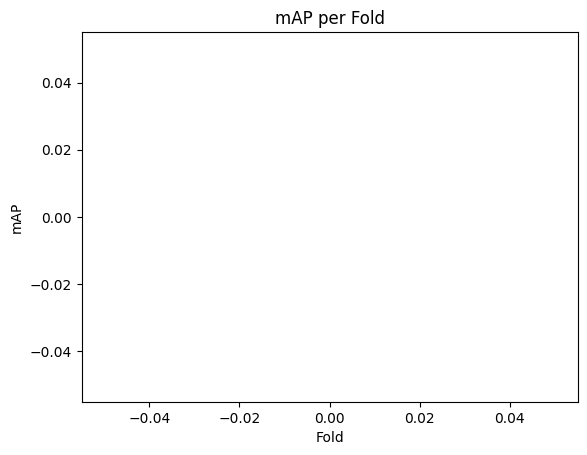

In [35]:
import matplotlib.pyplot as plt
mAP_values = [result.maps[0] for result in fold_results if hasattr(result, 'maps') and len(result.maps) > 0]
plt.plot(range(1, len(mAP_values) + 1), mAP_values, marker='o')
plt.xlabel('Fold')
plt.ylabel('mAP')
plt.title('mAP per Fold')
plt.show()


In [32]:
# Check if 'maps' exists and contains data
if hasattr(results, 'maps') and results.maps.size > 0:  # Ensure maps is not empty
    # Calculate average mAP across all folds, using maps[0] for IoU=0.5
    average_mAP = np.mean([result.maps[0] for result in fold_results if hasattr(result, 'maps') and result.maps.size > 0])  # Ensure maps contains data
    print(f"Average mAP over {len(fold_results)} folds: {average_mAP:.4f}")
else:
    print("No valid mAP data found.")


No valid mAP data found.


In [33]:
# Debugging print to check if 'maps' exists and contains data
for result in fold_results:
    if hasattr(result, 'maps'):
        print(f"maps for fold: {result.maps}")
    else:
        print("No maps attribute in fold result.")


maps for fold: []
maps for fold: []


In [15]:
with open(data_config_path, 'r') as f:
    data_config = f.read().replace('train: ...', f'train: {train_folder}').replace('val: ...', f'val: {val_folder}')


Ground truth masks saved under new_dataset2\test\visualization_of_masks

In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Paths
labels_path = r"new_dataset2/test/labels"
images_path = r"new_dataset2/test/images"
visualization_path = r"new_dataset2/test/visualization_of_masks"

# Ensure the visualization directory exists
os.makedirs(visualization_path, exist_ok=True)

# Track saved image files
saved_images = []

# Track missing images
missing_images = []

# Iterate over label files in the labels directory
for label_file in os.listdir(labels_path):
    if label_file.lower().endswith(".txt"):
        # Remove the .txt extension for matching and anything after the first underscore
        base_name = os.path.splitext(label_file)[0]

        # Find the corresponding image file
        image_file = None
        for image_name in os.listdir(images_path):
            if image_name.lower().startswith(base_name):  # Match the base name
                image_file = image_name
                break

        if image_file is None:
            print(f"No corresponding image found for label file {label_file}, skipping.")
            missing_images.append(label_file)
            continue

        image_file_path = os.path.join(images_path, image_file)

        # Debug: print the expected image path
        print(f"Looking for image: {image_file_path}")

        # Check if the image exists
        if not os.path.exists(image_file_path):
            print(f"Image file {image_file} not found, skipping.")
            missing_images.append(image_file)  # Track missing images
            continue

        # Load the image
        image = Image.open(image_file_path)
        img_width, img_height = image.size  # Get image dimensions

        # Load the corresponding label file
        label_file_path = os.path.join(labels_path, label_file)
        with open(label_file_path, "r") as f:
            labels = f.readlines()

        # Create a plot for the image and the annotations
        fig, ax = plt.subplots(1, figsize=(8, 8))
        ax.imshow(image)

        # Iterate over the labels and plot the polygon masks
        for label in labels:
            parts = label.strip().split()
            pred_class = int(parts[0])  # Class label
            coords = [float(coord) for coord in parts[1:]]  # Remaining numbers are coordinates

            # Convert normalized coordinates into absolute pixel coordinates
            pixel_coords = []
            for i in range(0, len(coords), 2):
                x = coords[i] * img_width  # Scale x-coordinate
                y = coords[i + 1] * img_height  # Scale y-coordinate
                pixel_coords.append((x, y))

            # Create a polygon for the mask
            polygon = patches.Polygon(
                pixel_coords,
                linewidth=2,
                edgecolor='r',  # Red outline for the mask
                facecolor='none'
            )

            # Add the polygon to the plot
            ax.add_patch(polygon)

        # Save the image with annotations in the visualization folder
        output_image_path = os.path.join(visualization_path, f"{base_name}.png")
        plt.axis('off')  # Hide axis
        plt.savefig(output_image_path, bbox_inches="tight", pad_inches=0)
        plt.close()  # Close the plot to free up memory

        # Track saved images
        saved_images.append(output_image_path)
        print(f"Saved visualization for {base_name} in {output_image_path}")

# Print all saved image files
print("\nAll saved images:")
for img in saved_images:
    print(img)

# Print all missing images
print("\nMissing images:")
for missing in missing_images:
    print(missing)

print("Visualization completed and saved.")


Looking for image: new_dataset2/test/images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Saved visualization for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186 in new_dataset2/test/visualization_of_masks\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Looking for image: new_dataset2/test/images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png
Saved visualization for 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60 in new_dataset2/test/visualization_of_masks\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png
Looking for image: new_dataset2/test/images\1.3.6.1.4.1.14519.5.2.1.6279.6001.113679818447732724990336702075_153.png
Saved visualization for 1.3.6.1.4.1.14519.5.2.1.6279.6001.113679818447732724990336702075_153 in new_dataset2/test/visualization_of_masks\1.3.6.1.4.1.14519.5.2.1.6279.6001.113679818447732724990336702075_153.png
Looking for image: new

Make predictions on testing set

10 K Cross validation results

In [37]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Function to calculate IoU
def calculate_iou(pred_mask, gt_mask):
    intersection = np.sum(pred_mask & gt_mask)
    union = np.sum(pred_mask | gt_mask)
    return intersection / union if union != 0 else 0

# Function to create binary mask from polygon
def create_mask_from_polygon(image_size, polygon_coords):
    mask = np.zeros(image_size, dtype=np.uint8)
    polygon = np.array(polygon_coords, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon], 1)
    return mask

# Load YOLO model
model = YOLO(r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs_fold_1\train8\weights\best.pt')

# Define the path where the model is stored
model_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs_fold_1\train8\weights\best.pt'

# Extract the number after "train" but before "\weights"
train_number = model_path.split('train')[1].split('\\weights')[0]

# Paths for images and labels
images_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images'
labels_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\labels'

# Initialize list to store IoU results (with image names)
iou_results = []

# Create a directory to save predictions under the corresponding train# folder
predictions_dir = os.path.join('predictions', f'train{train_number}')
os.makedirs(predictions_dir, exist_ok=True)  # Ensure directory exists

# Process each image
for image_name in os.listdir(images_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.png', '.txt').replace('.jpg', '.txt'))

        print(f"Processing image: {image_name}")
        
        # Load image and run YOLO inference
        img = cv2.imread(image_path)
        results = model.predict(image_path)
        img_height, img_width = img.shape[:2]

        # Parse ground truth mask from label file
        ground_truth_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                coords = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) for i in range(1, len(parts), 2)]
                ground_truth_mask |= create_mask_from_polygon((img_height, img_width), coords)

        # Check if YOLO detected masks
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                predicted_mask = mask.cpu().numpy().astype(np.uint8)
                gt_resized_mask = cv2.resize(ground_truth_mask, (predicted_mask.shape[1], predicted_mask.shape[0]))

                # Calculate IoU
                iou = calculate_iou(predicted_mask, gt_resized_mask)
                iou_results.append((image_name, iou))  # Store both image name and IoU value
                print(f"IOU for {image_name}: {iou:.4f}")

                # Draw predicted polygons on image
                pil_img = Image.open(image_path).convert('RGB')
                draw = ImageDraw.Draw(pil_img)
                
                # Get contours of the mask and convert to polygons
                contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                for contour in contours:
                    contour = contour.reshape(-1, 2)  # Reshape to (n_points, 2)
                    draw.polygon([tuple(pt) for pt in contour], outline="red")

                
                # Save the result in the predictions/train# folder
                pil_img.save(os.path.join(predictions_dir, image_name))
                print(f"Predicted image saved at {os.path.join(predictions_dir, image_name)}")

        else:
            print(f"No masks detected for {image_name}.")

# Calculate mean IoU after processing all images
mean_iou = np.mean([iou for _, iou in iou_results]) if iou_results else 0  # Avoid division by zero if no IoU values were added

# Print IoU results after processing all images
print("\nIoU Results for all images:")
for image_name, iou in iou_results:
    print(f"Image: {image_name} - IoU: {iou:.4f}")
print(f"\nMean IoU: {mean_iou:.4f}")


Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 128x128 (no detections), 20.0ms
Speed: 1.0ms preprocess, 20.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)
No masks detected for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png.
Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png: 128x128 (no detections), 18.0ms
Speed: 1.0ms preprocess, 18.0ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 128)
No masks detected for 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943

4k fold CV results for fold 4

In [5]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Function to calculate IoU
def calculate_iou(pred_mask, gt_mask):
    intersection = np.sum(pred_mask & gt_mask)
    union = np.sum(pred_mask | gt_mask)
    return intersection / union if union != 0 else 0

# Function to create binary mask from polygon
def create_mask_from_polygon(image_size, polygon_coords):
    mask = np.zeros(image_size, dtype=np.uint8)
    polygon = np.array(polygon_coords, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon], 1)
    return mask

# Load YOLO model
model = YOLO(r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs_fold_4\train10\weights\best.pt')

# Define the path where the model is stored
model_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs_fold_4\train10\weights\best.pt'

# Extract the number after "train" but before "\weights"
train_number = model_path.split('runs_fold_')[1].split('\\train10')[0]

# Paths for images and labels
images_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images'
labels_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\labels'

# Initialize list to store IoU results (with image names)
iou_results = []

# Create a directory to save predictions under the corresponding train# folder
predictions_dir = os.path.join('predictions', f'train{train_number}')
os.makedirs(predictions_dir, exist_ok=True)  # Ensure directory exists

# Process each image
for image_name in os.listdir(images_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.png', '.txt').replace('.jpg', '.txt'))

        print(f"Processing image: {image_name}")
        
        # Load image and run YOLO inference
        img = cv2.imread(image_path)
        results = model.predict(image_path)
        img_height, img_width = img.shape[:2]

        # Parse ground truth mask from label file
        ground_truth_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                coords = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) for i in range(1, len(parts), 2)]
                ground_truth_mask |= create_mask_from_polygon((img_height, img_width), coords)

        # Check if YOLO detected masks
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                predicted_mask = mask.cpu().numpy().astype(np.uint8)
                gt_resized_mask = cv2.resize(ground_truth_mask, (predicted_mask.shape[1], predicted_mask.shape[0]))

                # Calculate IoU
                iou = calculate_iou(predicted_mask, gt_resized_mask)
                iou_results.append((image_name, iou))  # Store both image name and IoU value
                print(f"IOU for {image_name}: {iou:.4f}")

                # Draw predicted polygons on image
                pil_img = Image.open(image_path).convert('RGB')
                draw = ImageDraw.Draw(pil_img)
                
                # Get contours of the mask and convert to polygons
                contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                for contour in contours:
                    contour = contour.reshape(-1, 2)  # Reshape to (n_points, 2)
                    draw.polygon([tuple(pt) for pt in contour], outline="red")

                
                # Save the result in the predictions/train# folder
                pil_img.save(os.path.join(predictions_dir, image_name))
                print(f"Predicted image saved at {os.path.join(predictions_dir, image_name)}")

        else:
            print(f"No masks detected for {image_name}.")

# Calculate mean IoU after processing all images
mean_iou = np.mean([iou for _, iou in iou_results]) if iou_results else 0  # Avoid division by zero if no IoU values were added

# Print IoU results after processing all images
print("\nIoU Results for all images:")
for image_name, iou in iou_results:
    print(f"Image: {image_name} - IoU: {iou:.4f}")
print(f"\nMean IoU: {mean_iou:.4f}")


Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 62.0ms
Speed: 4.5ms preprocess, 62.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
IOU for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 0.7789
Predicted image saved at predictions\train4\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png: 640x640 1 nodule, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 64

4k fold CV results for fold 3

In [6]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Function to calculate IoU
def calculate_iou(pred_mask, gt_mask):
    intersection = np.sum(pred_mask & gt_mask)
    union = np.sum(pred_mask | gt_mask)
    return intersection / union if union != 0 else 0

# Function to create binary mask from polygon
def create_mask_from_polygon(image_size, polygon_coords):
    mask = np.zeros(image_size, dtype=np.uint8)
    polygon = np.array(polygon_coords, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon], 1)
    return mask

# Load YOLO model
model = YOLO(r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs_fold_3\train10\weights\best.pt')

# Define the path where the model is stored
model_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs_fold_3\train10\weights\best.pt'

# Extract the number after "train" but before "\weights"
train_number = model_path.split('runs_fold_')[1].split('\\train10')[0]

# Paths for images and labels
images_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images'
labels_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\labels'

# Initialize list to store IoU results (with image names)
iou_results = []

# Create a directory to save predictions under the corresponding train# folder
predictions_dir = os.path.join('predictions', f'train{train_number}')
os.makedirs(predictions_dir, exist_ok=True)  # Ensure directory exists

# Process each image
for image_name in os.listdir(images_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.png', '.txt').replace('.jpg', '.txt'))

        print(f"Processing image: {image_name}")
        
        # Load image and run YOLO inference
        img = cv2.imread(image_path)
        results = model.predict(image_path)
        img_height, img_width = img.shape[:2]

        # Parse ground truth mask from label file
        ground_truth_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                coords = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) for i in range(1, len(parts), 2)]
                ground_truth_mask |= create_mask_from_polygon((img_height, img_width), coords)

        # Check if YOLO detected masks
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                predicted_mask = mask.cpu().numpy().astype(np.uint8)
                gt_resized_mask = cv2.resize(ground_truth_mask, (predicted_mask.shape[1], predicted_mask.shape[0]))

                # Calculate IoU
                iou = calculate_iou(predicted_mask, gt_resized_mask)
                iou_results.append((image_name, iou))  # Store both image name and IoU value
                print(f"IOU for {image_name}: {iou:.4f}")

                # Draw predicted polygons on image
                pil_img = Image.open(image_path).convert('RGB')
                draw = ImageDraw.Draw(pil_img)
                
                # Get contours of the mask and convert to polygons
                contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                for contour in contours:
                    contour = contour.reshape(-1, 2)  # Reshape to (n_points, 2)
                    draw.polygon([tuple(pt) for pt in contour], outline="red")

                
                # Save the result in the predictions/train# folder
                pil_img.save(os.path.join(predictions_dir, image_name))
                print(f"Predicted image saved at {os.path.join(predictions_dir, image_name)}")

        else:
            print(f"No masks detected for {image_name}.")

# Calculate mean IoU after processing all images
mean_iou = np.mean([iou for _, iou in iou_results]) if iou_results else 0  # Avoid division by zero if no IoU values were added

# Print IoU results after processing all images
print("\nIoU Results for all images:")
for image_name, iou in iou_results:
    print(f"Image: {image_name} - IoU: {iou:.4f}")
print(f"\nMean IoU: {mean_iou:.4f}")


Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 52.0ms
Speed: 4.0ms preprocess, 52.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
IOU for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 0.8081
Predicted image saved at predictions\train3\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png: 640x640 (no detections), 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1

4k fold CV results for fold 2

In [7]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Function to calculate IoU
def calculate_iou(pred_mask, gt_mask):
    intersection = np.sum(pred_mask & gt_mask)
    union = np.sum(pred_mask | gt_mask)
    return intersection / union if union != 0 else 0

# Function to create binary mask from polygon
def create_mask_from_polygon(image_size, polygon_coords):
    mask = np.zeros(image_size, dtype=np.uint8)
    polygon = np.array(polygon_coords, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon], 1)
    return mask

# Load YOLO model
model = YOLO(r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs_fold_2\train10\weights\best.pt')

# Define the path where the model is stored
model_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs_fold_2\train10\weights\best.pt'

# Extract the number after "train" but before "\weights"
train_number = model_path.split('runs_fold_')[1].split('\\train10')[0]

# Paths for images and labels
images_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images'
labels_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\labels'

# Initialize list to store IoU results (with image names)
iou_results = []

# Create a directory to save predictions under the corresponding train# folder
predictions_dir = os.path.join('predictions', f'train{train_number}')
os.makedirs(predictions_dir, exist_ok=True)  # Ensure directory exists

# Process each image
for image_name in os.listdir(images_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.png', '.txt').replace('.jpg', '.txt'))

        print(f"Processing image: {image_name}")
        
        # Load image and run YOLO inference
        img = cv2.imread(image_path)
        results = model.predict(image_path)
        img_height, img_width = img.shape[:2]

        # Parse ground truth mask from label file
        ground_truth_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                coords = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) for i in range(1, len(parts), 2)]
                ground_truth_mask |= create_mask_from_polygon((img_height, img_width), coords)

        # Check if YOLO detected masks
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                predicted_mask = mask.cpu().numpy().astype(np.uint8)
                gt_resized_mask = cv2.resize(ground_truth_mask, (predicted_mask.shape[1], predicted_mask.shape[0]))

                # Calculate IoU
                iou = calculate_iou(predicted_mask, gt_resized_mask)
                iou_results.append((image_name, iou))  # Store both image name and IoU value
                print(f"IOU for {image_name}: {iou:.4f}")

                # Draw predicted polygons on image
                pil_img = Image.open(image_path).convert('RGB')
                draw = ImageDraw.Draw(pil_img)
                
                # Get contours of the mask and convert to polygons
                contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                for contour in contours:
                    contour = contour.reshape(-1, 2)  # Reshape to (n_points, 2)
                    draw.polygon([tuple(pt) for pt in contour], outline="red")

                
                # Save the result in the predictions/train# folder
                pil_img.save(os.path.join(predictions_dir, image_name))
                print(f"Predicted image saved at {os.path.join(predictions_dir, image_name)}")

        else:
            print(f"No masks detected for {image_name}.")

# Calculate mean IoU after processing all images
mean_iou = np.mean([iou for _, iou in iou_results]) if iou_results else 0  # Avoid division by zero if no IoU values were added

# Print IoU results after processing all images
print("\nIoU Results for all images:")
for image_name, iou in iou_results:
    print(f"Image: {image_name} - IoU: {iou:.4f}")
print(f"\nMean IoU: {mean_iou:.4f}")


Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 56.5ms
Speed: 4.0ms preprocess, 56.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
IOU for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 0.7984
Predicted image saved at predictions\train2\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png: 640x640 1 nodule, 52.5ms
Speed: 4.0ms preprocess, 52.5ms inference, 2.0ms postprocess per image at shape (1, 3, 

4k fold CV results for fold 1 

In [8]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Function to calculate IoU
def calculate_iou(pred_mask, gt_mask):
    intersection = np.sum(pred_mask & gt_mask)
    union = np.sum(pred_mask | gt_mask)
    return intersection / union if union != 0 else 0

# Function to create binary mask from polygon
def create_mask_from_polygon(image_size, polygon_coords):
    mask = np.zeros(image_size, dtype=np.uint8)
    polygon = np.array(polygon_coords, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon], 1)
    return mask

# Load YOLO model
model = YOLO(r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs_fold_1\train10\weights\best.pt')

# Define the path where the model is stored
model_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs_fold_1\train10\weights\best.pt'

# Extract the number after "train" but before "\weights"
train_number = model_path.split('runs_fold_')[1].split('\\train10')[0]

# Paths for images and labels
images_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images'
labels_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\labels'

# Initialize list to store IoU results (with image names)
iou_results = []

# Create a directory to save predictions under the corresponding train# folder
predictions_dir = os.path.join('predictions', f'train{train_number}')
os.makedirs(predictions_dir, exist_ok=True)  # Ensure directory exists

# Process each image
for image_name in os.listdir(images_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.png', '.txt').replace('.jpg', '.txt'))

        print(f"Processing image: {image_name}")
        
        # Load image and run YOLO inference
        img = cv2.imread(image_path)
        results = model.predict(image_path)
        img_height, img_width = img.shape[:2]

        # Parse ground truth mask from label file
        ground_truth_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                coords = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) for i in range(1, len(parts), 2)]
                ground_truth_mask |= create_mask_from_polygon((img_height, img_width), coords)

        # Check if YOLO detected masks
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                predicted_mask = mask.cpu().numpy().astype(np.uint8)
                gt_resized_mask = cv2.resize(ground_truth_mask, (predicted_mask.shape[1], predicted_mask.shape[0]))

                # Calculate IoU
                iou = calculate_iou(predicted_mask, gt_resized_mask)
                iou_results.append((image_name, iou))  # Store both image name and IoU value
                print(f"IOU for {image_name}: {iou:.4f}")

                # Draw predicted polygons on image
                pil_img = Image.open(image_path).convert('RGB')
                draw = ImageDraw.Draw(pil_img)
                
                # Get contours of the mask and convert to polygons
                contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                for contour in contours:
                    contour = contour.reshape(-1, 2)  # Reshape to (n_points, 2)
                    draw.polygon([tuple(pt) for pt in contour], outline="red")

                
                # Save the result in the predictions/train# folder
                pil_img.save(os.path.join(predictions_dir, image_name))
                print(f"Predicted image saved at {os.path.join(predictions_dir, image_name)}")

        else:
            print(f"No masks detected for {image_name}.")

# Calculate mean IoU after processing all images
mean_iou = np.mean([iou for _, iou in iou_results]) if iou_results else 0  # Avoid division by zero if no IoU values were added

# Print IoU results after processing all images
print("\nIoU Results for all images:")
for image_name, iou in iou_results:
    print(f"Image: {image_name} - IoU: {iou:.4f}")
print(f"\nMean IoU: {mean_iou:.4f}")


Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 65.0ms
Speed: 4.5ms preprocess, 65.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
IOU for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 0.8058
Predicted image saved at predictions\train1\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png: 640x640 1 nodule, 51.0ms
Speed: 4.0ms preprocess, 51.0ms inference, 2.0ms postprocess per image at shape (1, 3, 

Train98 - Voxel coordinates YOLOv11 (100 epochs)

In [55]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Function to calculate IoU
def calculate_iou(pred_mask, gt_mask):
    intersection = np.sum(pred_mask & gt_mask)
    union = np.sum(pred_mask | gt_mask)
    return intersection / union if union != 0 else 0

# Function to create binary mask from polygon
def create_mask_from_polygon(image_size, polygon_coords):
    mask = np.zeros(image_size, dtype=np.uint8)
    polygon = np.array(polygon_coords, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon], 1)
    return mask

# Load YOLO model
model = YOLO(r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train98\weights\best.pt')

# Define the path where the model is stored
model_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train98\weights\best.pt'

# Extract the number after "train" but before "\weights"
train_number = model_path.split('train')[1].split('\\weights')[0]

# Paths for images and labels
images_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images'
labels_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\labels'

# Initialize list to store IoU results (with image names)
iou_results = []

# Create a directory to save predictions under the corresponding train# folder
predictions_dir = os.path.join('predictions', f'train{train_number}')
os.makedirs(predictions_dir, exist_ok=True)  # Ensure directory exists

# Process each image
for image_name in os.listdir(images_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.png', '.txt').replace('.jpg', '.txt'))

        print(f"Processing image: {image_name}")
        
        # Load image and run YOLO inference
        img = cv2.imread(image_path)
        results = model.predict(image_path)
        img_height, img_width = img.shape[:2]

        # Parse ground truth mask from label file
        ground_truth_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                coords = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) for i in range(1, len(parts), 2)]
                ground_truth_mask |= create_mask_from_polygon((img_height, img_width), coords)

        # Check if YOLO detected masks
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                predicted_mask = mask.cpu().numpy().astype(np.uint8)
                gt_resized_mask = cv2.resize(ground_truth_mask, (predicted_mask.shape[1], predicted_mask.shape[0]))

                # Calculate IoU
                iou = calculate_iou(predicted_mask, gt_resized_mask)
                iou_results.append((image_name, iou))  # Store both image name and IoU value
                print(f"IOU for {image_name}: {iou:.4f}")

                # Draw predicted polygons on image
                pil_img = Image.open(image_path).convert('RGB')
                draw = ImageDraw.Draw(pil_img)
                
                # Get contours of the mask and convert to polygons
                contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                for contour in contours:
                    contour = contour.reshape(-1, 2)  # Reshape to (n_points, 2)
                    draw.polygon([tuple(pt) for pt in contour], outline="red")

                
                # Save the result in the predictions/train# folder
                pil_img.save(os.path.join(predictions_dir, image_name))
                print(f"Predicted image saved at {os.path.join(predictions_dir, image_name)}")

        else:
            print(f"No masks detected for {image_name}.")

# Calculate mean IoU after processing all images
mean_iou = np.mean([iou for _, iou in iou_results]) if iou_results else 0  # Avoid division by zero if no IoU values were added

# Print IoU results after processing all images
print("\nIoU Results for all images:")
for image_name, iou in iou_results:
    print(f"Image: {image_name} - IoU: {iou:.4f}")
print(f"\nMean IoU: {mean_iou:.4f}")


Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 51.5ms
Speed: 4.0ms preprocess, 51.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
IOU for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 0.7956
Predicted image saved at predictions\train98\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png: 640x640 1 nodule, 51.5ms
Speed: 15.0ms preprocess, 51.5ms inference, 1.0ms postprocess per image at shape (1, 3

Train101 - Voxel coordinates YOLOv11 (50 epochs)

In [56]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Function to calculate IoU
def calculate_iou(pred_mask, gt_mask):
    intersection = np.sum(pred_mask & gt_mask)
    union = np.sum(pred_mask | gt_mask)
    return intersection / union if union != 0 else 0

# Function to create binary mask from polygon
def create_mask_from_polygon(image_size, polygon_coords):
    mask = np.zeros(image_size, dtype=np.uint8)
    polygon = np.array(polygon_coords, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon], 1)
    return mask

# Load YOLO model
model = YOLO(r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train101\weights\best.pt')

# Define the path where the model is stored
model_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train101\weights\best.pt'

# Extract the number after "train" but before "\weights"
train_number = model_path.split('train')[1].split('\\weights')[0]

# Paths for images and labels
images_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images'
labels_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\labels'

# Initialize list to store IoU results (with image names)
iou_results = []

# Create a directory to save predictions under the corresponding train# folder
predictions_dir = os.path.join('predictions', f'train{train_number}')
os.makedirs(predictions_dir, exist_ok=True)  # Ensure directory exists

# Process each image
for image_name in os.listdir(images_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.png', '.txt').replace('.jpg', '.txt'))

        print(f"Processing image: {image_name}")
        
        # Load image and run YOLO inference
        img = cv2.imread(image_path)
        results = model.predict(image_path)
        img_height, img_width = img.shape[:2]

        # Parse ground truth mask from label file
        ground_truth_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                coords = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) for i in range(1, len(parts), 2)]
                ground_truth_mask |= create_mask_from_polygon((img_height, img_width), coords)

        # Check if YOLO detected masks
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                predicted_mask = mask.cpu().numpy().astype(np.uint8)
                gt_resized_mask = cv2.resize(ground_truth_mask, (predicted_mask.shape[1], predicted_mask.shape[0]))

                # Calculate IoU
                iou = calculate_iou(predicted_mask, gt_resized_mask)
                iou_results.append((image_name, iou))  # Store both image name and IoU value
                print(f"IOU for {image_name}: {iou:.4f}")

                # Draw predicted polygons on image
                pil_img = Image.open(image_path).convert('RGB')
                draw = ImageDraw.Draw(pil_img)
                
                # Get contours of the mask and convert to polygons
                contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                for contour in contours:
                    contour = contour.reshape(-1, 2)  # Reshape to (n_points, 2)
                    draw.polygon([tuple(pt) for pt in contour], outline="red")

                
                # Save the result in the predictions/train# folder
                pil_img.save(os.path.join(predictions_dir, image_name))
                print(f"Predicted image saved at {os.path.join(predictions_dir, image_name)}")

        else:
            print(f"No masks detected for {image_name}.")

# Calculate mean IoU after processing all images
mean_iou = np.mean([iou for _, iou in iou_results]) if iou_results else 0  # Avoid division by zero if no IoU values were added

# Print IoU results after processing all images
print("\nIoU Results for all images:")
for image_name, iou in iou_results:
    print(f"Image: {image_name} - IoU: {iou:.4f}")
print(f"\nMean IoU: {mean_iou:.4f}")


Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 47.0ms
Speed: 11.0ms preprocess, 47.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
IOU for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 0.7953
Predicted image saved at predictions\train101\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png: 640x640 1 nodule, 41.1ms
Speed: 10.0ms preprocess, 41.1ms inference, 3.0ms postprocess per image at shape (1,

Train102 - Voxel coordinates YOLOv11 (150 epochs)

In [57]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Function to calculate IoU
def calculate_iou(pred_mask, gt_mask):
    intersection = np.sum(pred_mask & gt_mask)
    union = np.sum(pred_mask | gt_mask)
    return intersection / union if union != 0 else 0

# Function to create binary mask from polygon
def create_mask_from_polygon(image_size, polygon_coords):
    mask = np.zeros(image_size, dtype=np.uint8)
    polygon = np.array(polygon_coords, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon], 1)
    return mask

# Load YOLO model
model = YOLO(r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train102\weights\best.pt')

# Define the path where the model is stored
model_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train102\weights\best.pt'

# Extract the number after "train" but before "\weights"
train_number = model_path.split('train')[1].split('\\weights')[0]

# Paths for images and labels
images_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images'
labels_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\labels'

# Initialize list to store IoU results (with image names)
iou_results = []

# Create a directory to save predictions under the corresponding train# folder
predictions_dir = os.path.join('predictions', f'train{train_number}')
os.makedirs(predictions_dir, exist_ok=True)  # Ensure directory exists

# Process each image
for image_name in os.listdir(images_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.png', '.txt').replace('.jpg', '.txt'))

        print(f"Processing image: {image_name}")
        
        # Load image and run YOLO inference
        img = cv2.imread(image_path)
        results = model.predict(image_path)
        img_height, img_width = img.shape[:2]

        # Parse ground truth mask from label file
        ground_truth_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                coords = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) for i in range(1, len(parts), 2)]
                ground_truth_mask |= create_mask_from_polygon((img_height, img_width), coords)

        # Check if YOLO detected masks
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                predicted_mask = mask.cpu().numpy().astype(np.uint8)
                gt_resized_mask = cv2.resize(ground_truth_mask, (predicted_mask.shape[1], predicted_mask.shape[0]))

                # Calculate IoU
                iou = calculate_iou(predicted_mask, gt_resized_mask)
                iou_results.append((image_name, iou))  # Store both image name and IoU value
                print(f"IOU for {image_name}: {iou:.4f}")

                # Draw predicted polygons on image
                pil_img = Image.open(image_path).convert('RGB')
                draw = ImageDraw.Draw(pil_img)
                
                # Get contours of the mask and convert to polygons
                contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                for contour in contours:
                    contour = contour.reshape(-1, 2)  # Reshape to (n_points, 2)
                    draw.polygon([tuple(pt) for pt in contour], outline="red")

                
                # Save the result in the predictions/train# folder
                pil_img.save(os.path.join(predictions_dir, image_name))
                print(f"Predicted image saved at {os.path.join(predictions_dir, image_name)}")

        else:
            print(f"No masks detected for {image_name}.")

# Calculate mean IoU after processing all images
mean_iou = np.mean([iou for _, iou in iou_results]) if iou_results else 0  # Avoid division by zero if no IoU values were added

# Print IoU results after processing all images
print("\nIoU Results for all images:")
for image_name, iou in iou_results:
    print(f"Image: {image_name} - IoU: {iou:.4f}")
print(f"\nMean IoU: {mean_iou:.4f}")


Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 71.5ms
Speed: 4.0ms preprocess, 71.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
IOU for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 0.7952
Predicted image saved at predictions\train102\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png: 640x640 1 nodule, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 

Train87 - Physical coordinates YOLOv11 (100 epochs)

In [58]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Function to calculate IoU
def calculate_iou(pred_mask, gt_mask):
    intersection = np.sum(pred_mask & gt_mask)
    union = np.sum(pred_mask | gt_mask)
    return intersection / union if union != 0 else 0

# Function to create binary mask from polygon
def create_mask_from_polygon(image_size, polygon_coords):
    mask = np.zeros(image_size, dtype=np.uint8)
    polygon = np.array(polygon_coords, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon], 1)
    return mask

# Load YOLO model
model = YOLO(r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train87\weights\best.pt')

# Define the path where the model is stored
model_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train87\weights\best.pt'

# Extract the number after "train" but before "\weights"
train_number = model_path.split('train')[1].split('\\weights')[0]

# Paths for images and labels
images_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images'
labels_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\labels'

# Initialize list to store IoU results (with image names)
iou_results = []

# Create a directory to save predictions under the corresponding train# folder
predictions_dir = os.path.join('predictions', f'train{train_number}')
os.makedirs(predictions_dir, exist_ok=True)  # Ensure directory exists

# Process each image
for image_name in os.listdir(images_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.png', '.txt').replace('.jpg', '.txt'))

        print(f"Processing image: {image_name}")
        
        # Load image and run YOLO inference
        img = cv2.imread(image_path)
        results = model.predict(image_path)
        img_height, img_width = img.shape[:2]

        # Parse ground truth mask from label file
        ground_truth_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                coords = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) for i in range(1, len(parts), 2)]
                ground_truth_mask |= create_mask_from_polygon((img_height, img_width), coords)

        # Check if YOLO detected masks
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                predicted_mask = mask.cpu().numpy().astype(np.uint8)
                gt_resized_mask = cv2.resize(ground_truth_mask, (predicted_mask.shape[1], predicted_mask.shape[0]))

                # Calculate IoU
                iou = calculate_iou(predicted_mask, gt_resized_mask)
                iou_results.append((image_name, iou))  # Store both image name and IoU value
                print(f"IOU for {image_name}: {iou:.4f}")

                # Draw predicted polygons on image
                pil_img = Image.open(image_path).convert('RGB')
                draw = ImageDraw.Draw(pil_img)
                
                # Get contours of the mask and convert to polygons
                contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                for contour in contours:
                    contour = contour.reshape(-1, 2)  # Reshape to (n_points, 2)
                    draw.polygon([tuple(pt) for pt in contour], outline="red")

                
                # Save the result in the predictions/train# folder
                pil_img.save(os.path.join(predictions_dir, image_name))
                print(f"Predicted image saved at {os.path.join(predictions_dir, image_name)}")

        else:
            print(f"No masks detected for {image_name}.")

# Calculate mean IoU after processing all images
mean_iou = np.mean([iou for _, iou in iou_results]) if iou_results else 0  # Avoid division by zero if no IoU values were added

# Print IoU results after processing all images
print("\nIoU Results for all images:")
for image_name, iou in iou_results:
    print(f"Image: {image_name} - IoU: {iou:.4f}")
print(f"\nMean IoU: {mean_iou:.4f}")


Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 65.5ms
Speed: 3.0ms preprocess, 65.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
IOU for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 0.7899
Predicted image saved at predictions\train87\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png: 640x640 1 nodule, 49.5ms
Speed: 4.1ms preprocess, 49.5ms inference, 2.0ms postprocess per image at shape (1, 3,

Train95 - Physical coordinates YOLOv11 (150 epochs)

In [59]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Function to calculate IoU
def calculate_iou(pred_mask, gt_mask):
    intersection = np.sum(pred_mask & gt_mask)
    union = np.sum(pred_mask | gt_mask)
    return intersection / union if union != 0 else 0

# Function to create binary mask from polygon
def create_mask_from_polygon(image_size, polygon_coords):
    mask = np.zeros(image_size, dtype=np.uint8)
    polygon = np.array(polygon_coords, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon], 1)
    return mask

# Load YOLO model
model = YOLO(r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train95\weights\best.pt')

# Define the path where the model is stored
model_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train95\weights\best.pt'

# Extract the number after "train" but before "\weights"
train_number = model_path.split('train')[1].split('\\weights')[0]

# Paths for images and labels
images_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images'
labels_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\labels'

# Initialize list to store IoU results (with image names)
iou_results = []

# Create a directory to save predictions under the corresponding train# folder
predictions_dir = os.path.join('predictions', f'train{train_number}')
os.makedirs(predictions_dir, exist_ok=True)  # Ensure directory exists

# Process each image
for image_name in os.listdir(images_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.png', '.txt').replace('.jpg', '.txt'))

        print(f"Processing image: {image_name}")
        
        # Load image and run YOLO inference
        img = cv2.imread(image_path)
        results = model.predict(image_path)
        img_height, img_width = img.shape[:2]

        # Parse ground truth mask from label file
        ground_truth_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                coords = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) for i in range(1, len(parts), 2)]
                ground_truth_mask |= create_mask_from_polygon((img_height, img_width), coords)

        # Check if YOLO detected masks
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                predicted_mask = mask.cpu().numpy().astype(np.uint8)
                gt_resized_mask = cv2.resize(ground_truth_mask, (predicted_mask.shape[1], predicted_mask.shape[0]))

                # Calculate IoU
                iou = calculate_iou(predicted_mask, gt_resized_mask)
                iou_results.append((image_name, iou))  # Store both image name and IoU value
                print(f"IOU for {image_name}: {iou:.4f}")

                # Draw predicted polygons on image
                pil_img = Image.open(image_path).convert('RGB')
                draw = ImageDraw.Draw(pil_img)
                
                # Get contours of the mask and convert to polygons
                contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                for contour in contours:
                    contour = contour.reshape(-1, 2)  # Reshape to (n_points, 2)
                    draw.polygon([tuple(pt) for pt in contour], outline="red")

                
                # Save the result in the predictions/train# folder
                pil_img.save(os.path.join(predictions_dir, image_name))
                print(f"Predicted image saved at {os.path.join(predictions_dir, image_name)}")

        else:
            print(f"No masks detected for {image_name}.")

# Calculate mean IoU after processing all images
mean_iou = np.mean([iou for _, iou in iou_results]) if iou_results else 0  # Avoid division by zero if no IoU values were added

# Print IoU results after processing all images
print("\nIoU Results for all images:")
for image_name, iou in iou_results:
    print(f"Image: {image_name} - IoU: {iou:.4f}")
print(f"\nMean IoU: {mean_iou:.4f}")


Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 75.5ms
Speed: 8.0ms preprocess, 75.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
IOU for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 0.8094
Predicted image saved at predictions\train95\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png: 640x640 1 nodule, 32.2ms
Speed: 4.0ms preprocess, 32.2ms inference, 2.0ms postprocess per image at shape (1, 3,

Train88 - Physical coordinates YOLOv11 (50 epochs)

In [60]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Function to calculate IoU
def calculate_iou(pred_mask, gt_mask):
    intersection = np.sum(pred_mask & gt_mask)
    union = np.sum(pred_mask | gt_mask)
    return intersection / union if union != 0 else 0

# Function to create binary mask from polygon
def create_mask_from_polygon(image_size, polygon_coords):
    mask = np.zeros(image_size, dtype=np.uint8)
    polygon = np.array(polygon_coords, np.int32).reshape((-1, 1, 2))
    cv2.fillPoly(mask, [polygon], 1)
    return mask

# Load YOLO model
model = YOLO(r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train88\weights\best.pt')

# Define the path where the model is stored
model_path = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\runs\segment\train88\weights\best.pt'

# Extract the number after "train" but before "\weights"
train_number = model_path.split('train')[1].split('\\weights')[0]

# Paths for images and labels
images_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images'
labels_folder = r'C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\labels'

# Initialize list to store IoU results (with image names)
iou_results = []

# Create a directory to save predictions under the corresponding train# folder
predictions_dir = os.path.join('predictions', f'train{train_number}')
os.makedirs(predictions_dir, exist_ok=True)  # Ensure directory exists

# Process each image
for image_name in os.listdir(images_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_folder, image_name)
        label_path = os.path.join(labels_folder, image_name.replace('.png', '.txt').replace('.jpg', '.txt'))

        print(f"Processing image: {image_name}")
        
        # Load image and run YOLO inference
        img = cv2.imread(image_path)
        results = model.predict(image_path)
        img_height, img_width = img.shape[:2]

        # Parse ground truth mask from label file
        ground_truth_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                coords = [(float(parts[i]) * img_width, float(parts[i + 1]) * img_height) for i in range(1, len(parts), 2)]
                ground_truth_mask |= create_mask_from_polygon((img_height, img_width), coords)

        # Check if YOLO detected masks
        if results[0].masks is not None:
            for mask in results[0].masks.data:
                predicted_mask = mask.cpu().numpy().astype(np.uint8)
                gt_resized_mask = cv2.resize(ground_truth_mask, (predicted_mask.shape[1], predicted_mask.shape[0]))

                # Calculate IoU
                iou = calculate_iou(predicted_mask, gt_resized_mask)
                iou_results.append((image_name, iou))  # Store both image name and IoU value
                print(f"IOU for {image_name}: {iou:.4f}")

                # Draw predicted polygons on image
                pil_img = Image.open(image_path).convert('RGB')
                draw = ImageDraw.Draw(pil_img)
                
                # Get contours of the mask and convert to polygons
                contours, _ = cv2.findContours(predicted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                for contour in contours:
                    contour = contour.reshape(-1, 2)  # Reshape to (n_points, 2)
                    draw.polygon([tuple(pt) for pt in contour], outline="red")

                
                # Save the result in the predictions/train# folder
                pil_img.save(os.path.join(predictions_dir, image_name))
                print(f"Predicted image saved at {os.path.join(predictions_dir, image_name)}")

        else:
            print(f"No masks detected for {image_name}.")

# Calculate mean IoU after processing all images
mean_iou = np.mean([iou for _, iou in iou_results]) if iou_results else 0  # Avoid division by zero if no IoU values were added

# Print IoU results after processing all images
print("\nIoU Results for all images:")
for image_name, iou in iou_results:
    print(f"Image: {image_name} - IoU: {iou:.4f}")
print(f"\nMean IoU: {mean_iou:.4f}")


Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 640x640 1 nodule, 73.5ms
Speed: 4.0ms preprocess, 73.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
IOU for 1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png: 0.7896
Predicted image saved at predictions\train88\1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375_186.png
Processing image: 1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png

image 1/1 C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset2\test\images\1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943_60.png: 640x640 1 nodule, 54.5ms
Speed: 4.0ms preprocess, 54.5ms inference, 2.0ms postprocess per image at shape (1, 3,

Make ground truth labels 

In [ ]:
import os
import pandas as pd

# Paths
annotations_file = "annotations_with_voxel_coords.csv"  # Path to annotations.csv
images_path = "new_dataset2/test/images"
labels_path = "new_dataset2/test/labels"

# Ensure the labels directory exists
os.makedirs(labels_path, exist_ok=True)

# Load the annotations
annotations = pd.read_csv(annotations_file)

# Ensure 'seriesuid' column exists (check for its existence)
if "Image" not in annotations.columns:
    raise ValueError("'Image' column is missing from the annotations file.")

# Extract the part before '.mhd' in the Image column
annotations["Image"] = annotations["Image"].str.split(".mhd").str[0]

# Convert relevant columns to numeric, handling any errors
numeric_columns = ["Voxel_X", "Voxel_Y", "Voxel_Z", "Diameter_voxel"]
annotations[numeric_columns] = annotations[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Normalize the numeric columns to range [0, 1]
for col in numeric_columns:
    min_val = annotations[col].min()
    max_val = annotations[col].max()
    annotations[col] = (annotations[col] - min_val) / (max_val - min_val)

# Iterate over each image in the images directory
for image_file in os.listdir(images_path):
    if image_file.lower().endswith(".png"):  # Make it case-insensitive for extensions
        # Remove the .png extension for matching and anything after the first underscore
        base_name = os.path.splitext(image_file)[0].split("_")[0]

        # Filter annotations for this specific base name (seriesuid)
        image_annotations = annotations[annotations["Image"] == base_name]

        # Skip if no annotations are found for this image
        if image_annotations.empty:
            print(f"No annotations found for {image_file}, skipping.")
            continue

        # Group annotations by z_center (slice) and average the values
        grouped_annotations = (
            image_annotations.groupby("coordZ", as_index=False)[numeric_columns].mean()
        )

        # Prepare the label file path
        label_file = base_name + ".txt"
        label_file_path = os.path.join(labels_path, label_file)

        # Write each annotation for this image to the corresponding label file
        with open(label_file_path, "w") as f:
            for _, row in grouped_annotations.iterrows():
                # Extract the required values
                pred_class = 1  # Assuming a single class; update as necessary
                x_center = row["Voxel_X"]
                y_center = row["Voxel_Y"]
                z_center = row["Voxel_Z"]
                diameter = row["Diameter_voxel"]

                # Write to file in the specified format
                f.write(f"{pred_class} {x_center} {y_center} {z_center} {diameter}\n")  # Use space instead of comma for the format

print(f"Labels saved in {labels_path}")


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x00000203197B0A60>
Traceback (most recent call last):
  File "c:\Users\zinah\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "c:\Users\zinah\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py", line 1442, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "c:\Users\zinah\AppData\Local\Programs\Python\Python310\lib\multiprocessing\process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "c:\Users\zinah\AppData\Local\Programs\Python\Python310\lib\multiprocessing\popen_spawn_win32.py", line 108, in wait
    res = _winapi.WaitForSingleObject(int(self._handle), msecs)
KeyboardInterrupt: 


Ground Truth Masks 

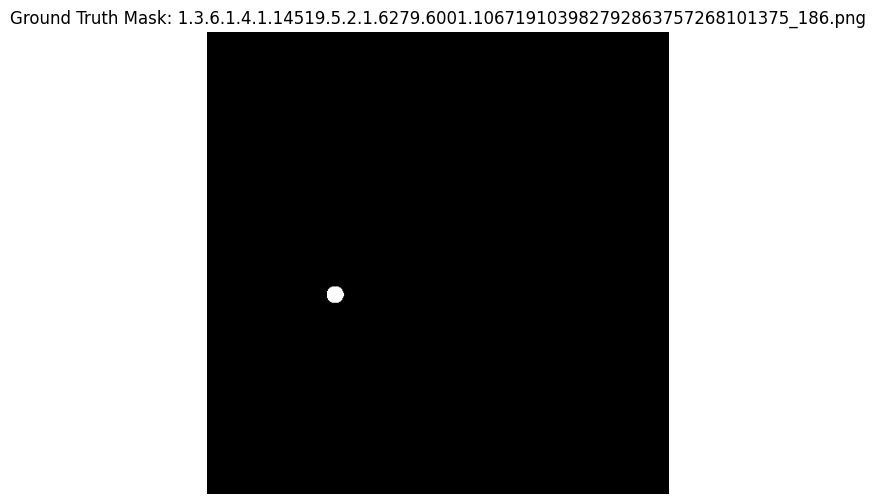

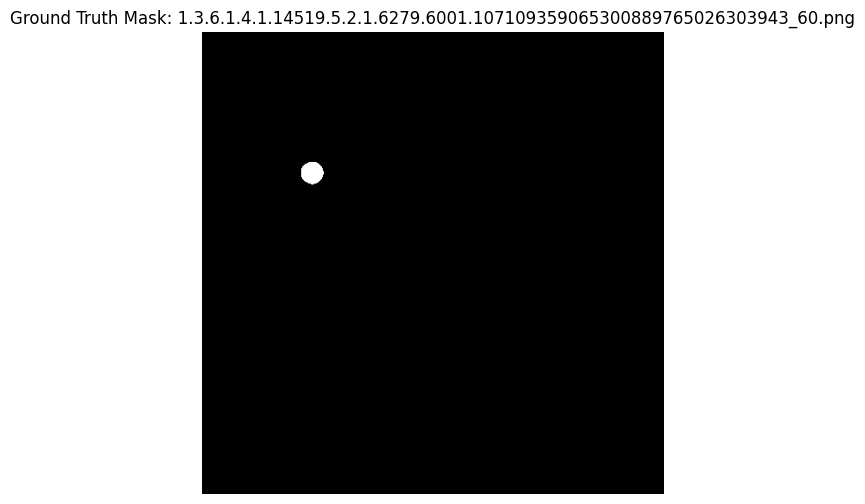

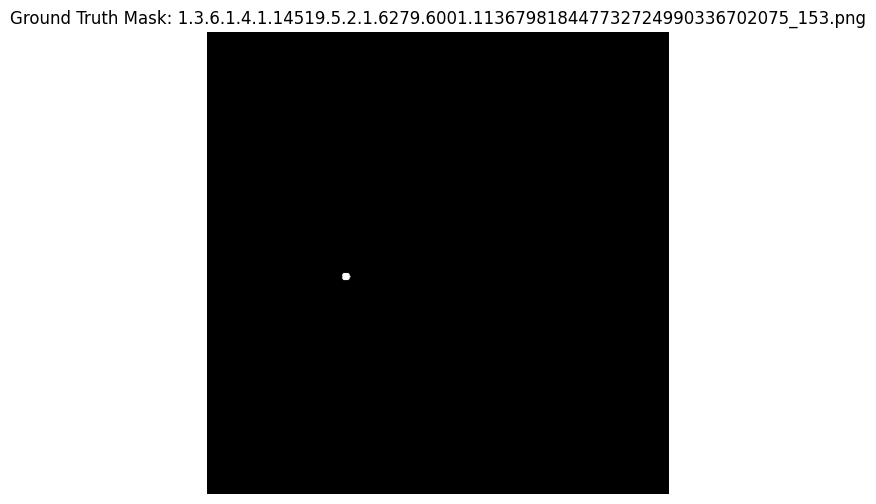

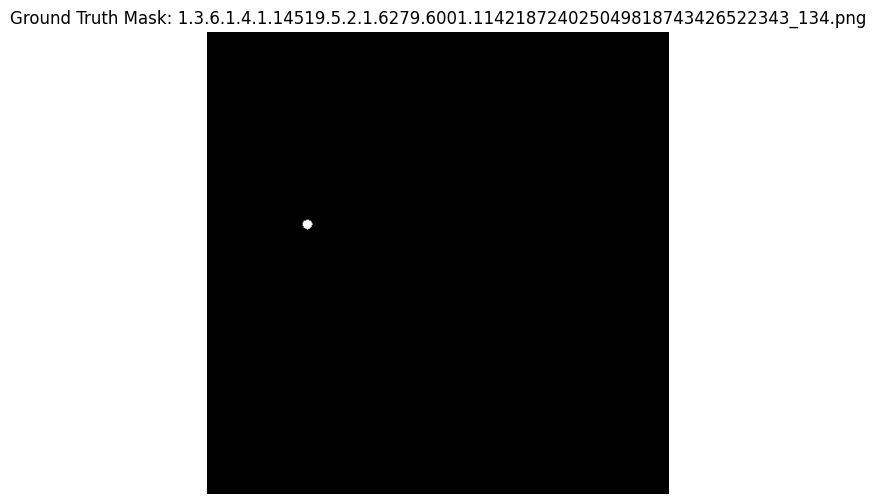

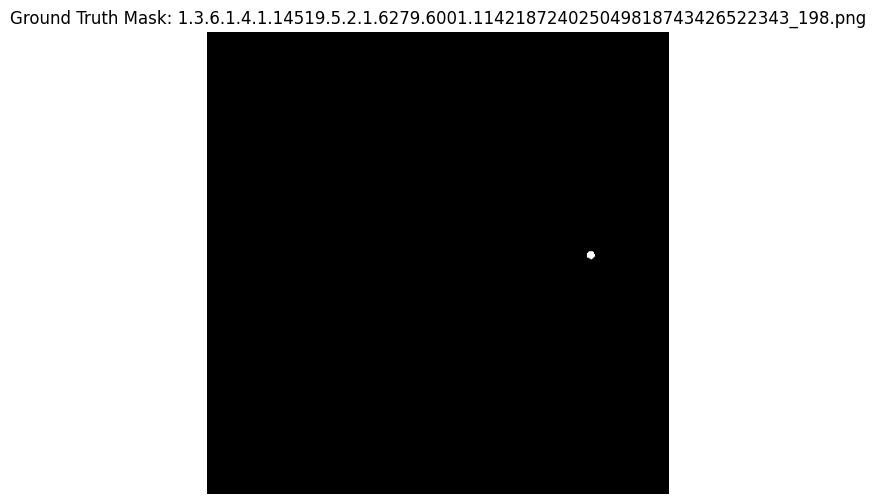

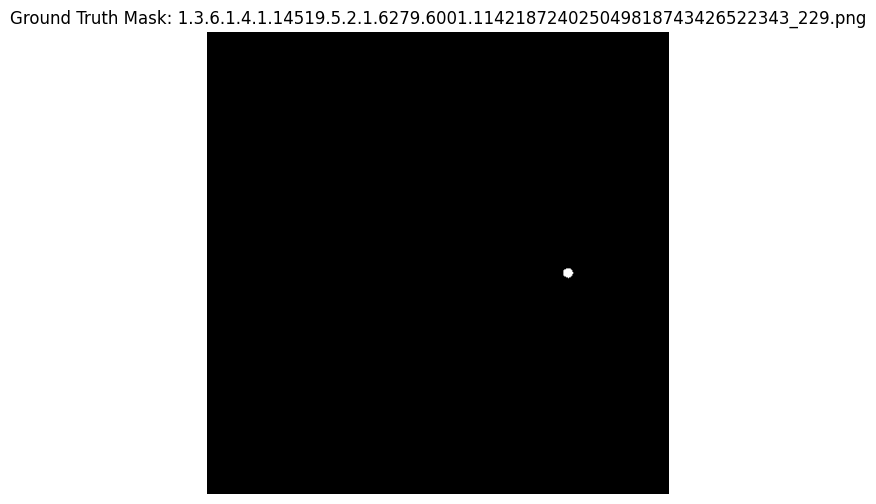

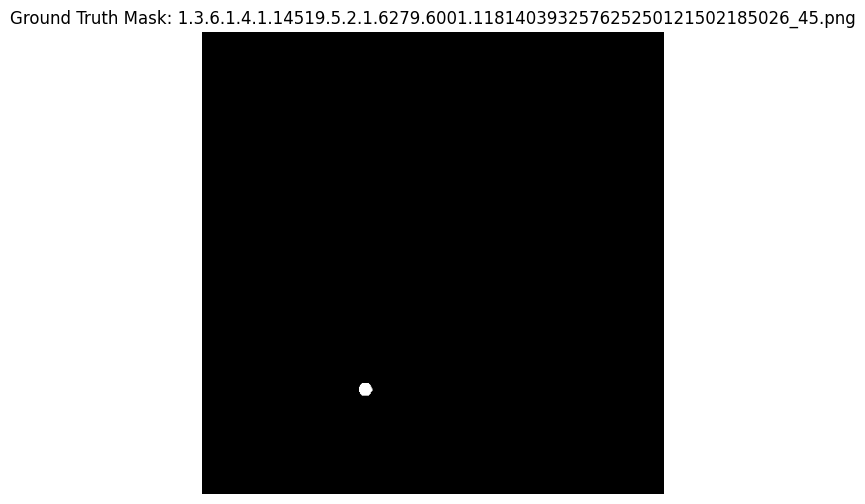

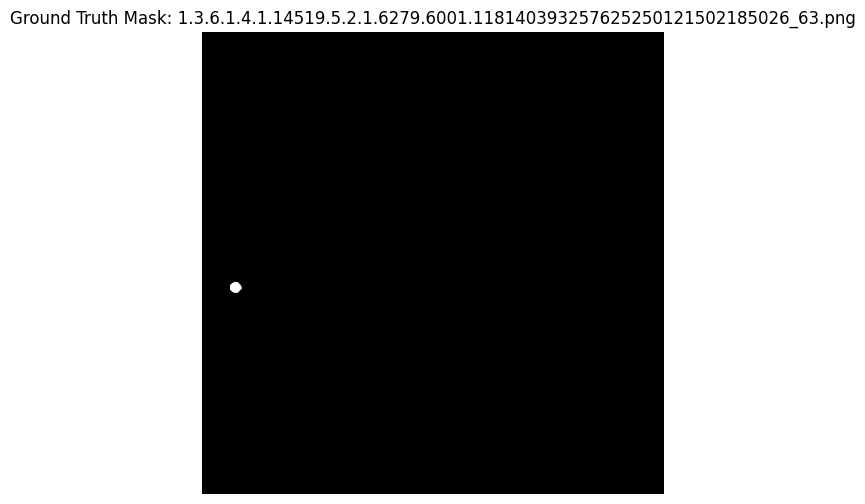

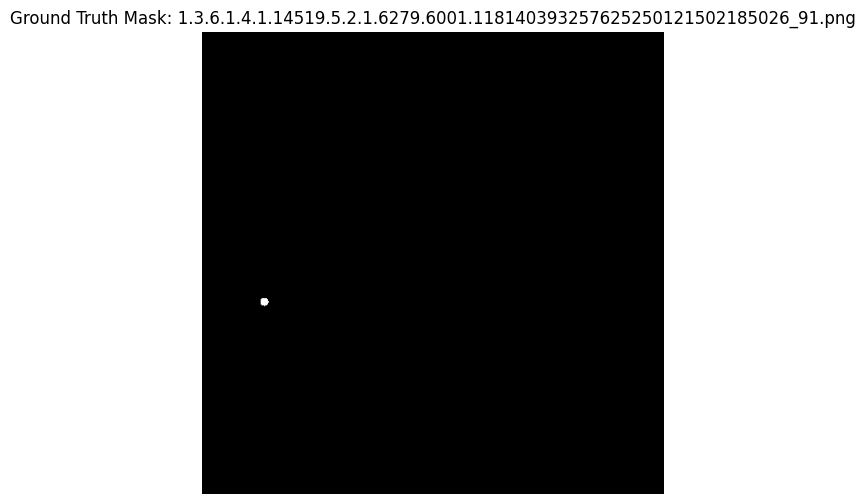

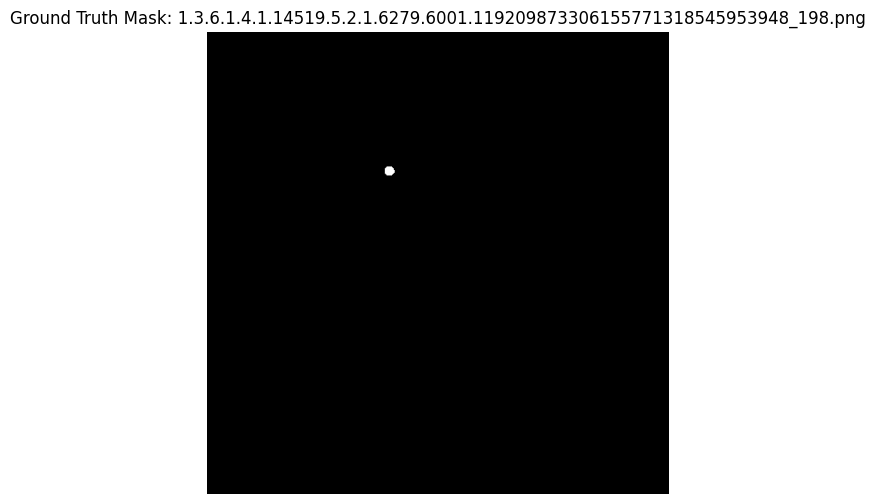

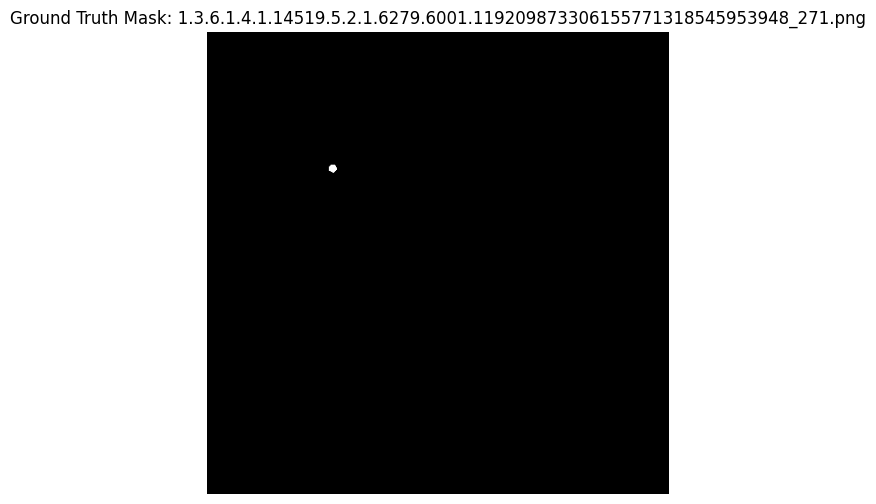

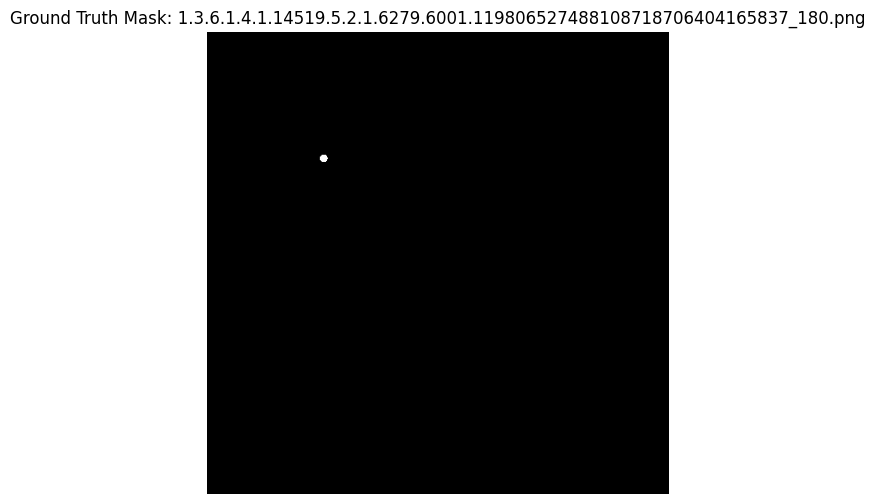

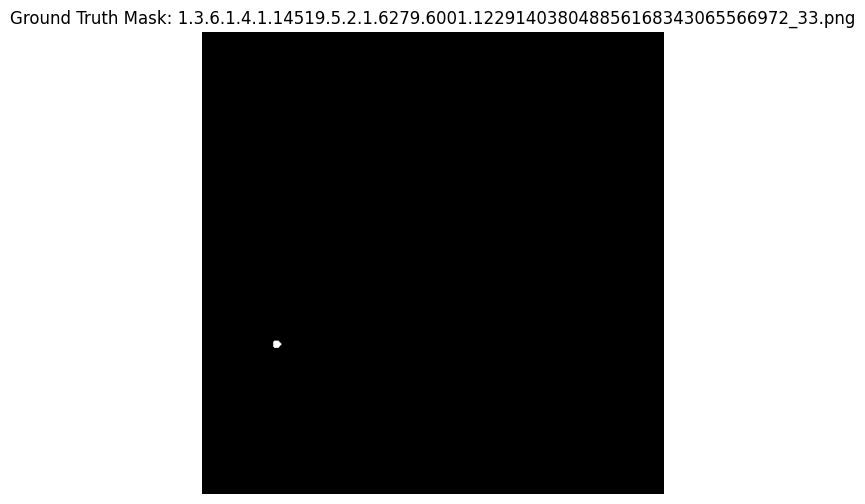

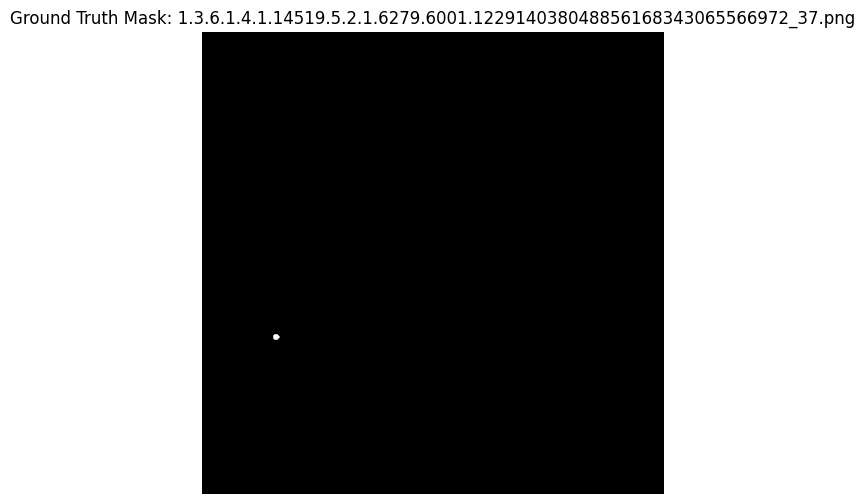

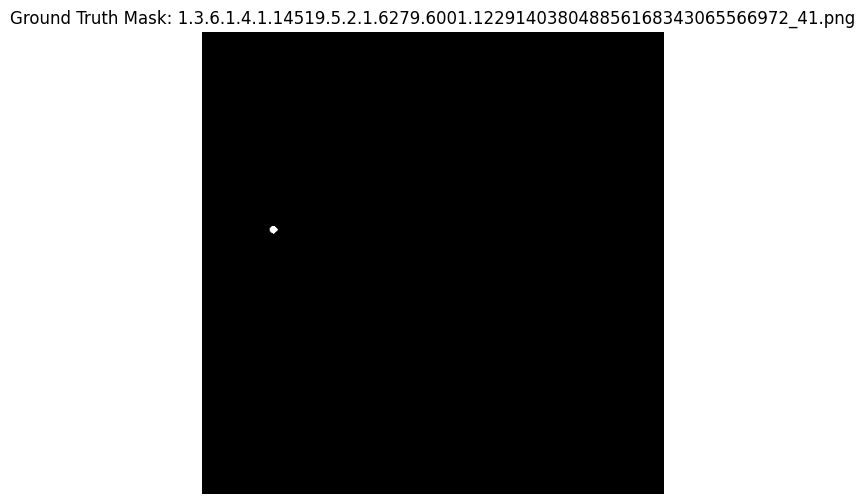

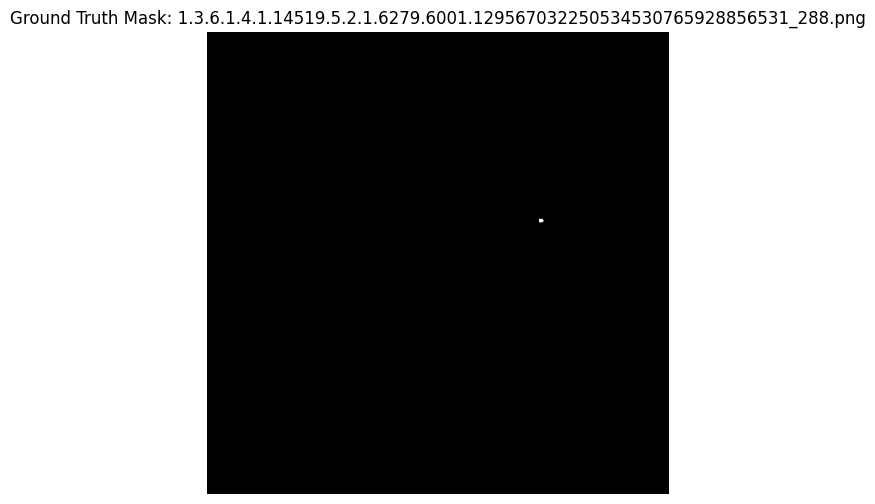

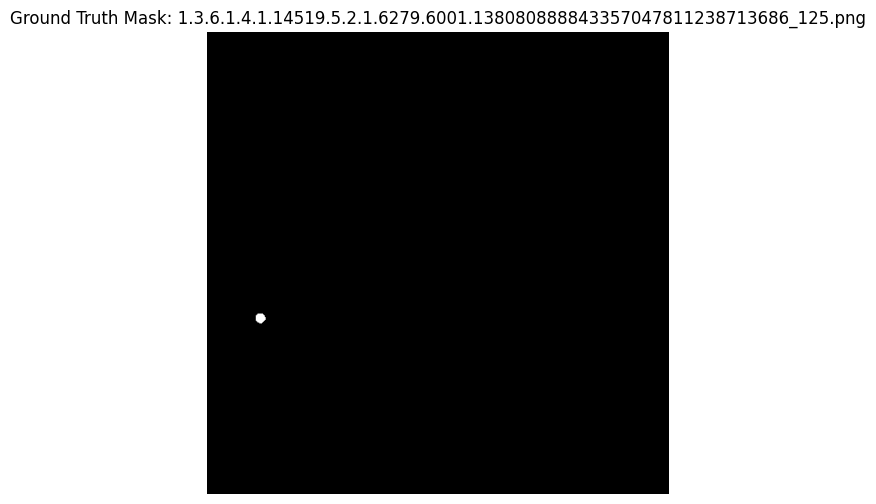

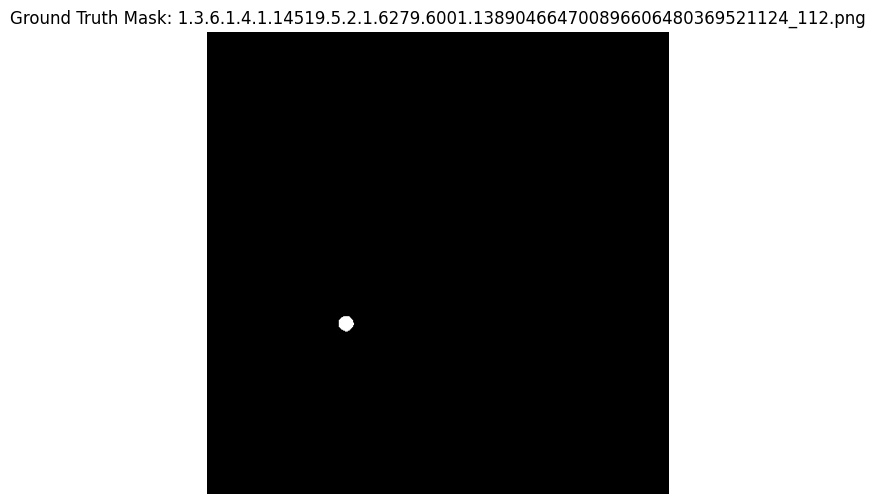

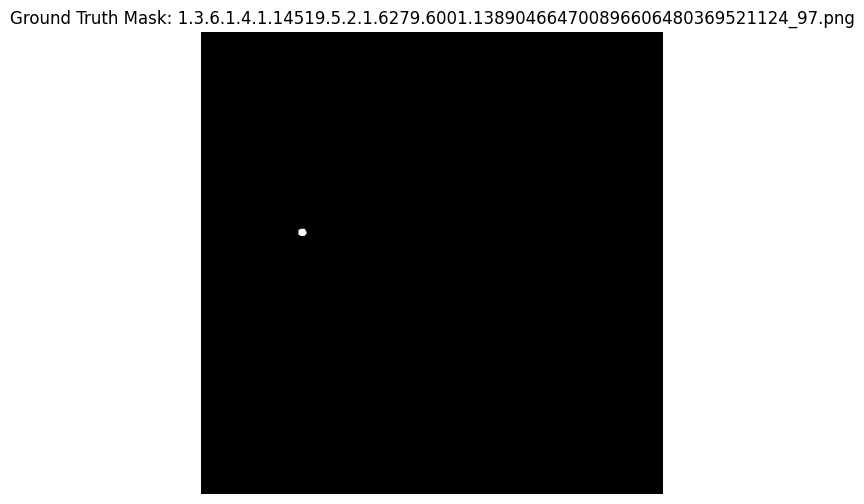

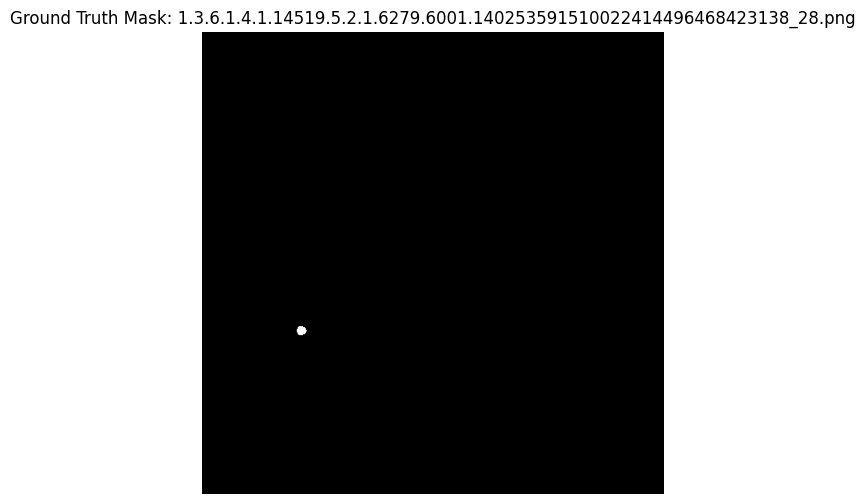

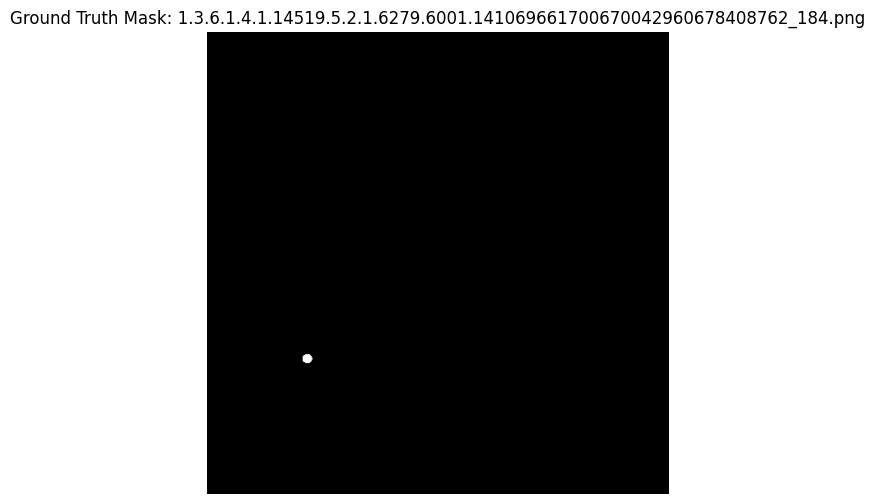

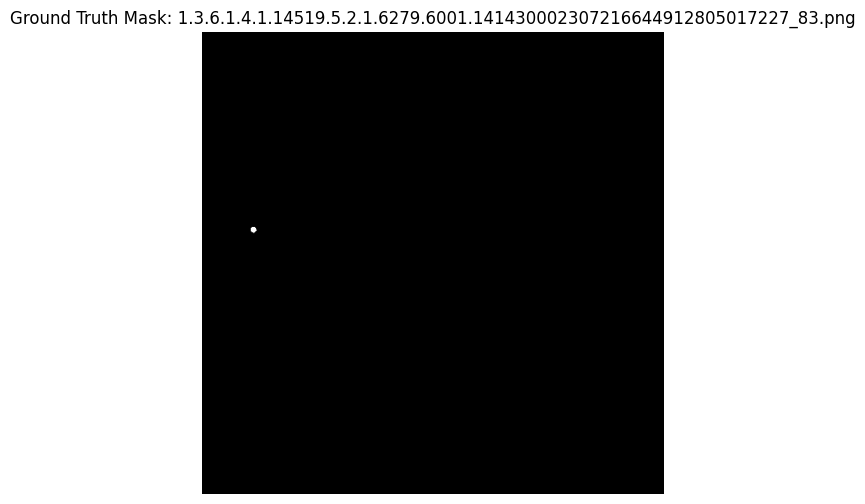

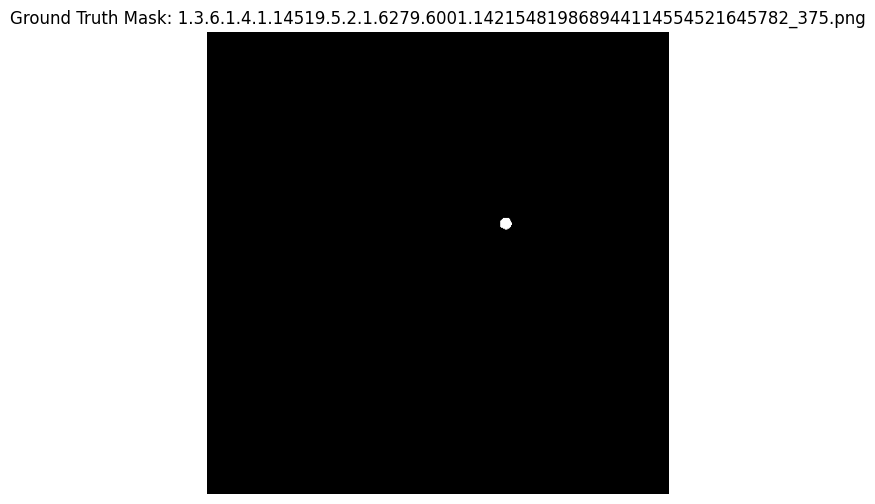

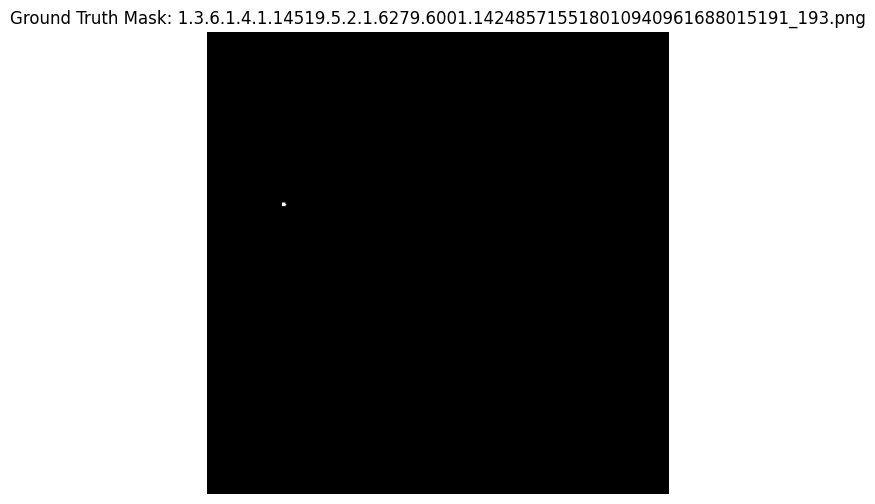

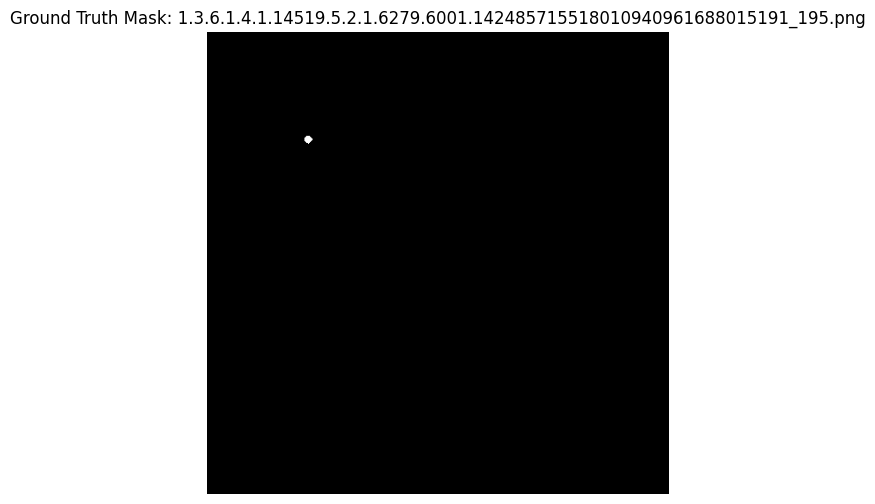

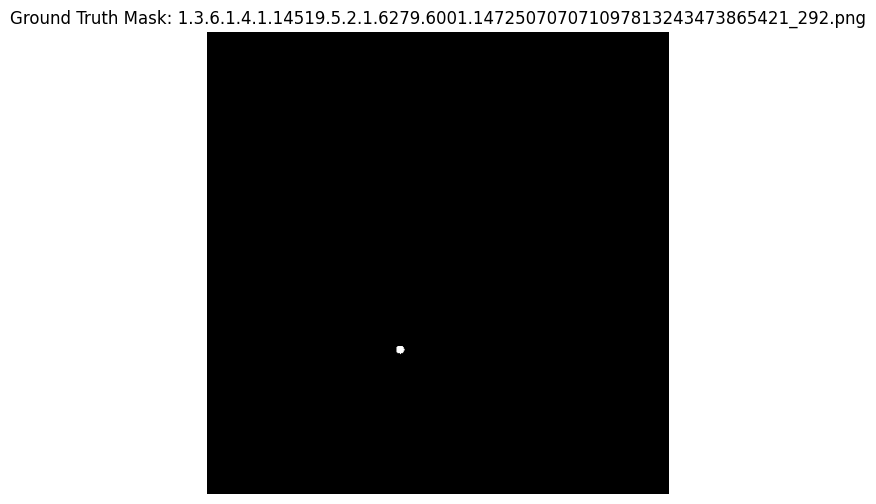

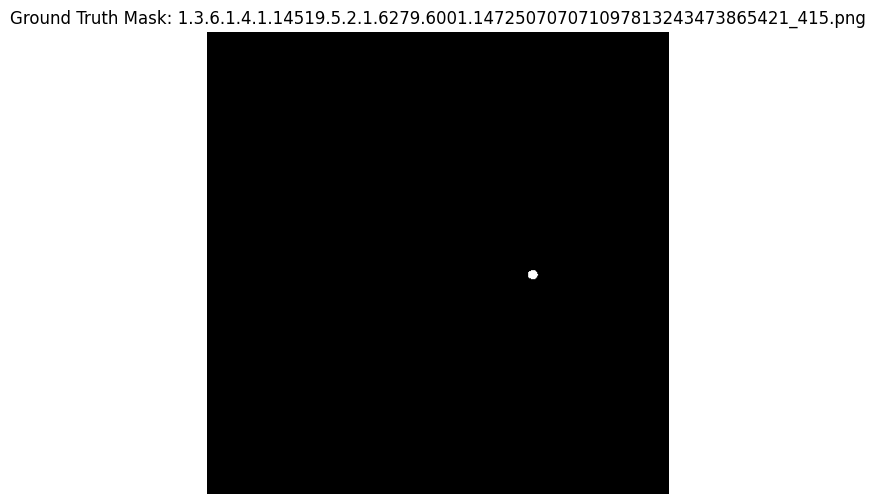

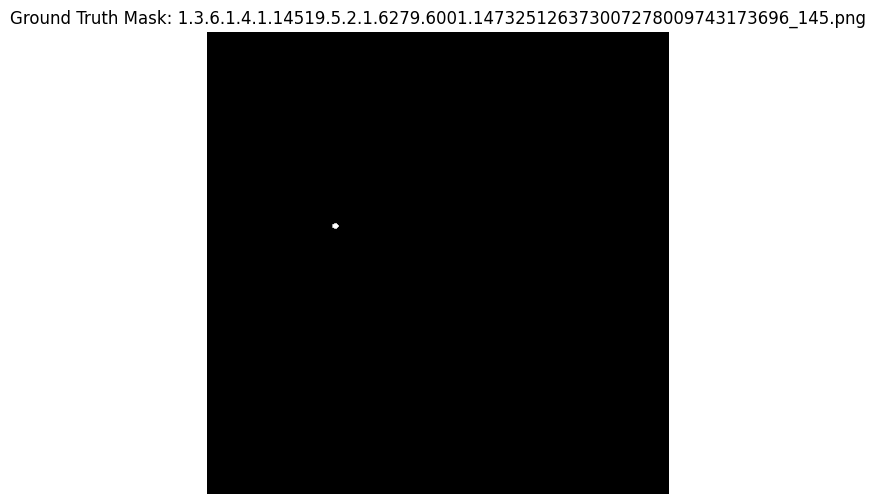

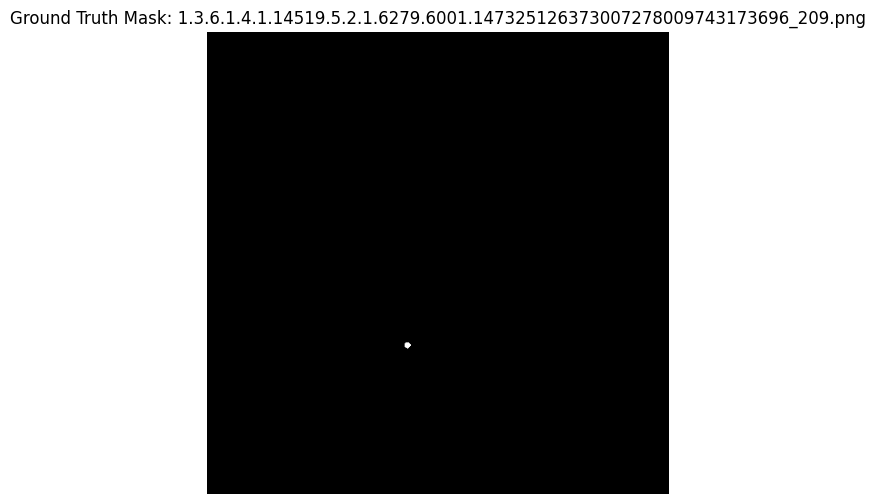

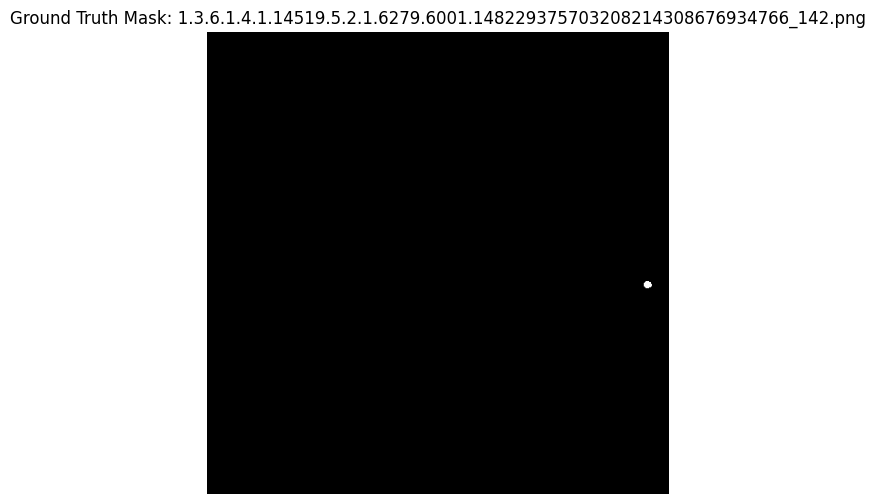

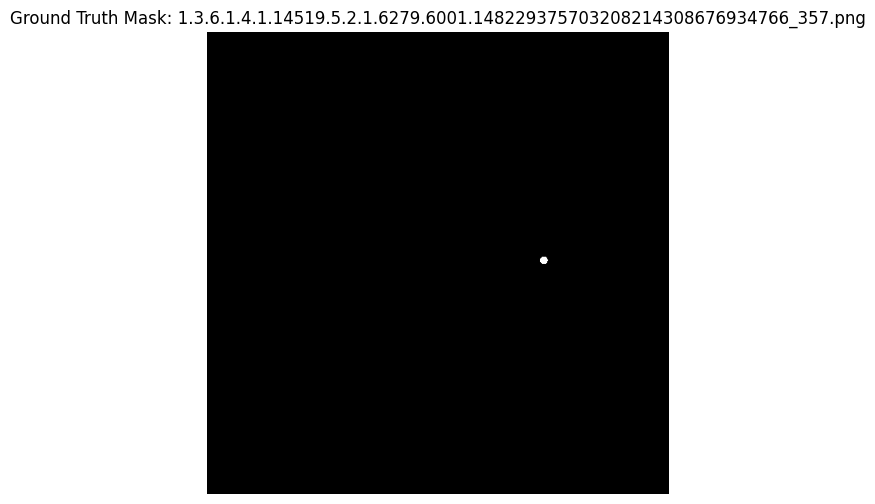

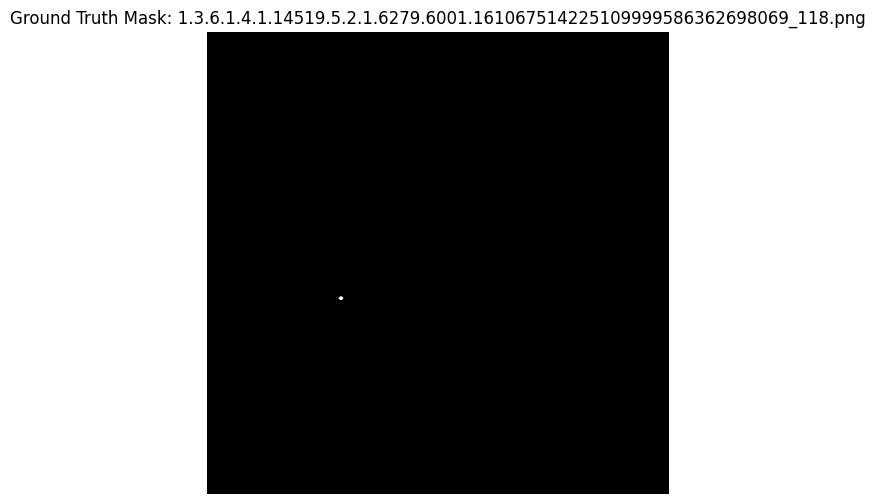

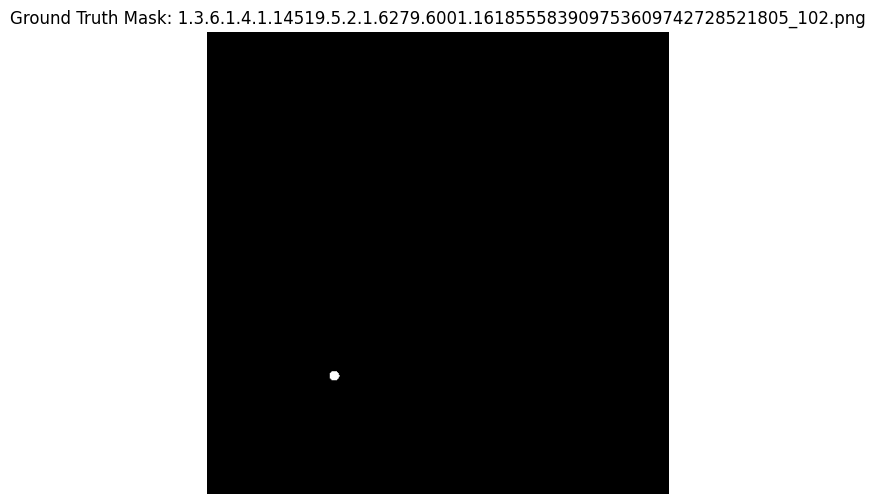

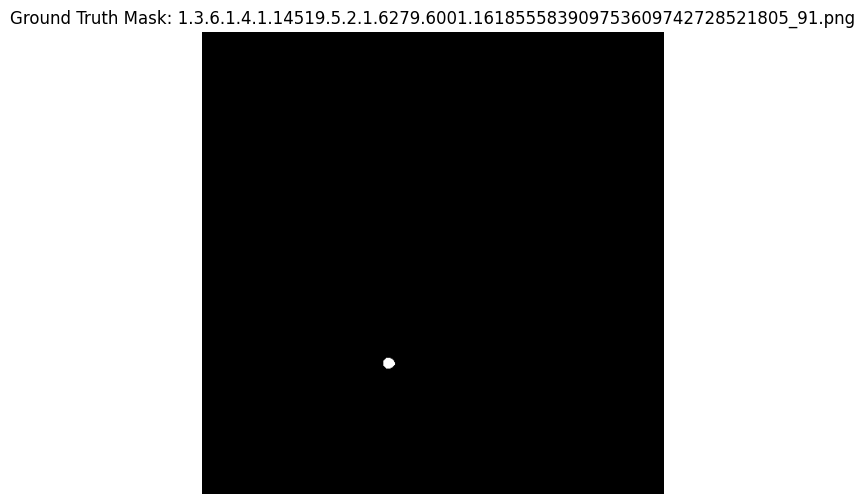

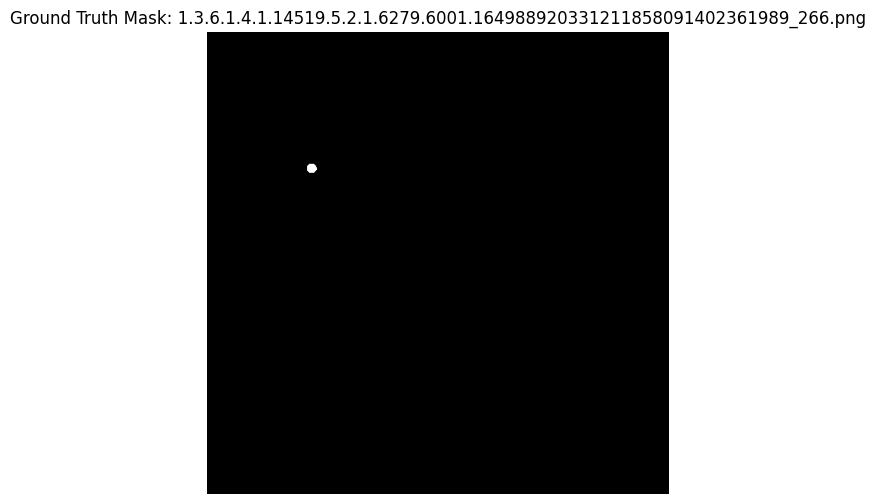

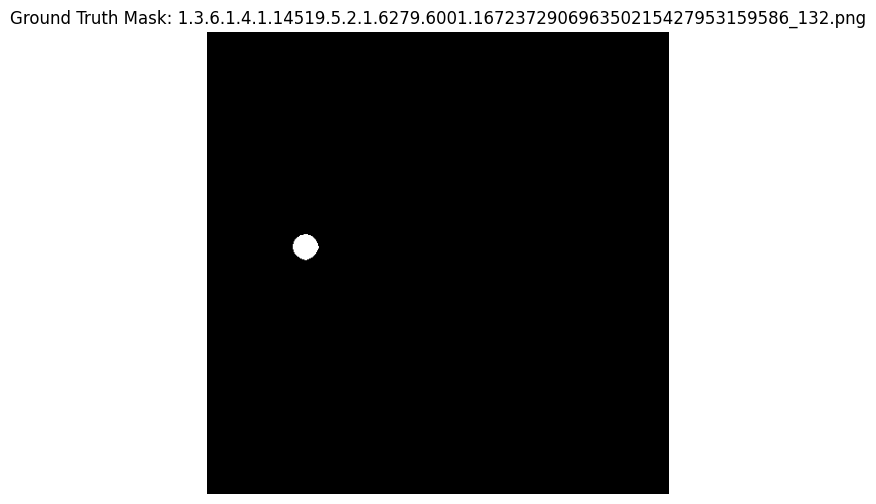

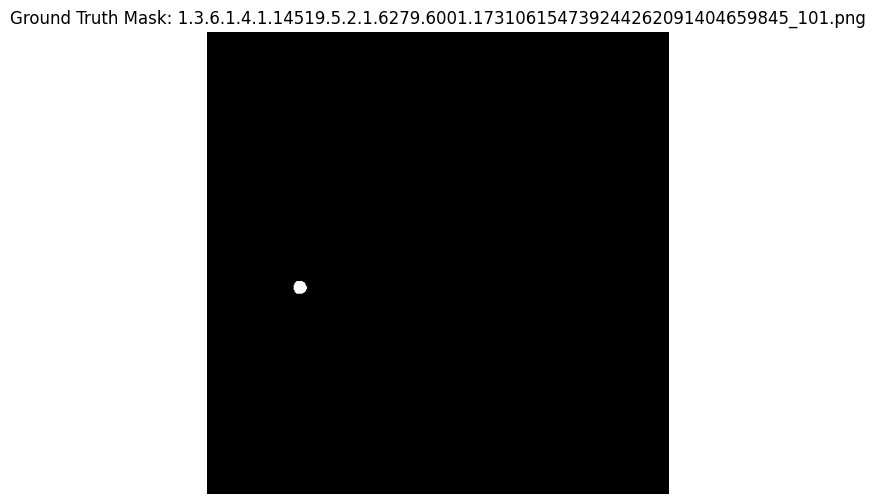

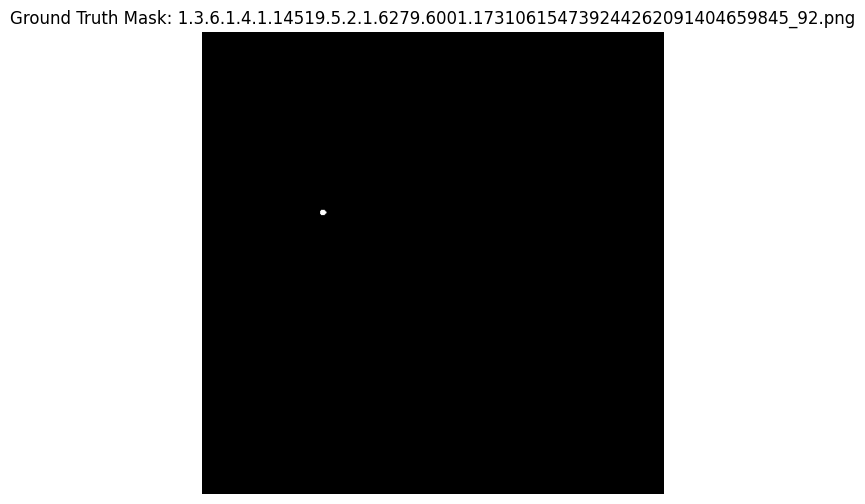

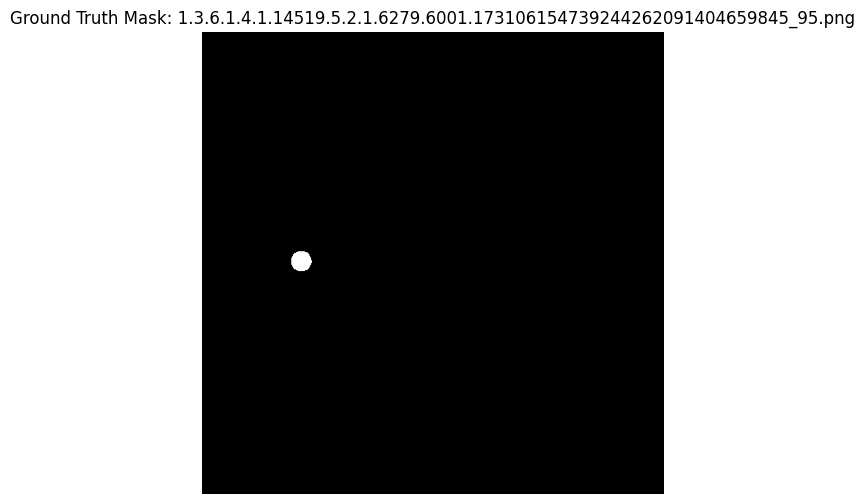

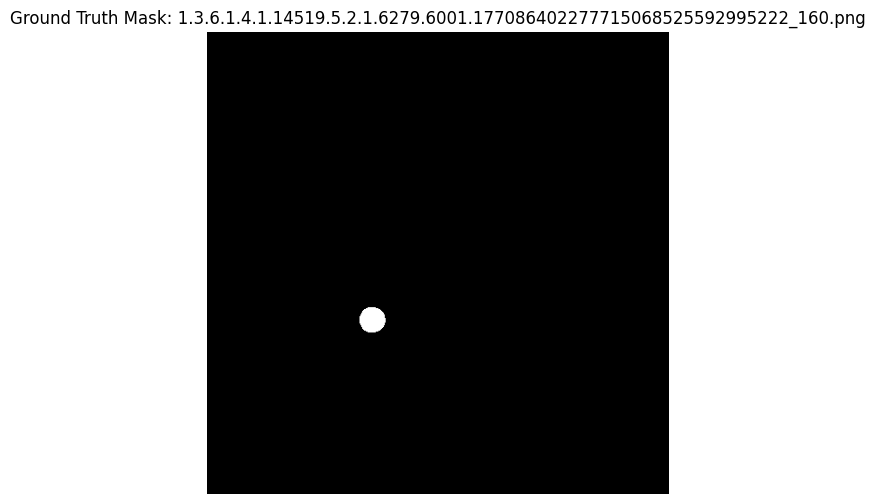

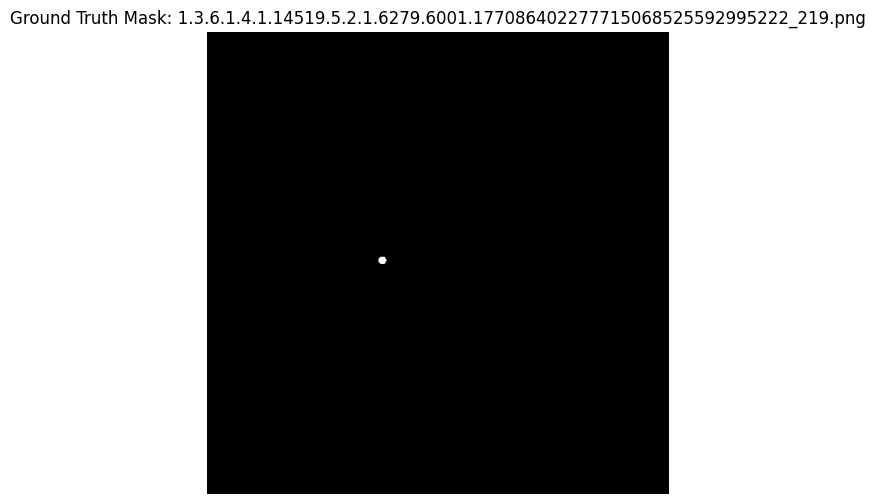

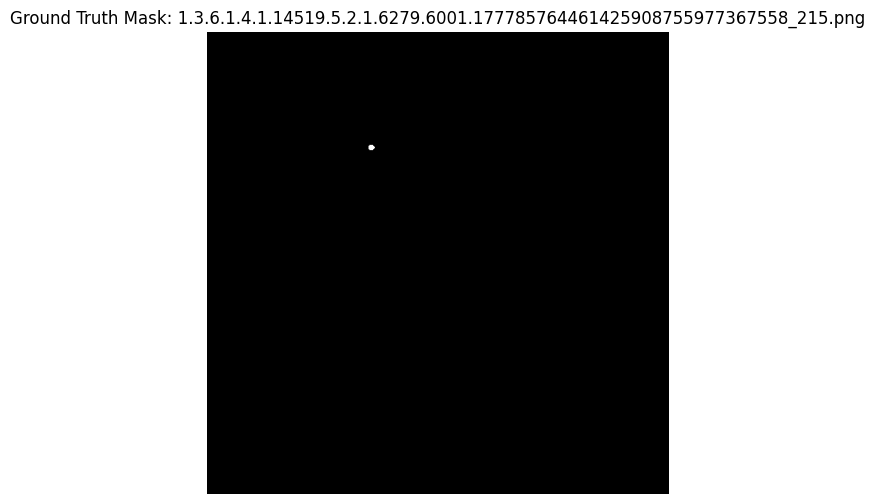

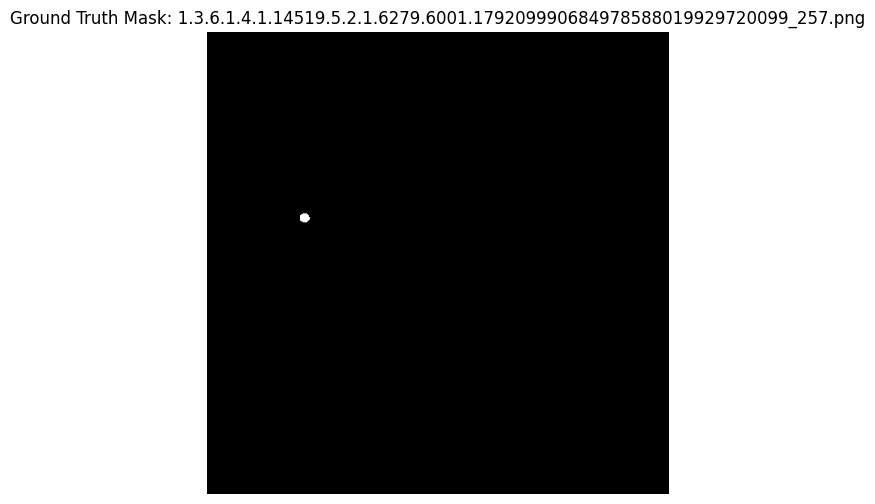

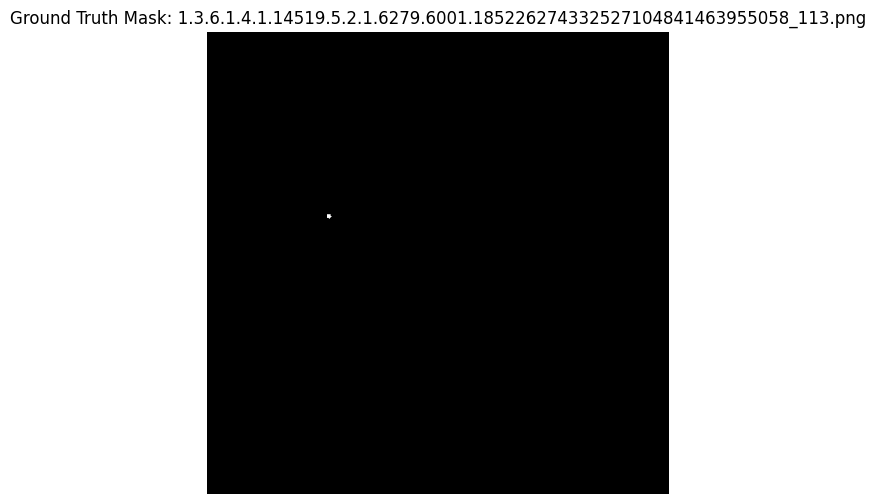

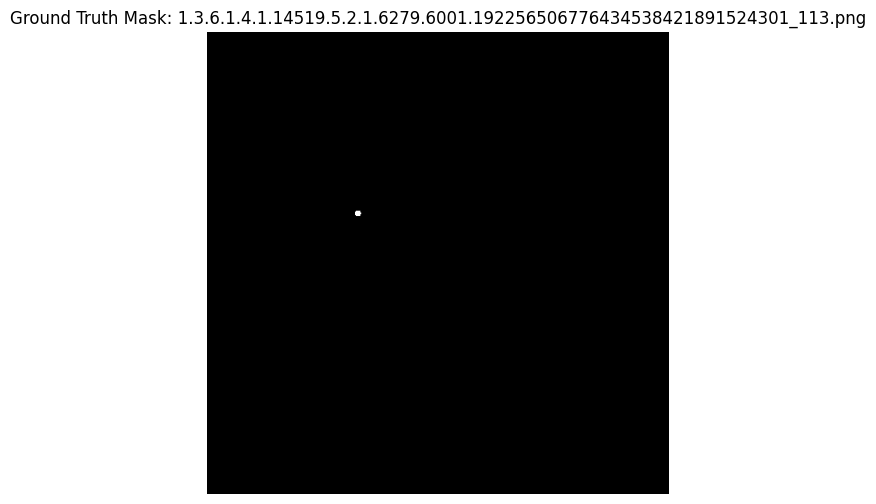

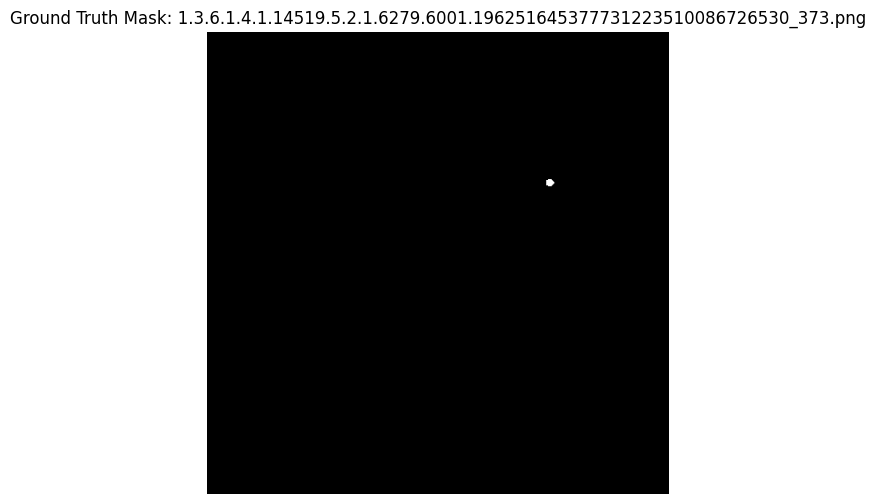

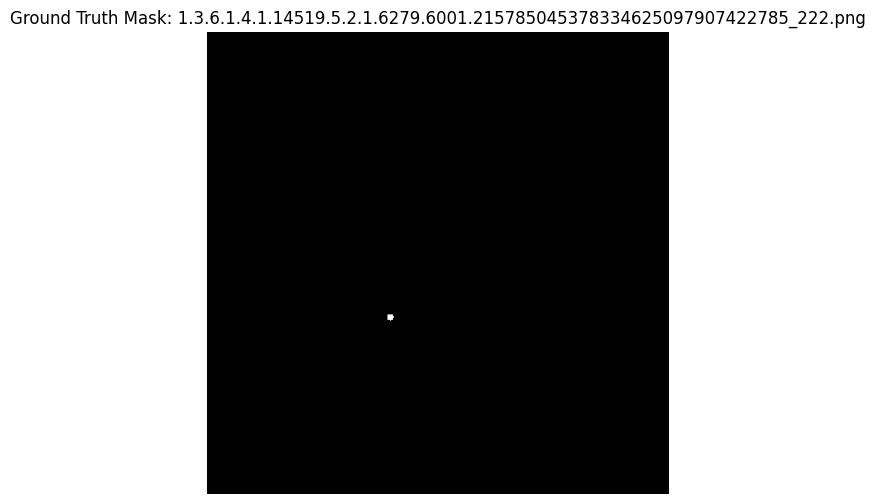

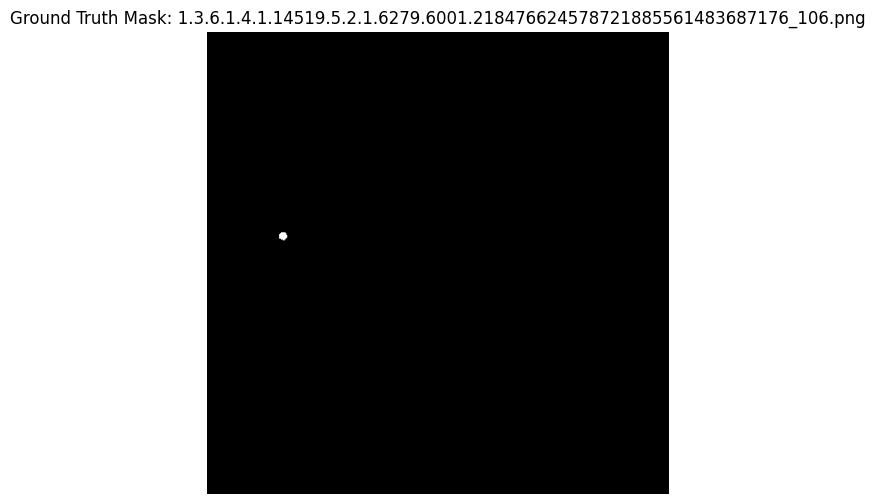

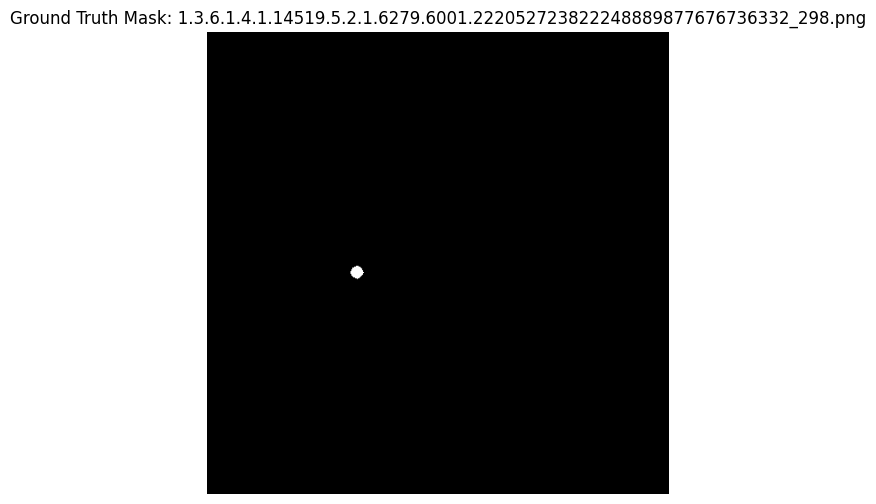

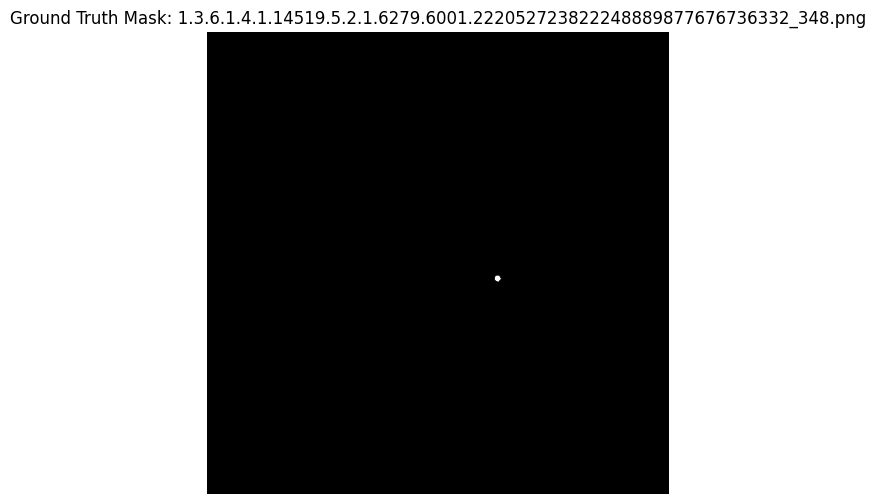

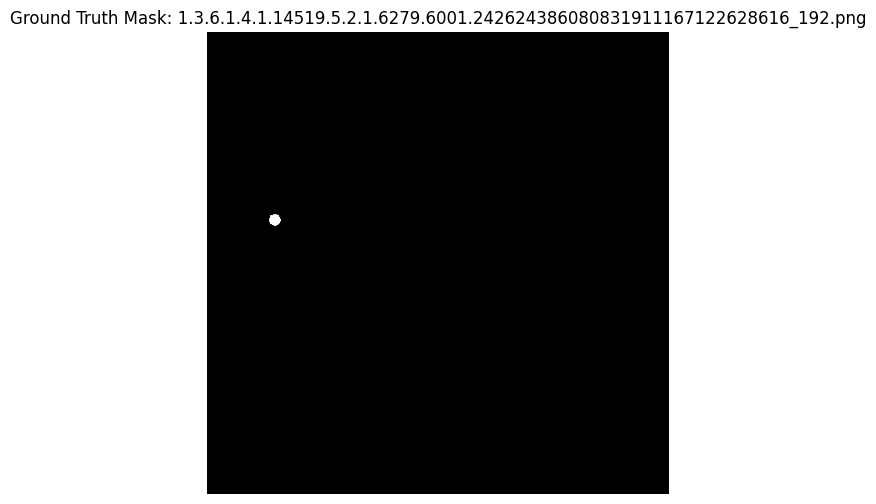

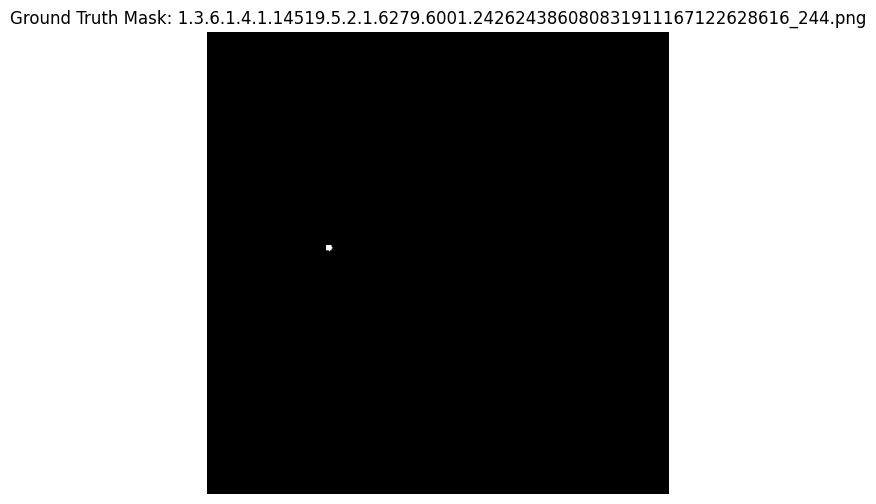

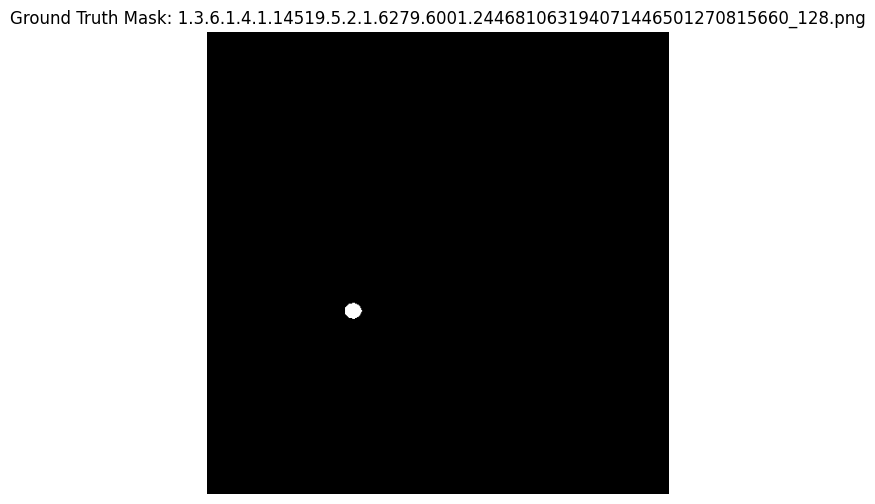

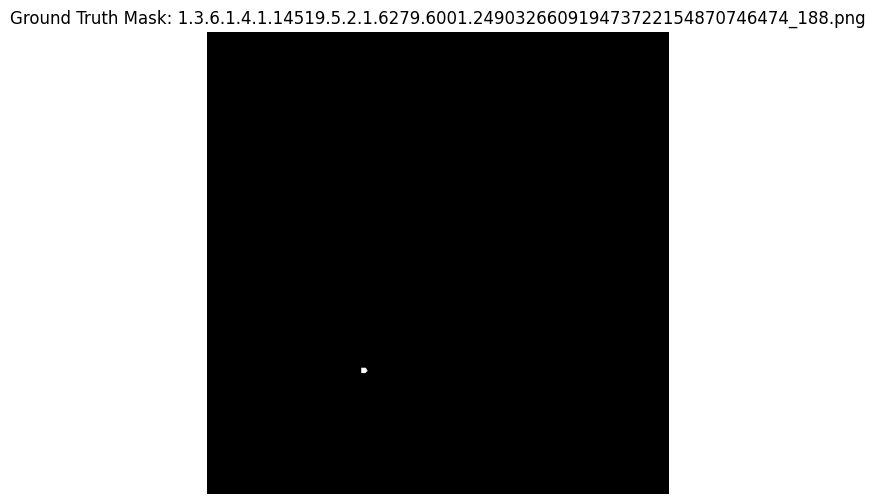

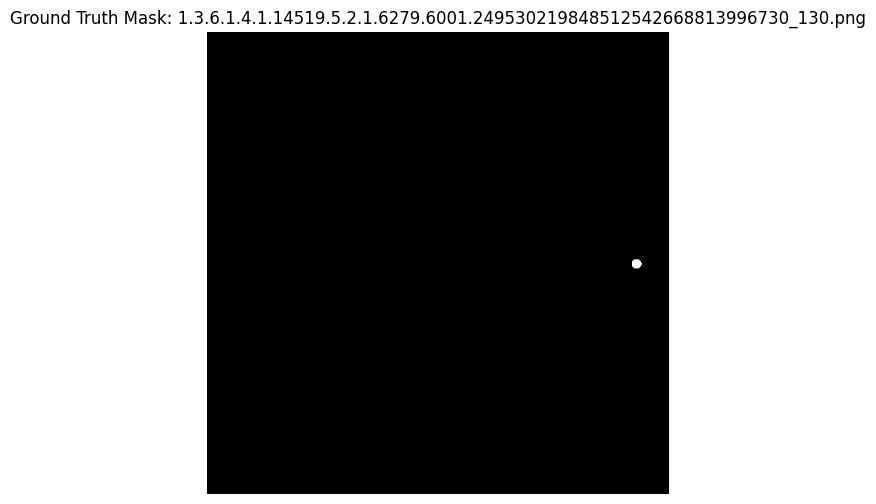

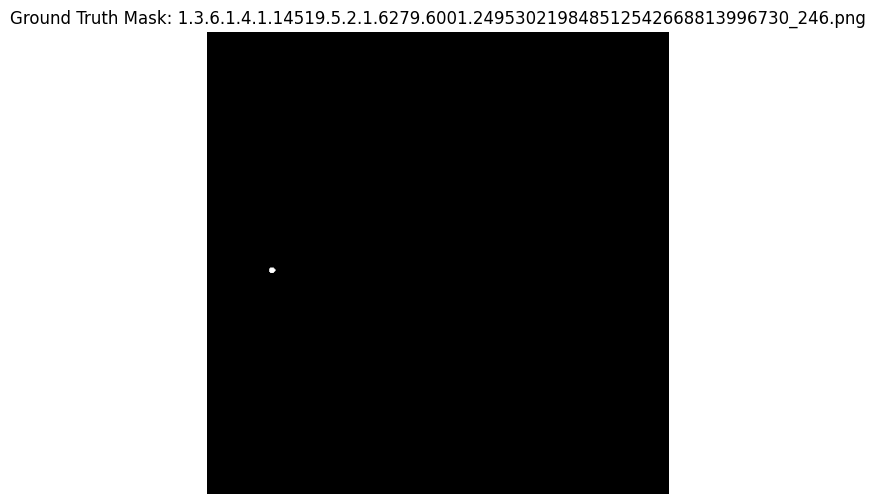

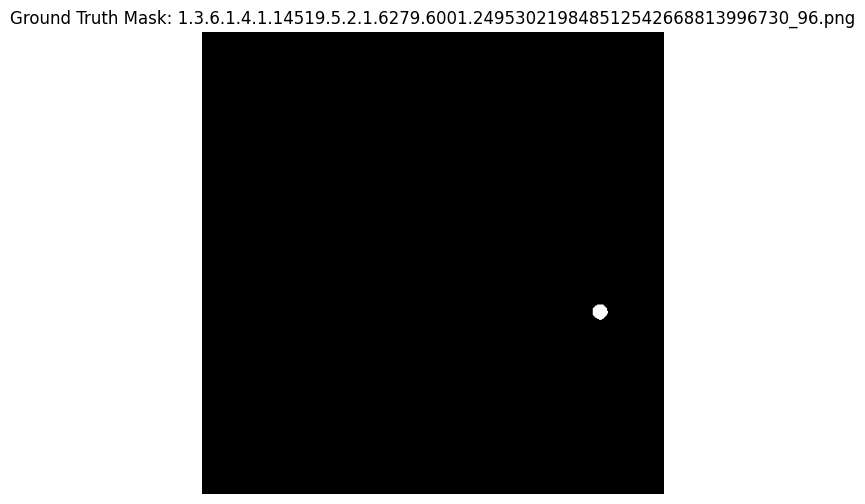

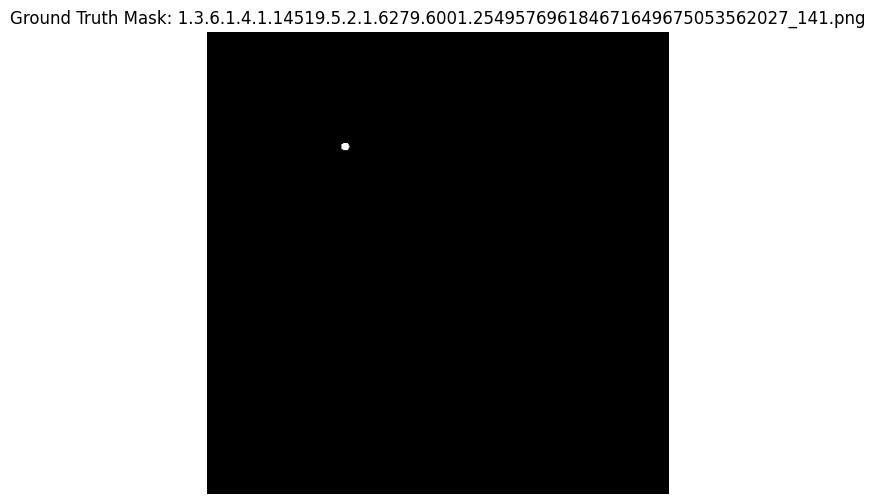

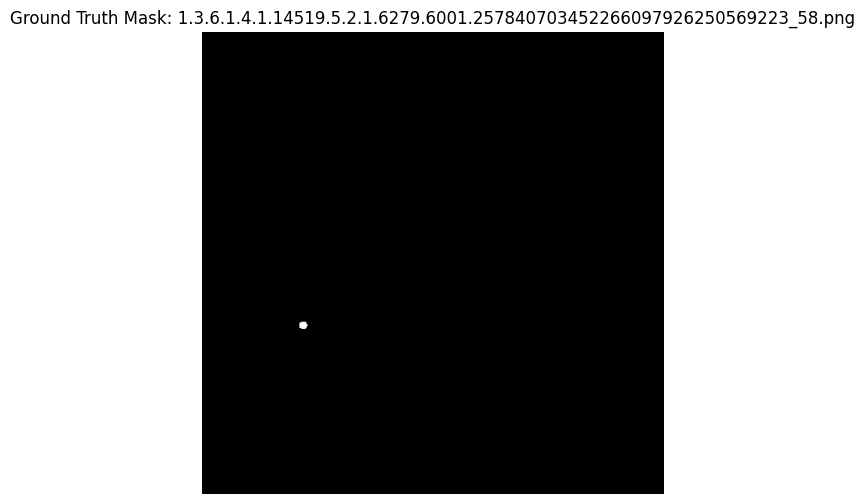

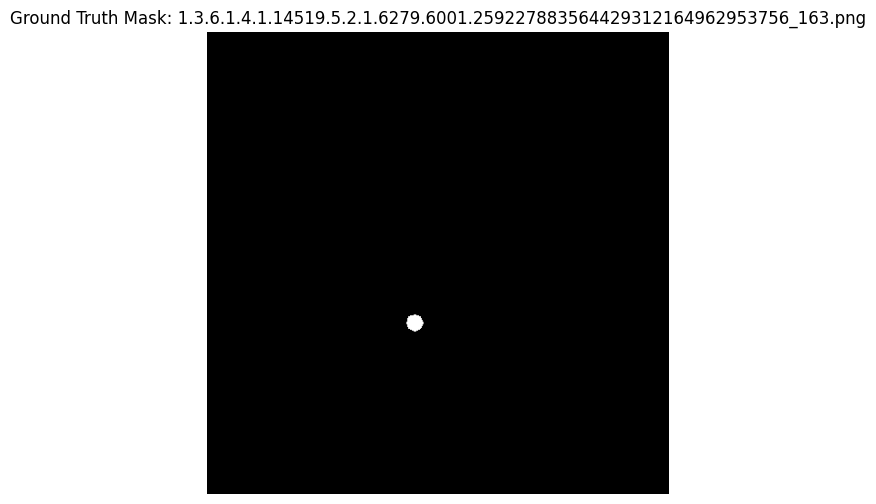

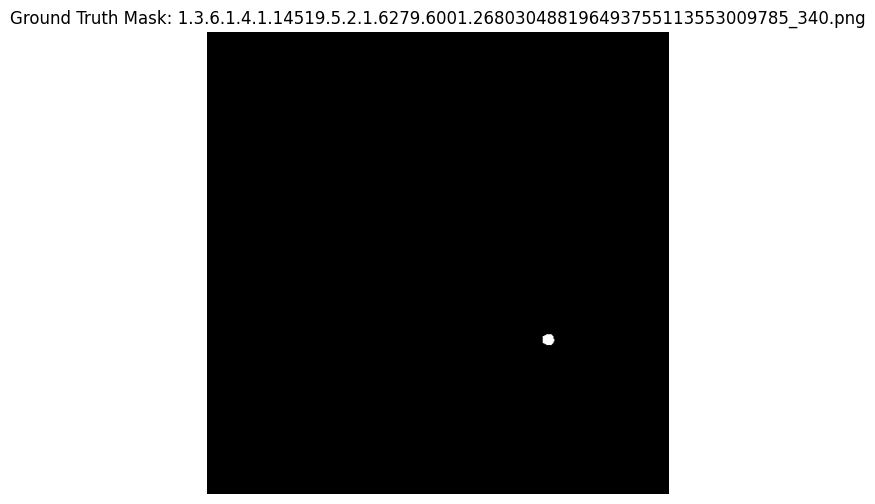

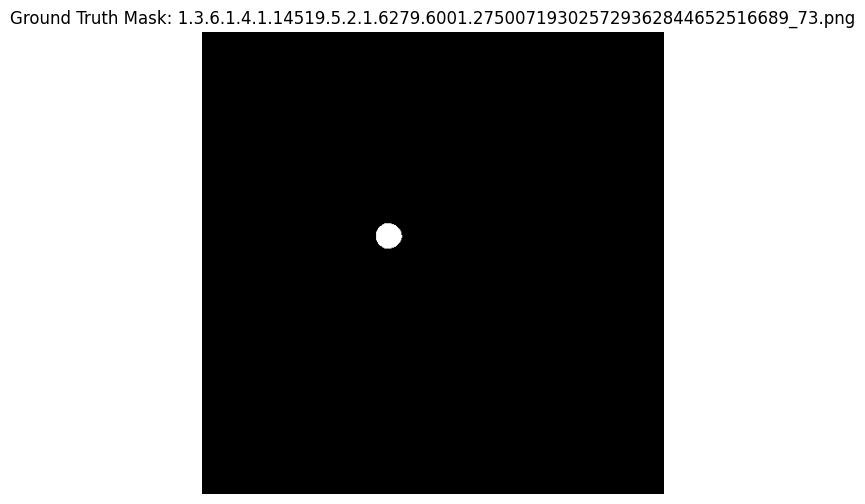

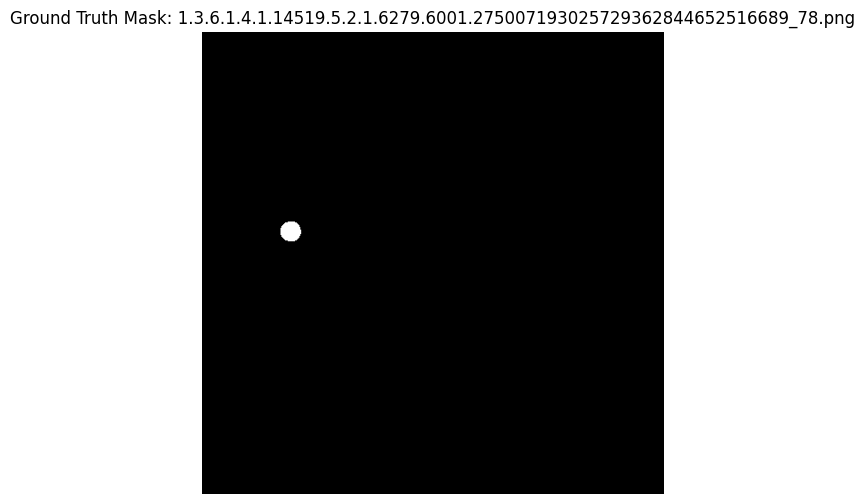

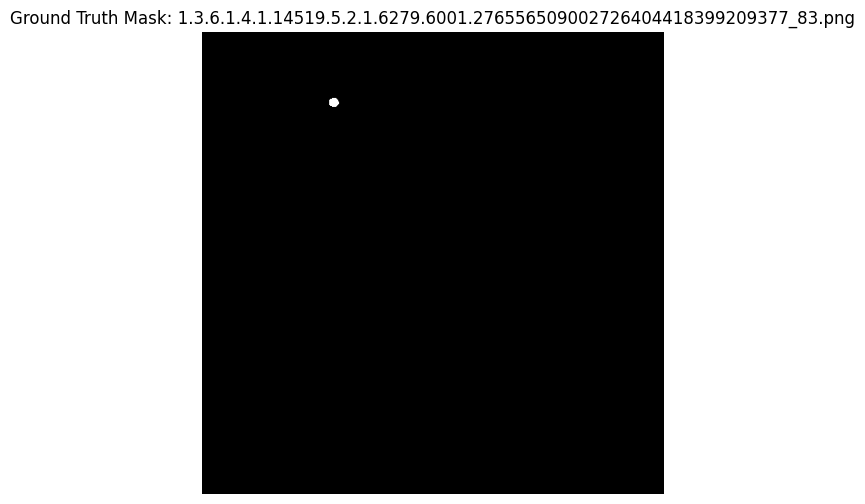

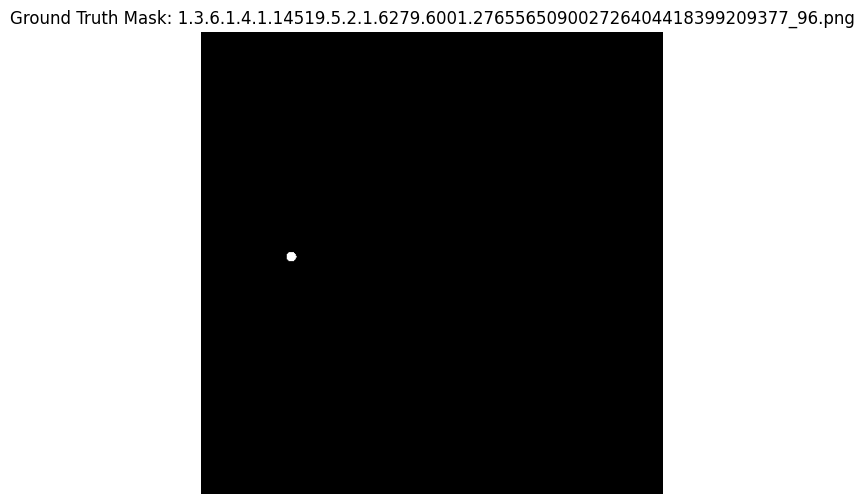

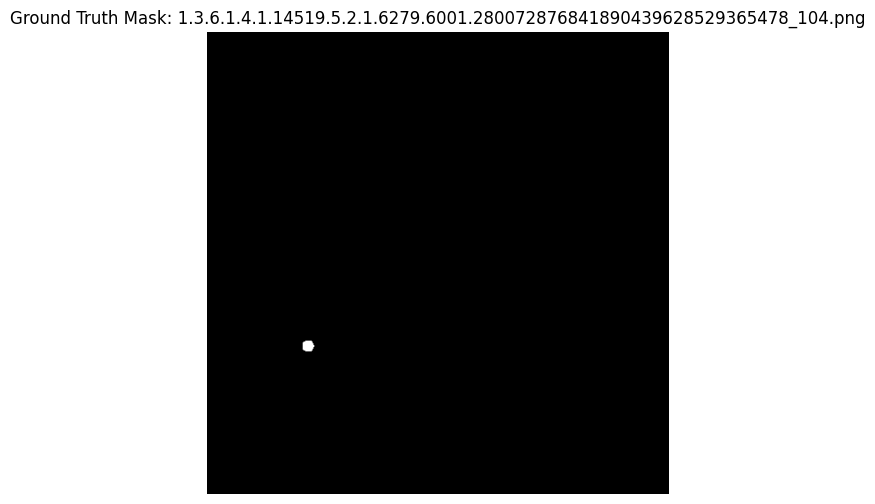

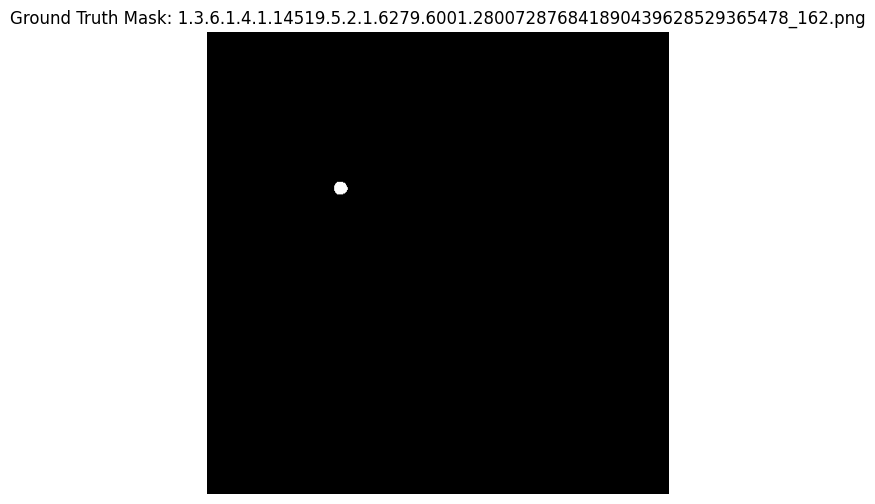

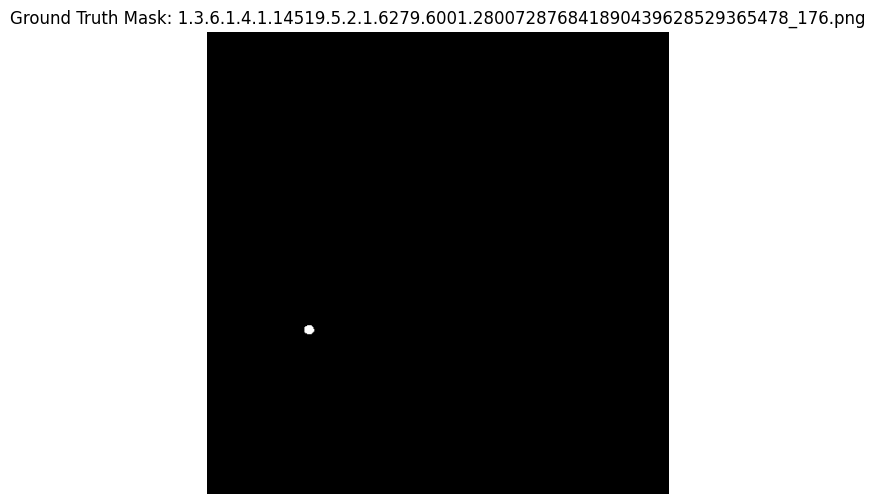

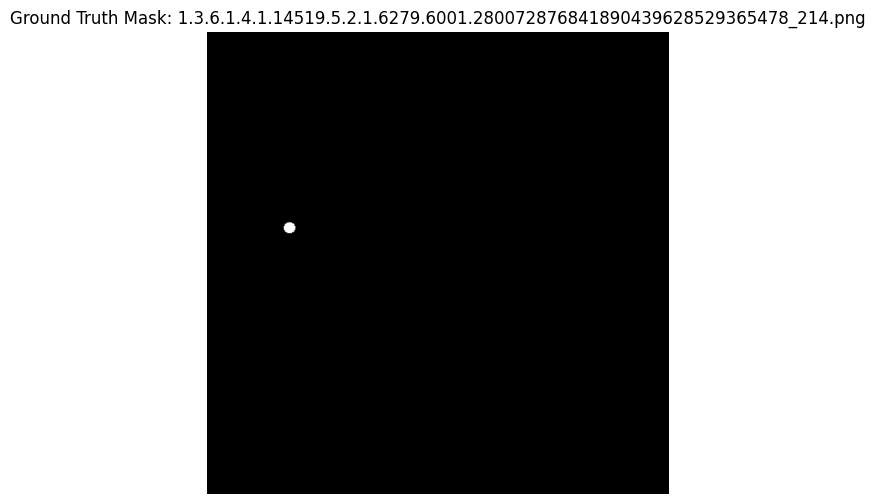

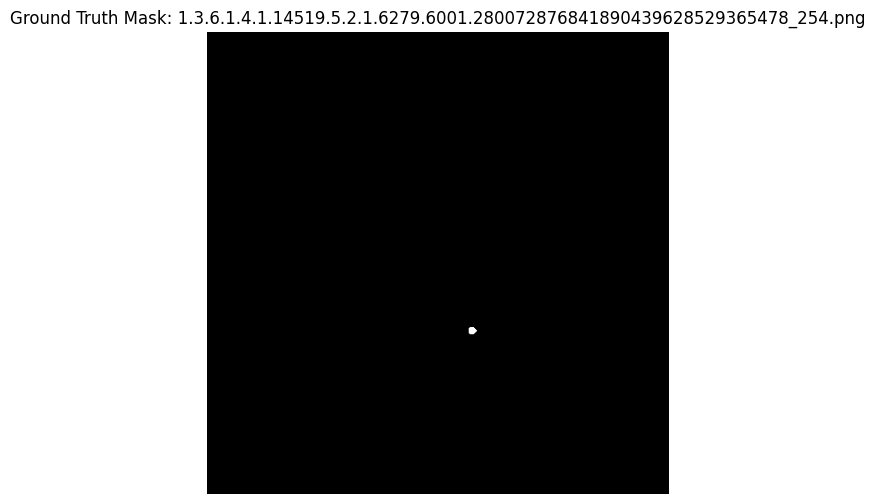

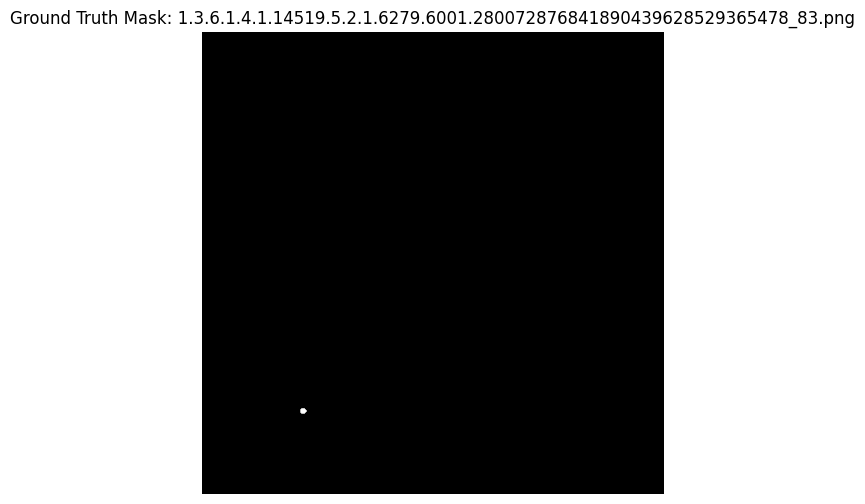

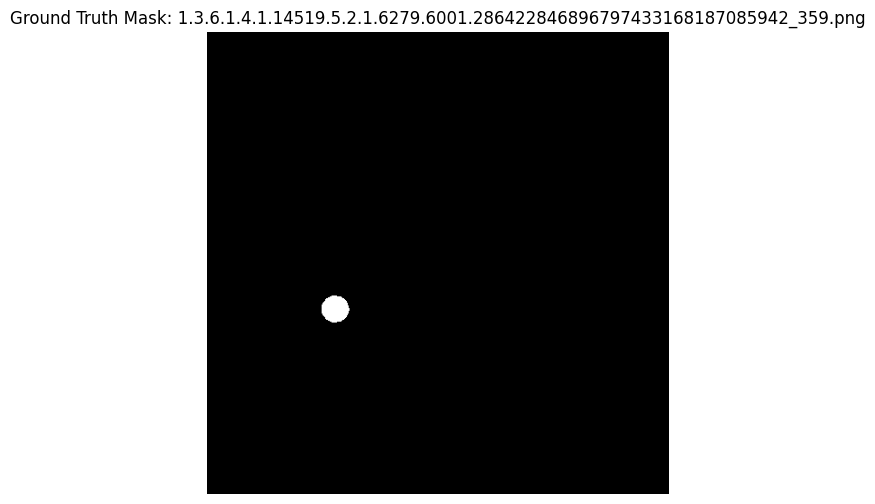

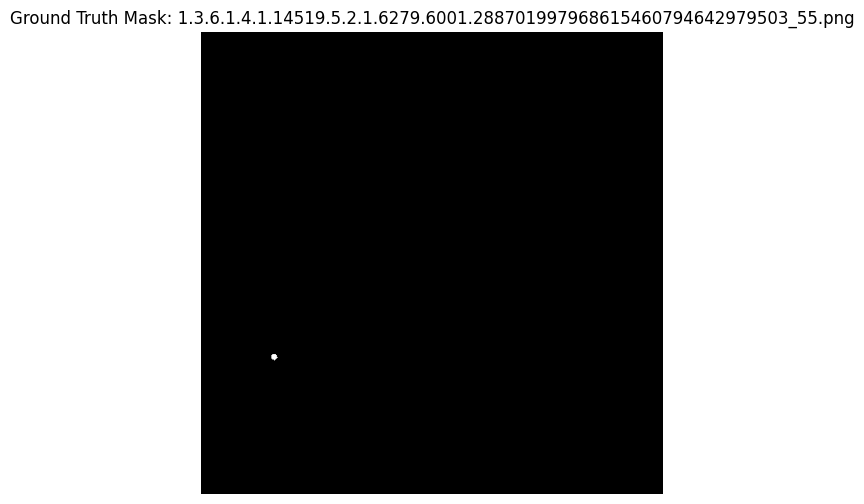

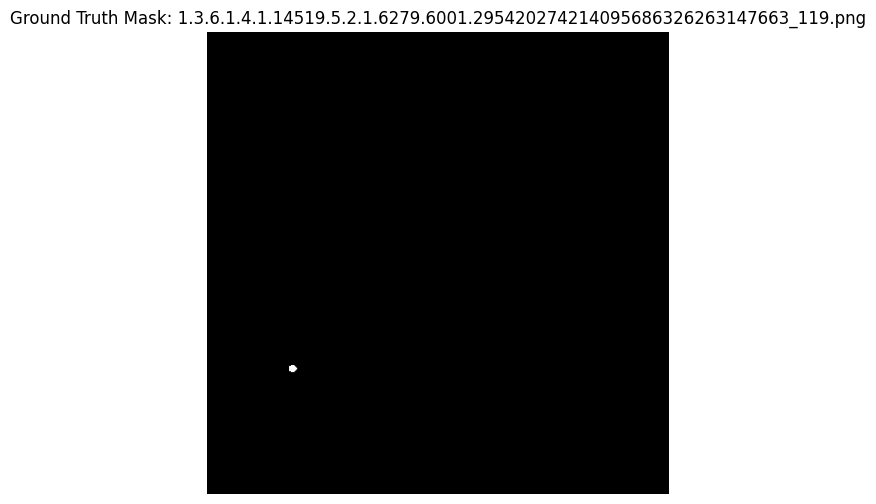

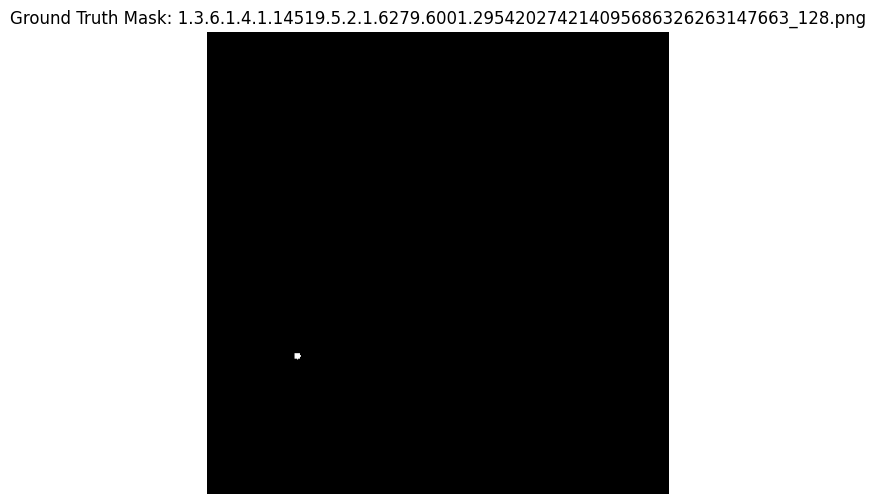

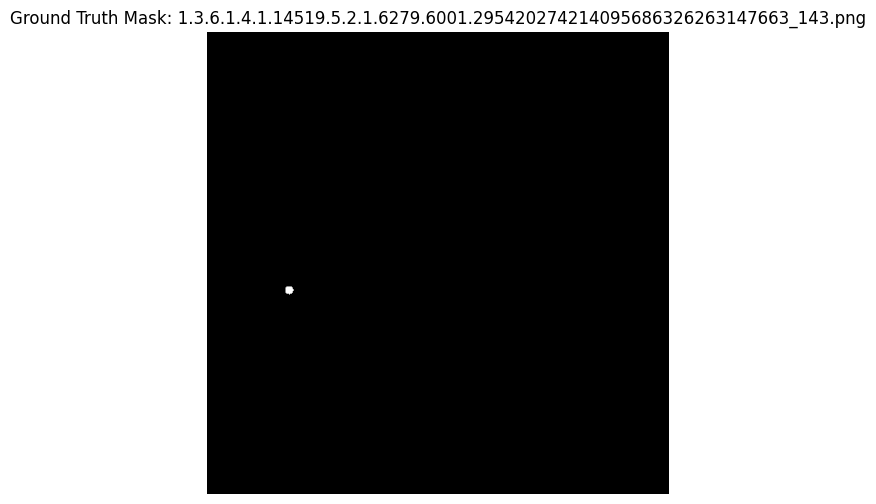

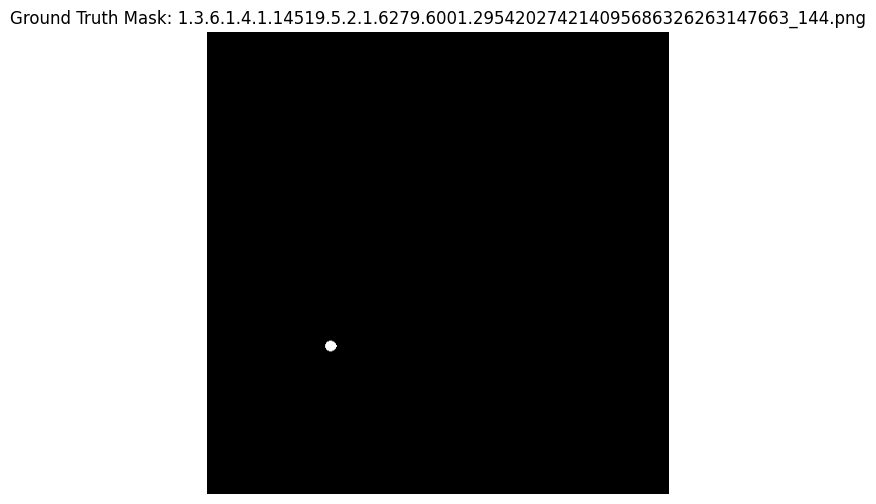

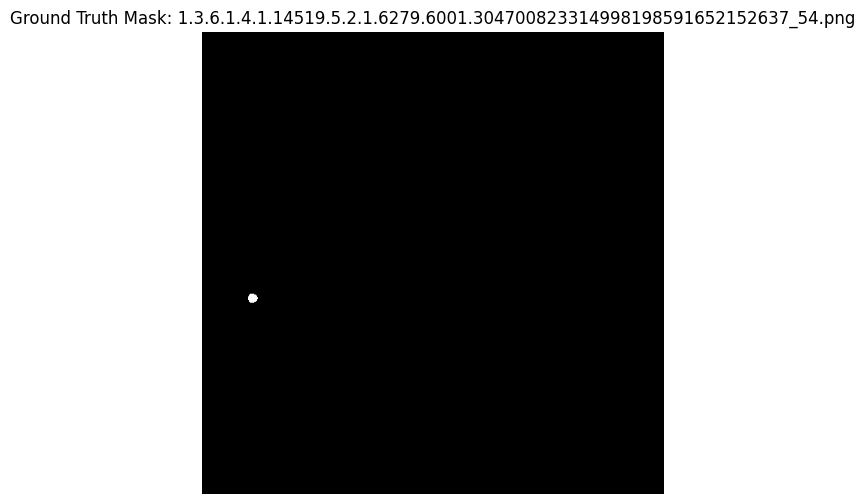

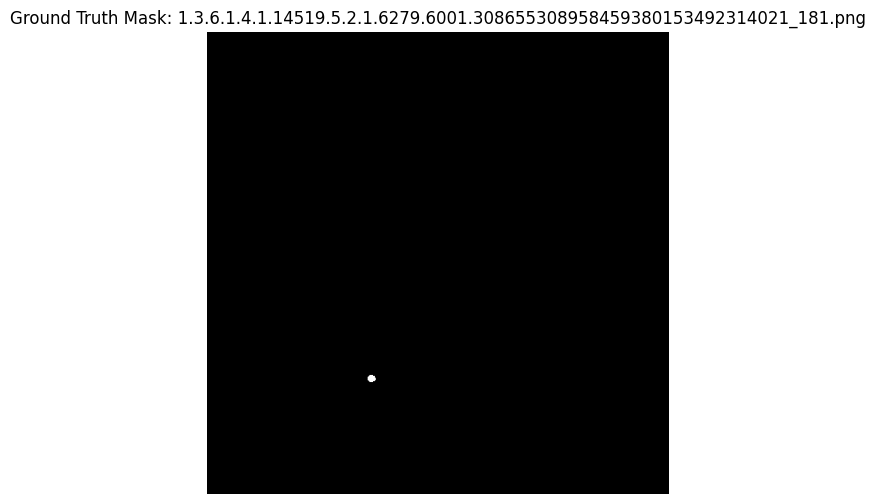

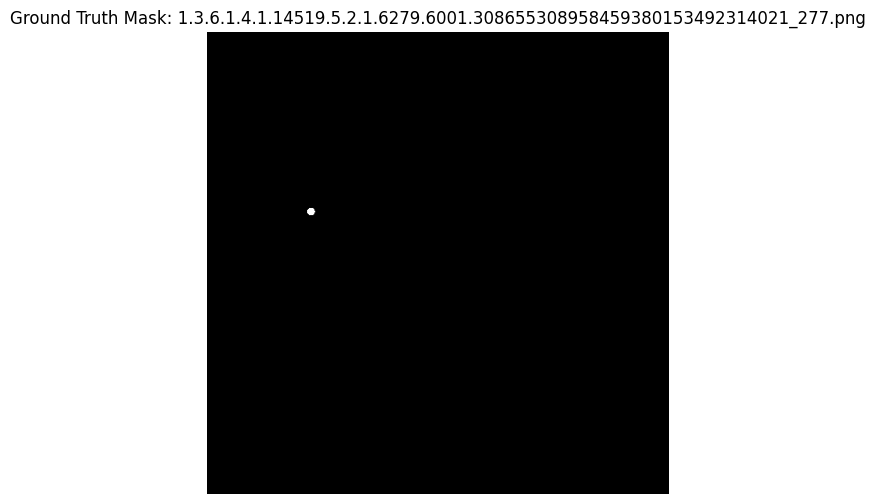

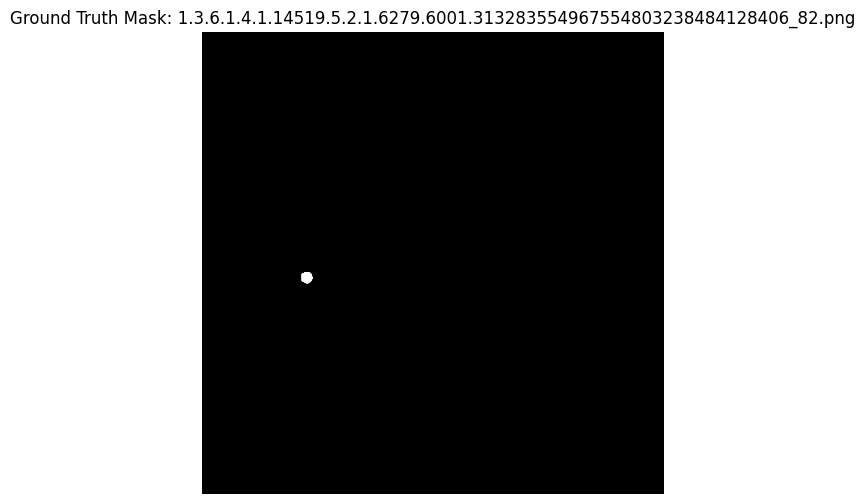

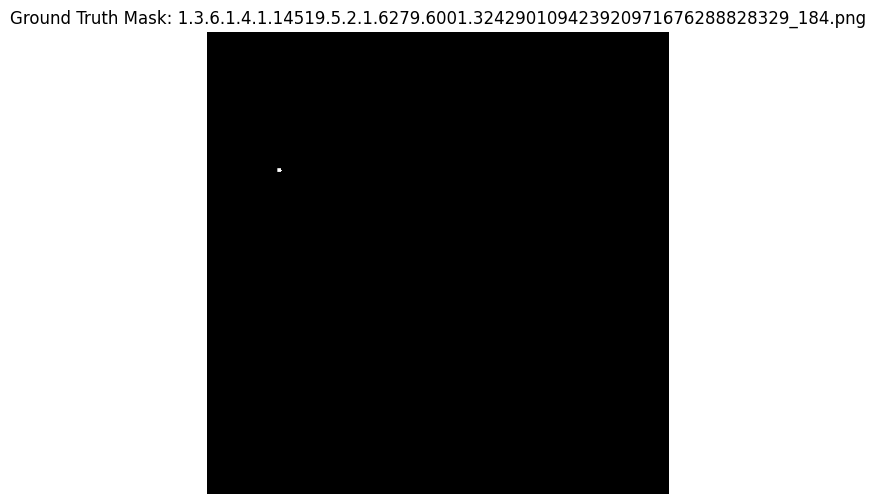

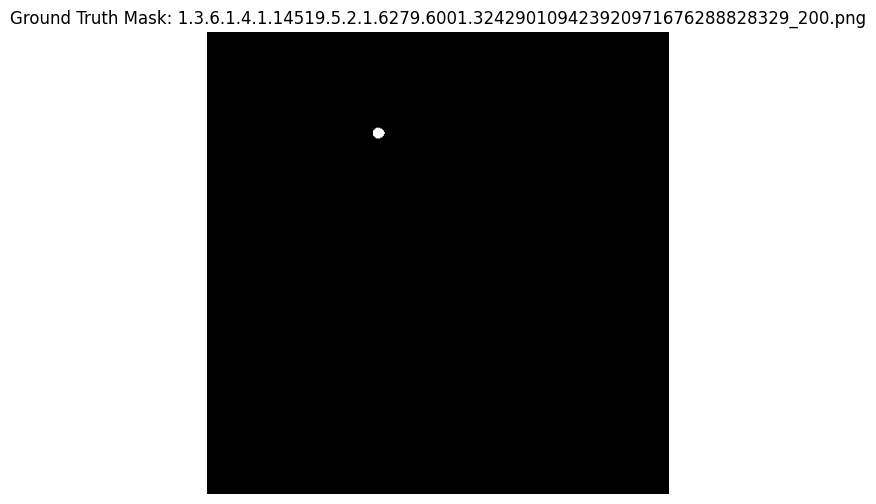

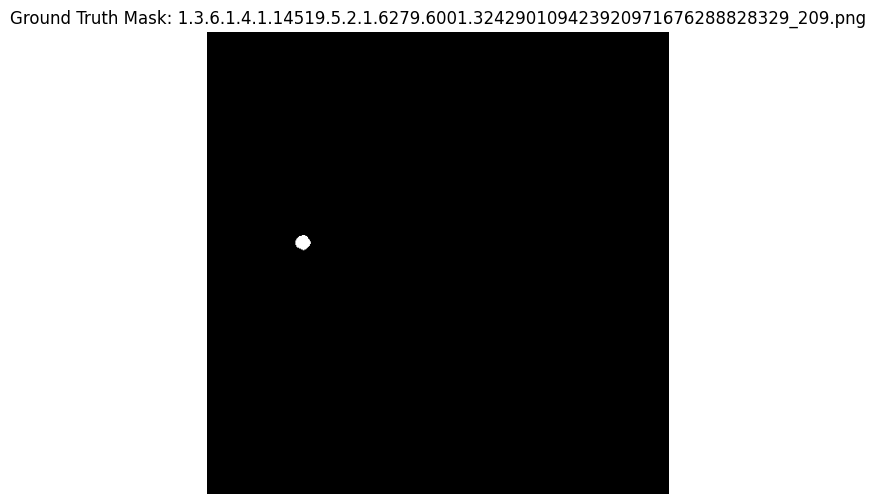

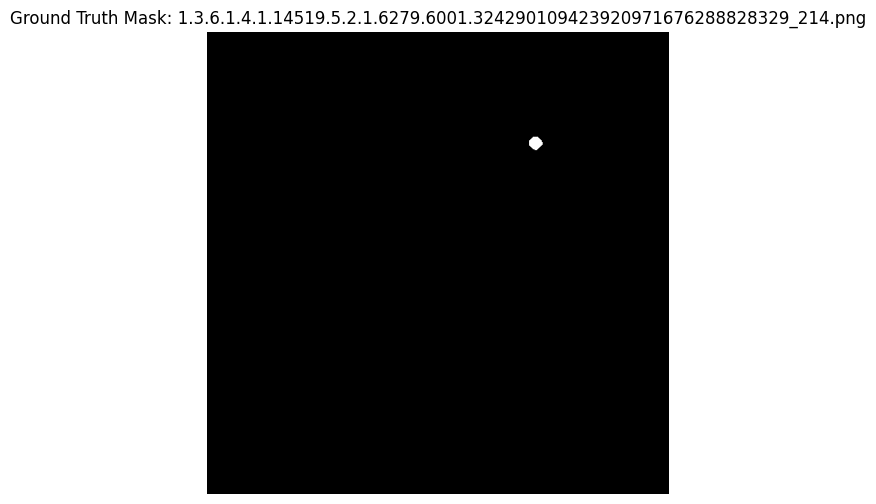

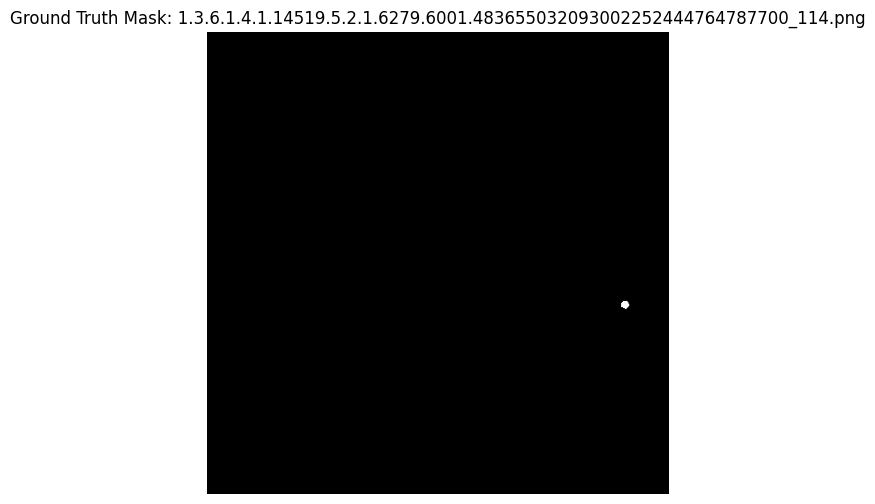

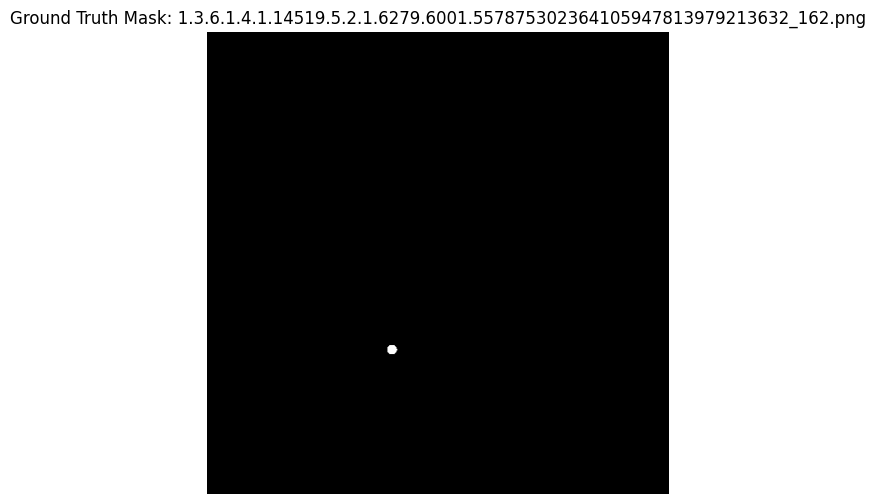

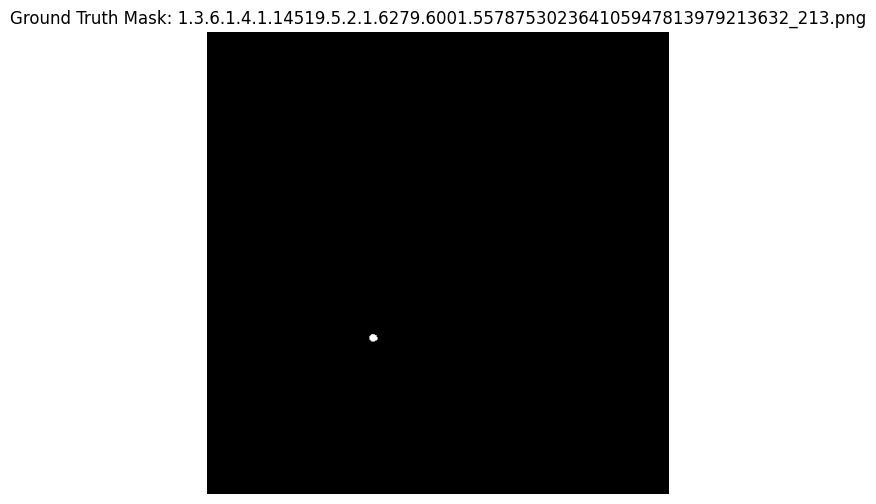

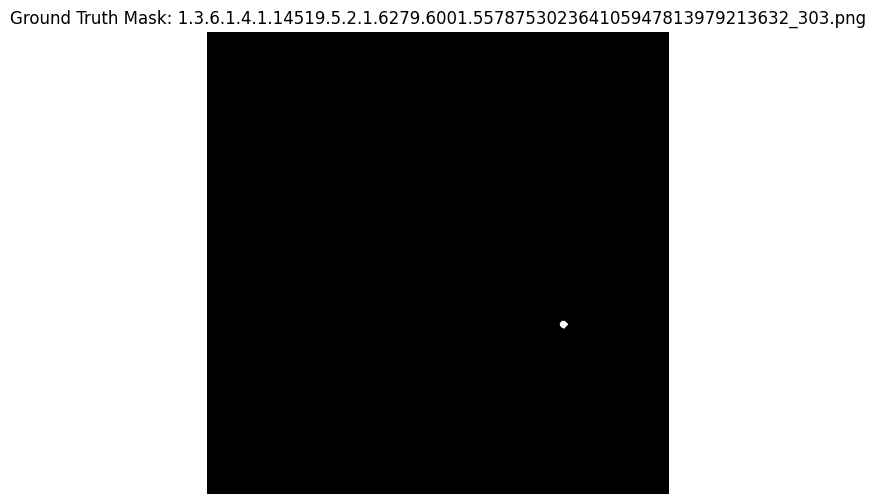

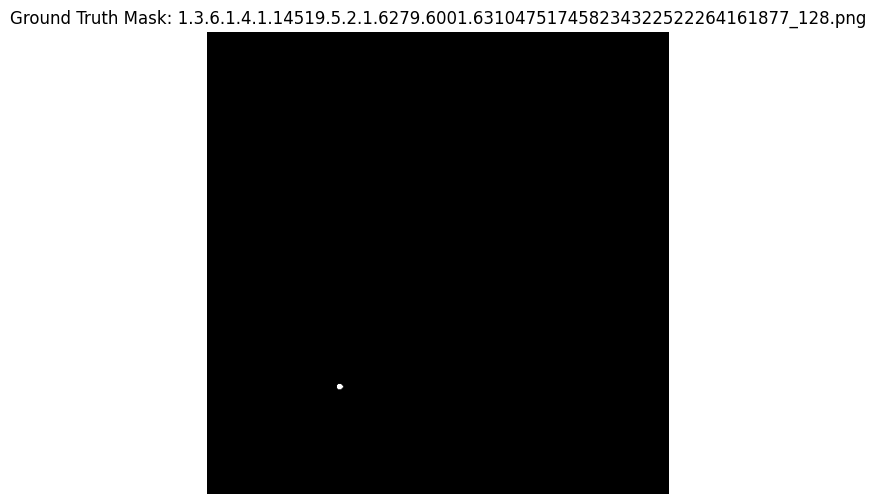

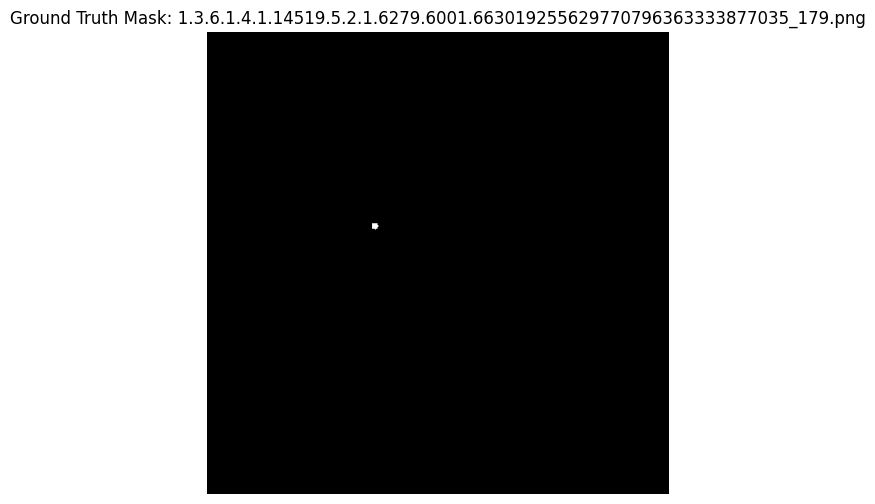

In [217]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def read_ground_truth_from_txt(labels_dir, image_filename, mask_shape):
    label_filename = os.path.splitext(image_filename)[0] + '.txt'
    label_path = os.path.join(labels_dir, label_filename)

    if not os.path.exists(label_path):
        print(f"Warning: Ground truth file {label_filename} not found.")
        return None

    mask = np.zeros(mask_shape, dtype=np.uint8)
    with open(label_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            try:
                # Split the line into numbers and skip the first one (class label)
                coords = list(map(float, line.split()))[1:]
                
                if len(coords) % 2 != 0:
                    coords = coords[:-1]  # Remove last coordinate if odd count
                
                # Normalize coordinates if necessary
                coords = [
                    (int(round(coord * mask_shape[1])) if i % 2 == 0 else int(round(coord * mask_shape[0])))
                    for i, coord in enumerate(coords)
                ]
                
                # Convert to an array of points and draw the polygon
                points = np.array(coords, dtype=np.int32).reshape((-1, 1, 2))
                cv2.fillPoly(mask, [points], color=1)
            except ValueError:
                print(f"Skipping invalid line: {line}")
                continue
    return mask

def visualize_ground_truth(labels_dir, image_dir, mask_shape):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

    for image_file in image_files:
        gt_mask = read_ground_truth_from_txt(labels_dir, image_file, mask_shape)

        if gt_mask is None:
            print(f"Skipping visualization for {image_file} due to missing ground truth.")
            continue

        plt.figure(figsize=(6, 6))
        plt.title(f"Ground Truth Mask: {image_file}")
        plt.imshow(gt_mask, cmap='gray')
        plt.axis('off')
        plt.show()

labels_dir = r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\labels"
image_dir = r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\test\images"

mask_shape = (512, 512)  # Define your mask shape

visualize_ground_truth(labels_dir, image_dir, mask_shape)


Train44 - Results for this run (not included in the report)

In [ ]:
from ultralytics import YOLO
import numpy as np
import pandas as pd

# Paths
weights_path = "runs/segment/train44/weights/best.pt"  # Path to the best weights
test_data_path = r"C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\dataset.yaml"  # Path to the test dataset YAML file

# Load YOLO model
model = YOLO(weights_path)

# Evaluate the model on the test dataset
metrics = model.val(data=test_data_path, save_json=True)  # Save JSON for mAP

# Extract available metrics
map_50 = metrics.box.map50  # mAP at IoU=0.50
map_75 = metrics.box.map75  # mAP at IoU=0.75
iou = metrics.box.map  # mAP across IoU thresholds (0.5 to 0.95)
precision = metrics.box.mp  # Mean Precision
recall = metrics.box.mr  # Mean Recall

# Populate table
results = {
    "Model": ["YOLOv11"],
    "mAP-50": [map_50],
    "mAP-75": [map_75],
    "IoU (mAP)": [iou],
    "Precision": [precision],
    "Recall": [recall],
}

# Create DataFrame
results_table = pd.DataFrame(results)

# Print the table
print(results_table)

# Save the table to a CSV file for record-keeping
results_table.to_csv("evaluation_metrics.csv", index=False)


Ultralytics 8.3.36  Python-3.10.0 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\all\labels... 333 images, 0 backgrounds, 0 corrupt: 100%|██████████| 333/333 [00:00<00:00, 1990.03it/s]


val: New cache created: C:\Users\zinah\OneDrive - University of Guelph\Masters 1A\ENGG6600\Project-Lung\new_dataset\all\labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.76it/s]


                   all        333        333      0.781      0.686       0.75      0.363      0.696      0.606       0.64      0.228
Speed: 0.6ms preprocess, 5.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Saving runs\segment\val41\predictions.json...
Results saved to runs\segment\val41
     Model    mAP-50    mAP-75  IoU (mAP)  Precision   Recall
0  YOLOv11  0.749739  0.259711   0.363171   0.781244  0.68638
